# Eight Sleep Take Home Assignment 10/23/24

In [143]:
# Author: Stephen Kim

# Exploratory Data Analysis

In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error
import warnings
import arviz as az
import pymc as pm

from pymc_marketing.mmm import MMM, GeometricAdstock, LogisticSaturation
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation

In [579]:
df = pd.read_excel('channel_transactions_by_day.xlsx')
df

date breakdown_platform_northbeam  \
0      2022-09-01               ActiveCampaign   
1      2022-09-01                Discount Site   
2      2022-09-01                     Excluded   
3      2022-09-01                 Facebook Ads   
4      2022-09-01                 Facebook Ads   
...           ...                          ...   
108989 2023-08-01                  YouTube Ads   
108990 2023-08-01                  YouTube Ads   
108991 2023-08-01                  YouTube Ads   
108992 2023-08-01                  YouTube Ads   
108993 2023-08-01              YouTube Organic   

                                 campaign_name  status accounting_mode  \
0        New GIH Newsletter - 30th August 2022     NaN   Cash snapshot   
1                    Referral: retailmenot.com     NaN   Cash snapshot   
2       Excluded: Subscription Recurring Order     NaN   Cash snapshot   
3                       Blended Acquisition UK  Paused   Cash snapshot   
4        FB_A_Icons_Topdust_PS_ABO_RON_Natural     NaN   Cash snapshot   
...                                        ...     ...             ...   
108989                    YT_Retargeting_Cover  Paused   Cash snapshot   
108990                     YT_Site_Retargeting  Paused   Cash snapshot   
108991                YT|Prospecting|BlackCrow  Paused   Cash snapshot   
108992                                 youtube     NaN   Cash snapshot   
108993                   Referral: youtube.com     NaN   Cash snapshot   

       attribution_model attribution_window  spend  transactions        rev  \
0       Clicks and views           lifetime   0.00          0.00       0.00   
1       Clicks and views           lifetime   0.00          0.00       0.00   
2       Clicks and views           lifetime   0.00         18.00     377.81   
3       Clicks and views           lifetime 803.63          4.59   1,717.25   
4       Clicks and views           lifetime   0.00          0.00       0.00   
...                  ...                ...    ...           ...        ...   
108989  Clicks and views           lifetime 946.77          1.05     159.44   
108990  Clicks and views           lifetime   0.00          2.00      13.70   
108991  Clicks and views           lifetime   0.00          0.00     228.06   
108992  Clicks and views           lifetime   0.00          0.00      33.00   
108993  Clicks and views           lifetime   0.00         47.69 110,276.38   

        visits  
0            1  
1            1  
2            0  
3          234  
4            0  
...        ...  
108989      21  
108990       0  
108991       0  
108992       0  
108993    5992  

[108994 rows x 11 columns]

In [151]:
df.shape

(108994, 11)

In [152]:
df.info

<bound method DataFrame.info of              date breakdown_platform_northbeam  \
0      2022-09-01               ActiveCampaign   
1      2022-09-01                Discount Site   
2      2022-09-01                     Excluded   
3      2022-09-01                 Facebook Ads   
4      2022-09-01                 Facebook Ads   
...           ...                          ...   
108989 2023-08-01                  YouTube Ads   
108990 2023-08-01                  YouTube Ads   
108991 2023-08-01                  YouTube Ads   
108992 2023-08-01                  YouTube Ads   
108993 2023-08-01              YouTube Organic   

                                 campaign_name  status accounting_mode  \
0        New GIH Newsletter - 30th August 2022     NaN   Cash snapshot   
1                    Referral: retailmenot.com     NaN   Cash snapshot   
2       Excluded: Subscription Recurring Order     NaN   Cash snapshot   
3                       Blended Acquisition UK  Paused   Cash snapshot 

In [156]:
df.columns

Index(['date', 'breakdown_platform_northbeam', 'campaign_name', 'status',
       'accounting_mode', 'attribution_model', 'attribution_window', 'spend',
       'transactions', 'rev', 'visits'],
      dtype='object')

In [565]:
import pandas as pd

# Assuming your DataFrame is already loaded as df and the columns are properly named

# Group by 'breakdown_platform' and calculate the total revenue for each platform
revenue_breakdown = df.groupby('breakdown_platform_northbeam')['rev'].sum().reset_index()

# Rename the columns for better clarity
revenue_breakdown.columns = ['Platform', 'Total Revenue']

# Sort the revenue breakdown by 'Total Revenue' in descending order
revenue_breakdown = revenue_breakdown.sort_values(by='Total Revenue', ascending=False)

# Display the revenue breakdown
print(revenue_breakdown)

             Platform  Total Revenue
4        Facebook Ads  17,770,745.16
7          Google Ads  14,318,791.14
8              Impact  10,915,884.00
30       Unattributed   9,836,407.25
17            Organic   9,038,950.91
12            Klaviyo   7,775,202.33
19              Other   6,391,398.67
18     Organic Search   5,105,667.59
33    YouTube Organic   4,718,072.82
6           Friendbuy   4,577,319.08
29            Twitter   2,380,978.76
15         Linkin.bio   1,493,951.90
32        YouTube Ads     959,753.92
3            Excluded     897,794.39
5    Facebook Organic     578,946.25
27             TikTok     307,168.82
10  Instagram Organic     284,804.04
9          Influencer     198,541.19
20        Other Email     184,988.85
24             Reddit     135,660.91
13           LinkTree     131,930.98
14       LinkedIn Ads     130,253.77
22          Pinterest      77,398.47
11     Instagram Shop      64,798.03
25       Snapchat Ads      63,959.79
0      ActiveCampaign      52,446.51
2

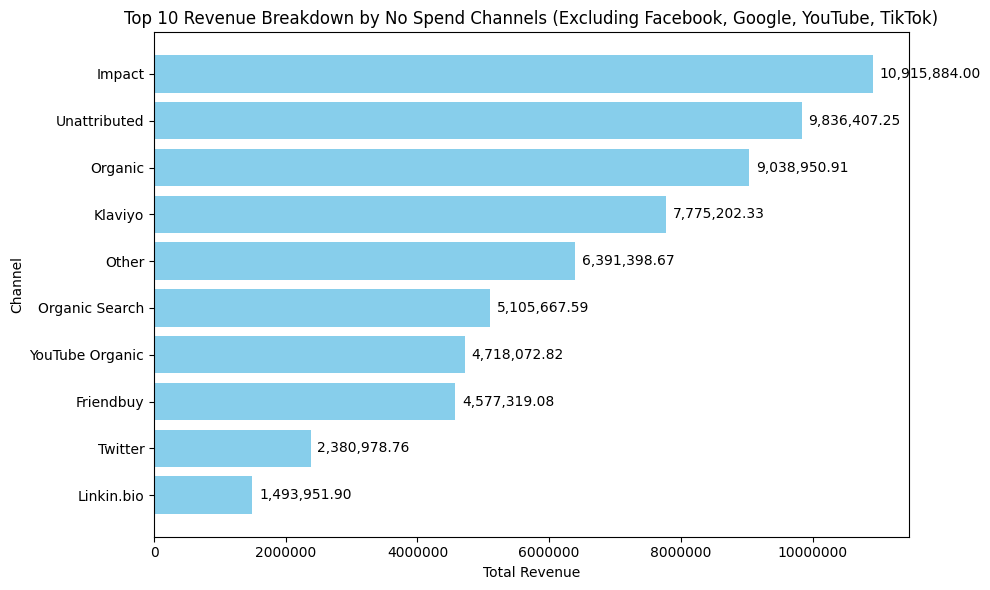

In [575]:
import matplotlib.pyplot as plt
import pandas as pd

# Data excluding Facebook Ads, Google Ads, YouTube Ads, and TikTok
data = {
    'Channel': ['Impact', 'Unattributed', 'Organic', 'Klaviyo', 'Other', 'Organic Search', 'YouTube Organic', 'Friendbuy', 'Twitter',
                 'Linkin.bio'],
    'Total Revenue': [10915884, 9836407.25, 9038950.91, 7775202.33, 6391398.67, 5105667.59, 4718072.82, 4577319.08, 2380978.76,
                      1493951.90]
}

df = pd.DataFrame(data)

# Create a bar chart for top 10 platforms
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Channel'], df['Total Revenue'], color='skyblue')

# Format the numbers on the x-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total Revenue')
plt.ylabel('Channel')
plt.title('Top 10 Revenue Breakdown by No Spend Channels (Excluding Facebook, Google, YouTube, TikTok)')

# Add value labels to the bars
for bar in bars:
    plt.text(
        bar.get_width() + 100000,  # Position text after the bar
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():,.2f}',  # Format the number with commas and two decimal places
        va='center'
    )

plt.gca().invert_yaxis()  # Invert Y-axis to have the highest value on top
plt.tight_layout()

# Show the plot
plt.show()

In [587]:
import pandas as pd

# Assuming your dataset is already loaded into a DataFrame named df
# Sort the DataFrame by 'rev' in descending order to find the top 10 highest revenue campaigns
top_10_campaigns = df.sort_values(by='rev', ascending=False).head(10)

# Display the top 10 campaigns with the highest revenue
print(top_10_campaigns[['campaign_name', 'rev']])

                            campaign_name        rev
29794            Unattributed: first_time 430,080.79
85685          Referral: peterattiamd.com 332,568.82
90899               Referral: youtube.com 207,919.77
90620               Referral: youtube.com 204,924.14
32641                         Retargeting 202,958.87
87110          Referral: peterattiamd.com 170,654.52
32621  Prospecting - Black Crow LAL - ABO 169,480.00
87412          Referral: peterattiamd.com 159,544.73
85955          Referral: peterattiamd.com 142,661.14
90336               Referral: youtube.com 136,875.57


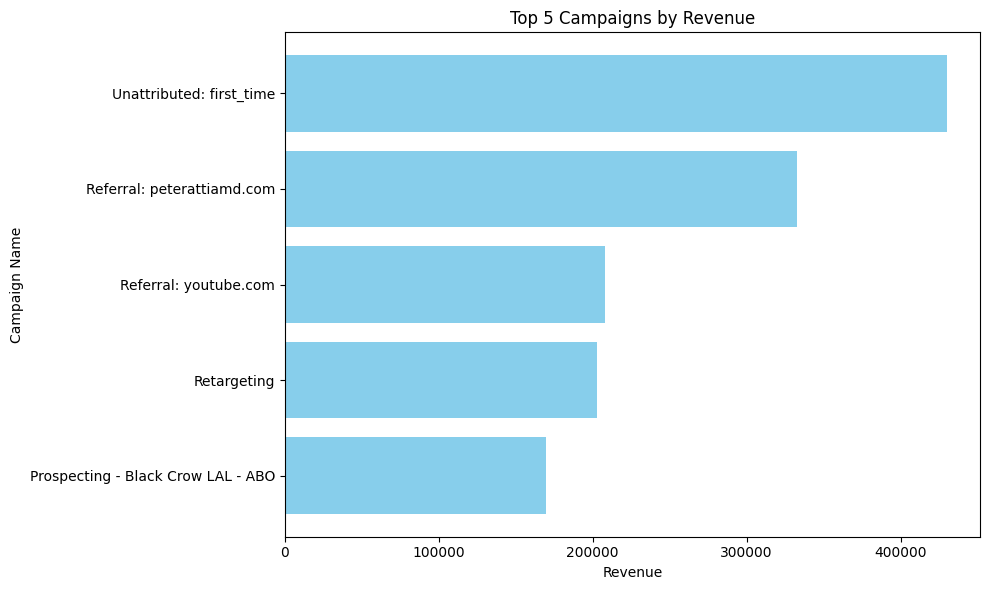

In [593]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded into a DataFrame named df
# Sort the DataFrame by 'rev' in descending order to find the top 10 highest revenue campaigns
top_10_campaigns = df.sort_values(by='rev', ascending=False).head(10)

# Plot the top 10 campaigns by revenue using a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_campaigns['campaign_name'], top_10_campaigns['rev'], color='skyblue')
plt.xlabel('Revenue')
plt.ylabel('Campaign Name')
plt.title('Top 5 Campaigns by Revenue')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.tight_layout()

# Show the plot
plt.show()

In [613]:
df['revtospend'] = df['rev'] / df['spend'].replace(0, pd.NA)
df

date breakdown_platform_northbeam  \
0      2022-09-01               ActiveCampaign   
1      2022-09-01                Discount Site   
2      2022-09-01                     Excluded   
3      2022-09-01                 Facebook Ads   
4      2022-09-01                 Facebook Ads   
...           ...                          ...   
108989 2023-08-01                  YouTube Ads   
108990 2023-08-01                  YouTube Ads   
108991 2023-08-01                  YouTube Ads   
108992 2023-08-01                  YouTube Ads   
108993 2023-08-01              YouTube Organic   

                                 campaign_name  status accounting_mode  \
0        New GIH Newsletter - 30th August 2022     NaN   Cash snapshot   
1                    Referral: retailmenot.com     NaN   Cash snapshot   
2       Excluded: Subscription Recurring Order     NaN   Cash snapshot   
3                       Blended Acquisition UK  Paused   Cash snapshot   
4        FB_A_Icons_Topdust_PS_ABO_RON_Natural     NaN   Cash snapshot   
...                                        ...     ...             ...   
108989                    YT_Retargeting_Cover  Paused   Cash snapshot   
108990                     YT_Site_Retargeting  Paused   Cash snapshot   
108991                YT|Prospecting|BlackCrow  Paused   Cash snapshot   
108992                                 youtube     NaN   Cash snapshot   
108993                   Referral: youtube.com     NaN   Cash snapshot   

       attribution_model attribution_window  spend  transactions        rev  \
0       Clicks and views           lifetime   0.00          0.00       0.00   
1       Clicks and views           lifetime   0.00          0.00       0.00   
2       Clicks and views           lifetime   0.00         18.00     377.81   
3       Clicks and views           lifetime 803.63          4.59   1,717.25   
4       Clicks and views           lifetime   0.00          0.00       0.00   
...                  ...                ...    ...           ...        ...   
108989  Clicks and views           lifetime 946.77          1.05     159.44   
108990  Clicks and views           lifetime   0.00          2.00      13.70   
108991  Clicks and views           lifetime   0.00          0.00     228.06   
108992  Clicks and views           lifetime   0.00          0.00      33.00   
108993  Clicks and views           lifetime   0.00         47.69 110,276.38   

        visits revtospend  
0            1       <NA>  
1            1       <NA>  
2            0       <NA>  
3          234       2.14  
4            0       <NA>  
...        ...        ...  
108989      21       0.17  
108990       0       <NA>  
108991       0       <NA>  
108992       0       <NA>  
108993    5992       <NA>  

[108994 rows x 12 columns]

In [619]:
top_10 = df.sort_values(by='revtospend', ascending=False).head(10)
top_10

date breakdown_platform_northbeam                  campaign_name  \
8728  2022-09-25                   Google Ads      PMax_NonBrand_PodMattress   
52364 2023-01-18                   Google Ads            Shop_Brand_BrandKWs   
1815  2022-09-06                   Google Ads               NB_Pod_Pro_Cover   
2961  2022-09-09                   Google Ads               NB_Pod_Pro_Cover   
11028 2022-10-01                   Google Ads         PMax_NonBrand_PodCover   
75791 2023-05-07                   Google Ads      Disc_Prospecting_PodCover   
28965 2022-11-17                   Google Ads                NB_Pod_Mattress   
77482 2023-05-14                   Google Ads      Disc_Prospecting_PodCover   
11385 2022-10-02                   Google Ads     Text_NonBrand_CoolingCover   
84365 2023-06-09                   Google Ads  I_Intl_Pmax_Nonbrand_PodCover   

       status accounting_mode attribution_model attribution_window  spend  \
8728   Paused   Cash snapshot  Clicks and views           lifetime 111.87   
52364  Active   Cash snapshot  Clicks and views           lifetime  92.69   
1815   Paused   Cash snapshot  Clicks and views           lifetime 123.44   
2961   Paused   Cash snapshot  Clicks and views           lifetime  41.35   
11028  Paused   Cash snapshot  Clicks and views           lifetime 264.38   
75791  Paused   Cash snapshot  Clicks and views           lifetime 137.75   
28965  Paused   Cash snapshot  Clicks and views           lifetime  28.03   
77482  Paused   Cash snapshot  Clicks and views           lifetime 257.39   
11385  Active   Cash snapshot  Clicks and views           lifetime  86.62   
84365  Paused   Cash snapshot  Clicks and views           lifetime 406.24   

       transactions       rev  visits revtospend  
8728           8.00  9,872.51     781      88.25  
52364          5.00  5,680.04     161      61.28  
1815           5.00  7,419.93      35      60.11  
2961           3.00  2,407.00      26      58.21  
11028         12.00 14,764.94     261      55.85  
75791          4.95  7,417.46      31      53.85  
28965          4.50  1,449.72       3      51.72  
77482          9.66 12,149.29      39      47.20  
11385          6.00  4,074.77      55      47.04  
84365          4.00 18,703.69     292      46.04

/var/folders/6y/bby5x37d4ls5pmph__zr1f_80000gn/T/ipykernel_41630/2215074495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revtospend', y='campaign_name', data=top_10, palette='viridis')


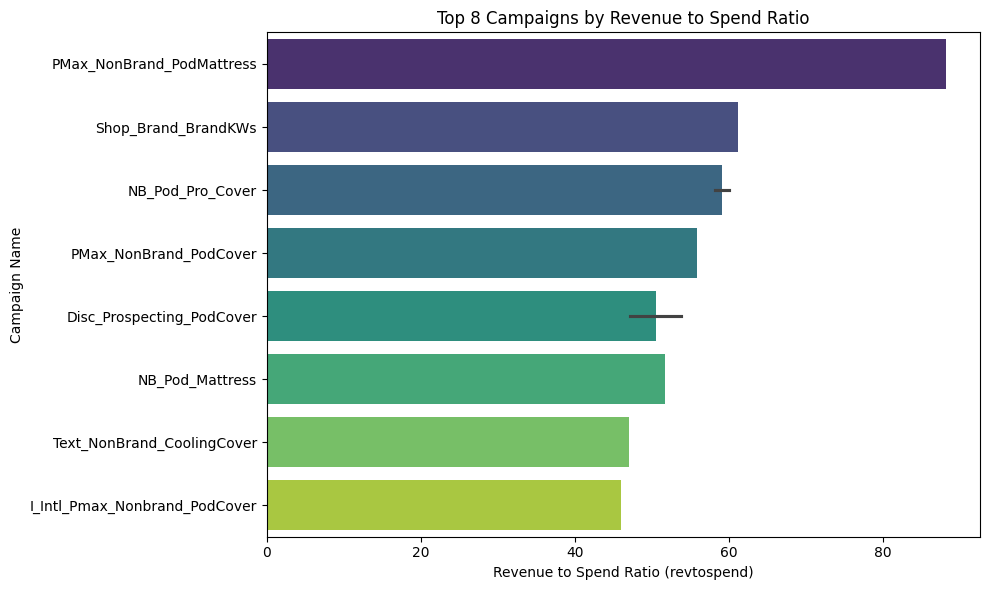

In [647]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top_10' is your DataFrame after sorting

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 10 campaigns
sns.barplot(x='revtospend', y='campaign_name', data=top_10, palette='viridis')

# Add labels and title
plt.xlabel('Revenue to Spend Ratio (revtospend)')
plt.ylabel('Campaign Name')
plt.title('Top 8 Campaigns by Revenue to Spend Ratio')

# Display the plot
plt.tight_layout()
plt.show()

In [643]:
bottom_10a = df[['date','breakdown_platform_northbeam','campaign_name', 'spend', 'rev','revtospend']]
bottom_10a

date breakdown_platform_northbeam  \
0      2022-09-01               ActiveCampaign   
1      2022-09-01                Discount Site   
2      2022-09-01                     Excluded   
3      2022-09-01                 Facebook Ads   
4      2022-09-01                 Facebook Ads   
...           ...                          ...   
108989 2023-08-01                  YouTube Ads   
108990 2023-08-01                  YouTube Ads   
108991 2023-08-01                  YouTube Ads   
108992 2023-08-01                  YouTube Ads   
108993 2023-08-01              YouTube Organic   

                                 campaign_name  spend        rev revtospend  
0        New GIH Newsletter - 30th August 2022   0.00       0.00       <NA>  
1                    Referral: retailmenot.com   0.00       0.00       <NA>  
2       Excluded: Subscription Recurring Order   0.00     377.81       <NA>  
3                       Blended Acquisition UK 803.63   1,717.25       2.14  
4        FB_A_Icons_Topdust_PS_ABO_RON_Natural   0.00       0.00       <NA>  
...                                        ...    ...        ...        ...  
108989                    YT_Retargeting_Cover 946.77     159.44       0.17  
108990                     YT_Site_Retargeting   0.00      13.70       <NA>  
108991                YT|Prospecting|BlackCrow   0.00     228.06       <NA>  
108992                                 youtube   0.00      33.00       <NA>  
108993                   Referral: youtube.com   0.00 110,276.38       <NA>  

[108994 rows x 6 columns]

In [645]:
bottom_10a = bottom_10a.sort_values(by='revtospend', ascending=True).head(10)
bottom_10a

date breakdown_platform_northbeam  \
74689 2023-05-02                   Google Ads   
68995 2023-04-07                   Google Ads   
68998 2023-04-07                   Google Ads   
69178 2023-04-08                   Google Ads   
69181 2023-04-08                   Google Ads   
69182 2023-04-08                   Google Ads   
69367 2023-04-09                   Google Ads   
69371 2023-04-09                   Google Ads   
20148 2022-10-25                   Google Ads   
20147 2022-10-25                   Google Ads   

                         campaign_name  spend  rev revtospend  
74689  I_CA_Text_NonBrand_CoolingCover 771.26 0.00       0.00  
68995            Text_Blog_SweatySleep 703.11 0.00       0.00  
68998        UK_Pmax_Nonbrand_PodCover 866.68 0.00       0.00  
69178   AUS_Text_NonBrand_CoolingCover 542.46 0.00       0.00  
69181  I_CA_Text_NonBrand_CoolingCover 937.81 0.00       0.00  
69182  I_UK_Text_NonBrand_CoolingCover 694.79 0.00       0.00  
69367   AUS_Text_NonBrand_CoolingCover 758.25 0.00       0.00  
69371  I_CA_Text_NonBrand_CoolingCover 580.41 0.00       0.00  
20148                 NB_Pod_Pro_Cover 642.05 0.00       0.00  
20147                  NB_Pod_Mattress 451.44 0.00       0.00

In [158]:
# Calculate total 'rev' and total 'spend'
total_rev = round(df['rev'].sum(),2)
total_spend = round(df['spend'].sum(),2)

# Calculate the ratio of total 'rev' to total 'spend'
rev_to_spend_ratio = round(total_rev / total_spend if total_spend > 0 else float('inf'),2)

# Print the results
print(f"Total Revenue: {total_rev}")
print(f"Total Spend: {total_spend}")
print(f"Revenue to Spend Ratio: {rev_to_spend_ratio}")

Total Revenue: 98465466.05
Total Spend: 10168617.38
Revenue to Spend Ratio: 9.68


In [190]:
#converted data grouped by date
gdf = pd.read_csv('grouped_data_by_date.csv', parse_dates= ['date'])
gdf['date'] = pd.to_datetime(gdf['date'], errors='coerce', infer_datetime_format=True)

gdf

/var/folders/6y/bby5x37d4ls5pmph__zr1f_80000gn/T/ipykernel_41630/3661322130.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdf = pd.read_csv('grouped_data_by_date.csv', parse_dates= ['date'])
/var/folders/6y/bby5x37d4ls5pmph__zr1f_80000gn/T/ipykernel_41630/3661322130.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  gdf['date'] = pd.to_datetime(gdf['date'], errors='coerce', infer_datetime_format=True)


date          rev        spend  facebook_spend  youtube_spend  \
0   2022-09-01  250702.2000  26439.28712     13485.42676    4347.280036   
1   2022-09-02  300796.6100  25208.26591     13966.61971    4002.154685   
2   2022-09-03  237224.9800  26733.27727     14278.98000    4264.930000   
3   2022-09-04  414814.8600  29216.04671     14944.96000    5446.613788   
4   2022-09-05  709552.0700  31699.55443     18371.50000    4459.671966   
..         ...          ...          ...             ...            ...   
360 2023-08-27  405175.6296  32072.77534     16272.31999    2173.203209   
361 2023-08-28  384238.7300  29416.05598     16039.36003    1534.007380   
362 2023-08-29  347160.9000  30247.73387     15868.63998    2995.074668   
363 2023-08-30  367397.7900  31854.49732     17323.78000    2202.669792   
364 2023-08-31  354657.5200  34802.41952     16746.97000    2794.928580   

     tiktok_spend  google_spend  subs_launch  pod3_summer_refresh  pod3_launch  
0             0.0   8606.580327            0                    0            0  
1             0.0   7239.491515            0                    0            0  
2             0.0   8189.367265            0                    0            0  
3             0.0   8824.472918            0                    0            0  
4             0.0   8868.382468            0                    0            0  
..            ...           ...          ...                  ...          ...  
360           0.0  13627.252140            0                    0            0  
361           0.0  11842.688580            0                    0            0  
362           0.0  11384.019220            0                    0            0  
363           0.0  12328.047520            0                    0            0  
364           0.0  15260.520940            0                    0            0  

[365 rows x 10 columns]

In [524]:
import pandas as pd

# Filter data for September to December 2022
pd.options.display.float_format = '{:,.2f}'.format

mask = (gdf['date'] >= '2022-09-01') & (gdf['date'] <= '2022-12-31')
df_filtered = gdf.loc[mask]

# Calculate the total spend for Facebook, YouTube, TikTok, and Google
total_facebook_spend = df_filtered['facebook_spend'].sum()
total_youtube_spend = df_filtered['youtube_spend'].sum()
total_tiktok_spend = df_filtered['tiktok_spend'].sum()
total_google_spend = df_filtered['google_spend'].sum()

# Create a DataFrame to display the results
spend_summary = pd.DataFrame({
    'Platform': ['Facebook', 'YouTube', 'TikTok', 'Google'],
    'Total Spend (Sep-Dec 2022)': [
        total_facebook_spend,
        total_youtube_spend,
        total_tiktok_spend,
        total_google_spend
    ]
})

# Display the spend summary
print(spend_summary)

   Platform  Total Spend (Sep-Dec 2022)
0  Facebook                1,672,014.64
1   YouTube                  562,402.60
2    TikTok                   89,190.37
3    Google                1,249,944.92


In [526]:
import pandas as pd

# Total budget
total_budget = 4645618

# Given spend values for each platform (from Sep-Dec 2022)
platform_spends = {
    'Facebook': 1.672015e+06,
    'YouTube': 5.624026e+05,
    'TikTok': 8.919037e+04,
    'Google': 1.249945e+06
}

# Convert the dictionary into a DataFrame for easier manipulation
spend_df = pd.DataFrame(list(platform_spends.items()), columns=['Platform', 'Current Spend'])

# Calculate the total current spend across all platforms
total_current_spend = spend_df['Current Spend'].sum()

# Calculate the proportion of each platform's spend
spend_df['Proportion'] = spend_df['Current Spend'] / total_current_spend

# Allocate the total budget proportionally based on the spend proportion
spend_df['Allocated Spend'] = spend_df['Proportion'] * total_budget

# Display the final DataFrame with allocated spend
print(spend_df[['Platform', 'Current Spend', 'Allocated Spend']])

   Platform  Current Spend  Allocated Spend
0  Facebook   1,672,015.00     2,173,619.10
1   YouTube     562,402.60       731,123.24
2    TikTok      89,190.37       115,947.46
3    Google   1,249,945.00     1,624,928.20


In [192]:
# Filter the dataframe for the period from September to December 2022
df_sept_dec_2022 = gdf[(gdf['date'] >= '2022-09-01') & (gdf['date'] <= '2022-12-31')]

# Calculate the total spend for this period
total_spend_sept_dec_2022 = df_sept_dec_2022['spend'].sum()

# Print the result
print(f"Total spend from September to December 2022: {total_spend_sept_dec_2022}")

Total spend from September to December 2022: 3573552.523262


In [194]:
total_spend_sept_dec2023 = total_spend_sept_dec_2022 * 1.3
total_spend_sept_dec2023

4645618.2802406

In [196]:
budget_22 = round(df['spend'].sum(),2)
budget_22

10168617.38

In [198]:
budget_23 = round(10168617.38 * 1.3, 2)
budget_23

13219202.59

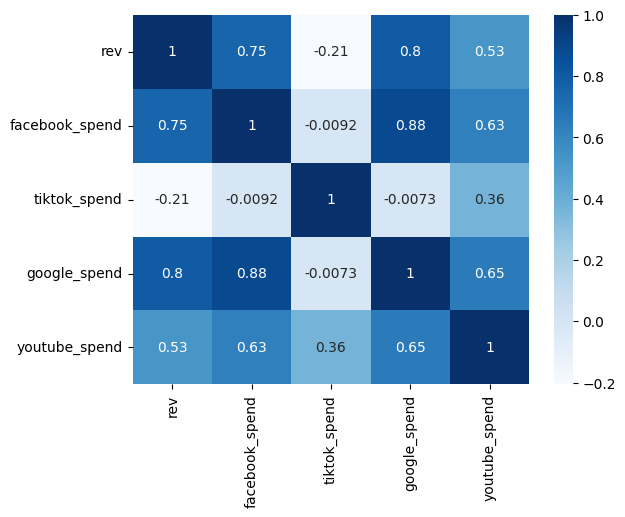

In [200]:
corr_matrix = gdf[['rev', 'facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

In [208]:
gdf = gdf.assign(
    year = lambda x: x["date"].dt.year,
    month = lambda x: x["date"].dt.month,
    dayofyear = lambda x: x["date"].dt.dayofyear,
).assign(trend = lambda x: gdf.index)

# Set the frequency to daily
#gdf = gdf.asfreq('D')

In [211]:
gdf

date          rev        spend  facebook_spend  youtube_spend  \
0   2022-09-01  250702.2000  26439.28712     13485.42676    4347.280036   
1   2022-09-02  300796.6100  25208.26591     13966.61971    4002.154685   
2   2022-09-03  237224.9800  26733.27727     14278.98000    4264.930000   
3   2022-09-04  414814.8600  29216.04671     14944.96000    5446.613788   
4   2022-09-05  709552.0700  31699.55443     18371.50000    4459.671966   
..         ...          ...          ...             ...            ...   
360 2023-08-27  405175.6296  32072.77534     16272.31999    2173.203209   
361 2023-08-28  384238.7300  29416.05598     16039.36003    1534.007380   
362 2023-08-29  347160.9000  30247.73387     15868.63998    2995.074668   
363 2023-08-30  367397.7900  31854.49732     17323.78000    2202.669792   
364 2023-08-31  354657.5200  34802.41952     16746.97000    2794.928580   

     tiktok_spend  google_spend  subs_launch  pod3_summer_refresh  \
0             0.0   8606.580327            0                    0   
1             0.0   7239.491515            0                    0   
2             0.0   8189.367265            0                    0   
3             0.0   8824.472918            0                    0   
4             0.0   8868.382468            0                    0   
..            ...           ...          ...                  ...   
360           0.0  13627.252140            0                    0   
361           0.0  11842.688580            0                    0   
362           0.0  11384.019220            0                    0   
363           0.0  12328.047520            0                    0   
364           0.0  15260.520940            0                    0   

     pod3_launch  year  month  dayofyear  trend  
0              0  2022      9        244      0  
1              0  2022      9        245      1  
2              0  2022      9        246      2  
3              0  2022      9        247      3  
4              0  2022      9        248      4  
..           ...   ...    ...        ...    ...  
360            0  2023      8        239    360  
361            0  2023      8        240    361  
362            0  2023      8        241    362  
363            0  2023      8        242    363  
364            0  2023      8        243    364  

[365 rows x 14 columns]

# Revenue Forecasting with Prophet

In [461]:
#!pip install prophet

In [466]:
gdf2 = gdf[['date','rev']]
gdf2

date          rev
0   2022-09-01  250702.2000
1   2022-09-02  300796.6100
2   2022-09-03  237224.9800
3   2022-09-04  414814.8600
4   2022-09-05  709552.0700
..         ...          ...
360 2023-08-27  405175.6296
361 2023-08-28  384238.7300
362 2023-08-29  347160.9000
363 2023-08-30  367397.7900
364 2023-08-31  354657.5200

[365 rows x 2 columns]

In [468]:
# Rename columns
gdf2 = gdf2.rename(columns={'date': 'ds', 'rev': 'y'})

# Check the result
gdf2

ds            y
0   2022-09-01  250702.2000
1   2022-09-02  300796.6100
2   2022-09-03  237224.9800
3   2022-09-04  414814.8600
4   2022-09-05  709552.0700
..         ...          ...
360 2023-08-27  405175.6296
361 2023-08-28  384238.7300
362 2023-08-29  347160.9000
363 2023-08-30  367397.7900
364 2023-08-31  354657.5200

[365 rows x 2 columns]

In [480]:
from prophet import Prophet


m = Prophet()
m.fit(gdf2)

14:31:18 - cmdstanpy - INFO - Chain [1] start processing
14:31:18 - cmdstanpy - INFO - Chain [1] done processing


In [488]:
future = m.make_future_dataframe(periods=121)
future.tail()

ds
481 2023-12-26
482 2023-12-27
483 2023-12-28
484 2023-12-29
485 2023-12-30

In [496]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_results.csv', index=False)



In [508]:
# Assuming `forecast` is your DataFrame containing the yhat values
# Ensure 'ds' column is in datetime format
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Filter for the relevant months and year (September, October, November, December 2023)
filtered_forecast = forecast[(forecast['ds'].dt.month.isin([9, 10, 11, 12])) & (forecast['ds'].dt.year == 2023)]

# Group by month and sum the 'yhat' values for each month
monthly_yhat_sum = filtered_forecast.groupby(filtered_forecast['ds'].dt.month)['yhat'].sum()
# Assuming `monthly_yhat_sum` is the result from the previous step
# Convert the scientific notation to a regular number with two decimal places

monthly_yhat_sum = monthly_yhat_sum.apply(lambda x: "{:,.2f}".format(x))

# Print the result
print("Yhat sum for each month in 2023:")
print(monthly_yhat_sum)

Yhat sum for each month in 2023:
ds
9     15,010,230.60
10    17,146,422.16
11    17,964,516.73
12    19,463,014.44
Name: yhat, dtype: object


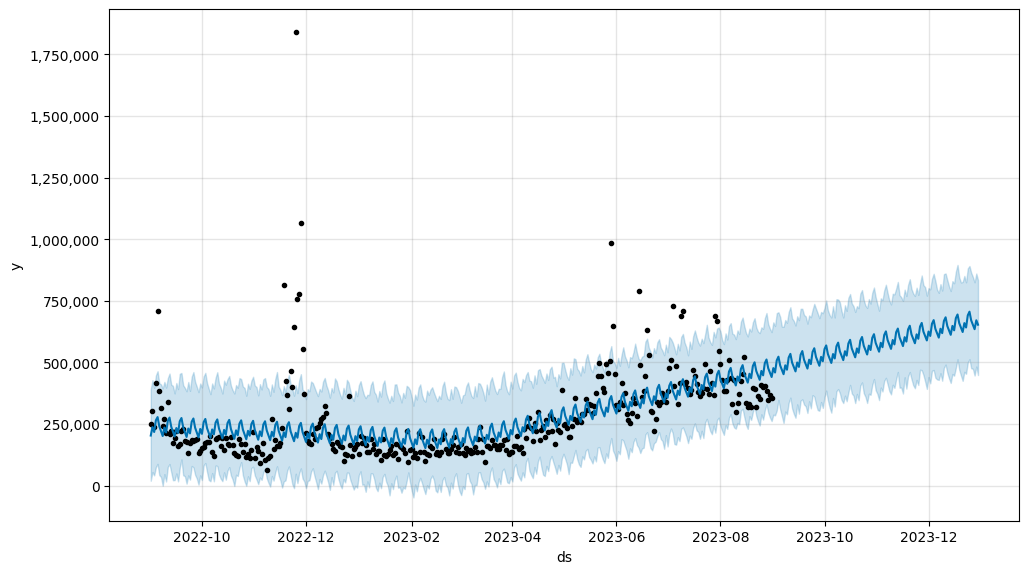

In [559]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Plot the forecast using Prophet's built-in plot function
fig1 = m.plot(forecast)

# Customize the y-axis to show real numbers instead of scientific notation
ax = fig1.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the updated plot
plt.show()

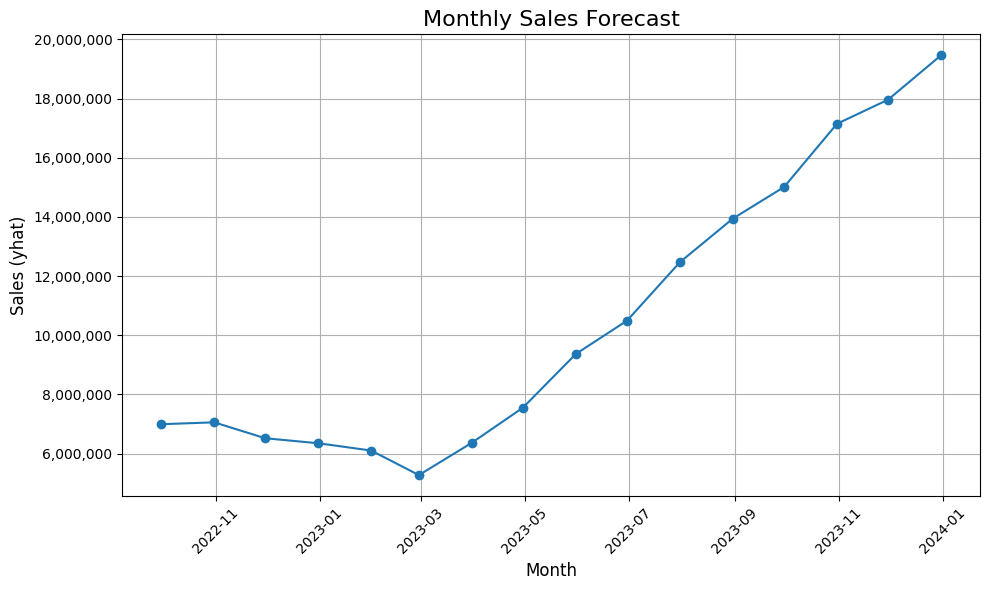

In [561]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'ds' column to datetime if it's not already
forecast.to_csv('forecast_output.csv', index=False)

# Resample the data to monthly frequency and calculate the sum of 'yhat' for each month
monthly_forecast = forecast.resample('M', on='ds').sum()

# Plot the monthly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_forecast.index, monthly_forecast['yhat'], marker='o', linestyle='-')

# Customize the plot
plt.title('Monthly Sales Forecast', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales (yhat)', fontsize=12)
plt.grid(True)

# Customize the y-axis to show real numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

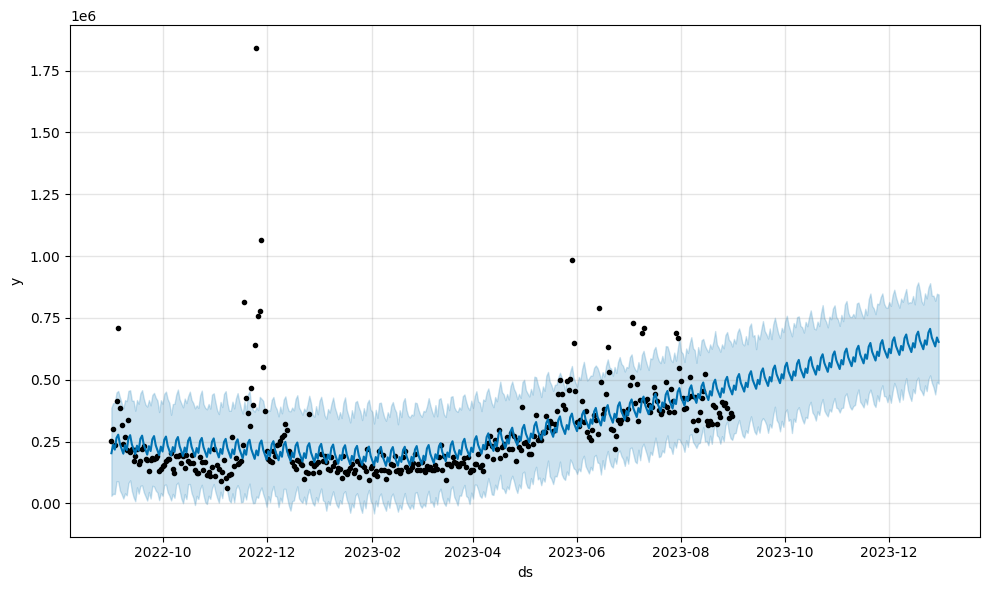

In [492]:
fig1 = m.plot(forecast)
#prophet forecasts sales to keep growing.

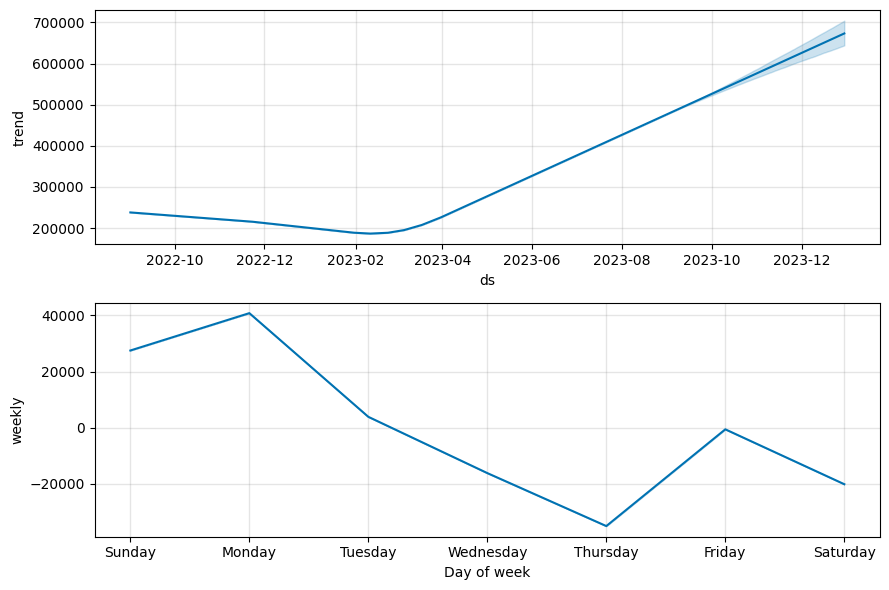

In [494]:
fig2 = m.plot_components(forecast)
#we can observe there is peak revenue on Monday. It could very well be a reporting thing or actual values.

In [651]:
forecast.to_csv('prophet_forecast.csv', index=False)


# PyMC-Marketing

## Daily Model

In [215]:
#!pip show pymc-marketing
#from pymc_marketing.mmm.delayed_saturated_mmm import DelayedSaturatedMMM
#from pymc_marketing.mmm.budget_optimizer import calculate_expected_contribution


In [217]:
#calculating the prior or Sigma to feed into the model
total_spend_per_channel = gdf[['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']].sum(axis=0)
total_spend_per_channel

facebook_spend    4.942361e+06
tiktok_spend      8.919037e+04
google_spend      3.817452e+06
youtube_spend     1.319614e+06
dtype: float64

In [219]:
spend_proportion = total_spend_per_channel / total_spend_per_channel.sum()
spend_proportion

facebook_spend    0.486041
tiktok_spend      0.008771
google_spend      0.375415
youtube_spend     0.129773
dtype: float64

In [221]:
HALFNORMAL_SCALE = 1/ np.sqrt(1- 2 / np.pi)

In [223]:
n_channels = 4

In [225]:
prior_sigma= HALFNORMAL_SCALE * n_channels * spend_proportion

In [227]:
prior_sigma.tolist()

[3.2251649838917307,
 0.058201664407954115,
 2.491099129892152,
 0.8611211816893876]

In [231]:
X = gdf[['date','facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend','trend','year', 'month']]

In [233]:
y = gdf['rev']

In [241]:
#notice how I bake in the sigma prior we calculated into the model_config

my_model_config = {'intercept': {'dist': 'Normal', 'kwargs': {'mu': 0, 'sigma': 2}},
 'beta_channel': {'dist': 'HalfNormal', 'kwargs': {'sigma': prior_sigma.to_numpy()}},
 'alpha': {'dist': 'Beta', 'kwargs': {'alpha': 1, 'beta': 3}},
 'lam': {'dist': 'Gamma', 'kwargs': {'alpha': 3, 'beta': 1}},
 'likelihood': {'dist': 'Normal',
  'kwargs': {'sigma': {'dist': 'HalfNormal', 'kwargs': {'sigma': 2}}}},
 'gamma_control': {'dist': 'Normal', 'kwargs': {'mu': 0, 'sigma': 2}},
 'gamma_fourier': {'dist': 'Laplace', 'kwargs': {'mu': 0, 'b': 1}}}

In [243]:
my_sampler_config = {"progressbar": True}

In [567]:
mmm = MMM(
    model_config = my_model_config,
    #sample_config = my_sampler_config,
    date_column='date',
    adstock=GeometricAdstock(l_max=4),
    saturation=LogisticSaturation(),
    channel_columns=['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend'],
    control_columns=['trend', 'year','month'],
    yearly_seasonality=2,
)

In [569]:
mmm.fit(X=gdf[['date', 'facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend','trend','year', 'month']], y=gdf['rev'], target_accept=0.95, chains=4, random_seed=42)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, adstock_alpha, saturation_lam, saturation_beta, gamma_control, gamma_fourier, y_sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 274 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

In [249]:
mmm.model_config

{'intercept': Prior("Normal", mu=0, sigma=2),
 'likelihood': Prior("Normal", sigma=Prior("HalfNormal", sigma=2), dims="date"),
 'gamma_control': Prior("Normal", mu=0, sigma=2, dims="control"),
 'gamma_fourier': Prior("Laplace", mu=0, b=1),
 'adstock_alpha': Prior("Beta", alpha=1, beta=3, dims="channel"),
 'saturation_lam': Prior("Gamma", alpha=3, beta=1, dims="channel"),
 'saturation_beta': Prior("HalfNormal", sigma=2, dims="channel"),
 'beta_channel': Prior("HalfNormal", sigma=[3.22516498 0.05820166 2.49109913 0.86112118]),
 'alpha': Prior("Beta", alpha=1, beta=3),
 'lam': Prior("Gamma", alpha=3, beta=1)}

In [251]:
mmm.default_model_config

{'intercept': Prior("Normal", mu=0, sigma=2),
 'likelihood': Prior("Normal", sigma=Prior("HalfNormal", sigma=2)),
 'gamma_control': Prior("Normal", mu=0, sigma=2, dims="control"),
 'gamma_fourier': Prior("Laplace", mu=0, b=1, dims="fourier_mode"),
 'adstock_alpha': Prior("Beta", alpha=1, beta=3, dims="channel"),
 'saturation_lam': Prior("Gamma", alpha=3, beta=1, dims="channel"),
 'saturation_beta': Prior("HalfNormal", sigma=2, dims="channel")}

In [253]:
mmm.save("mmm_daily_model2.pkl")

In [254]:
mmm.idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

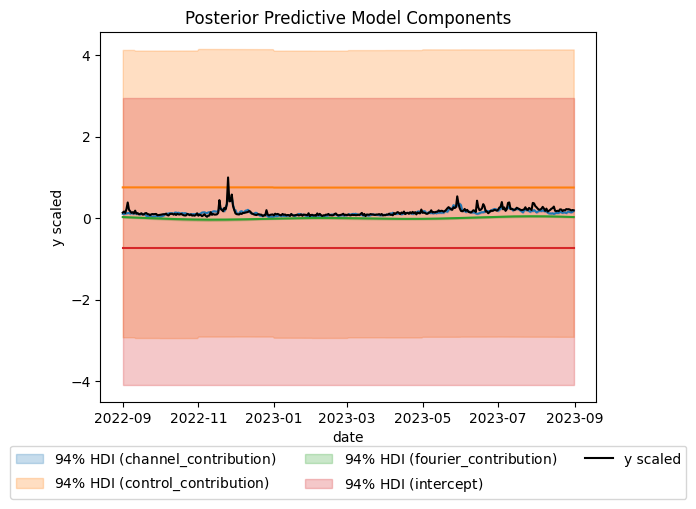

In [255]:
fig = mmm.plot_components_contributions()

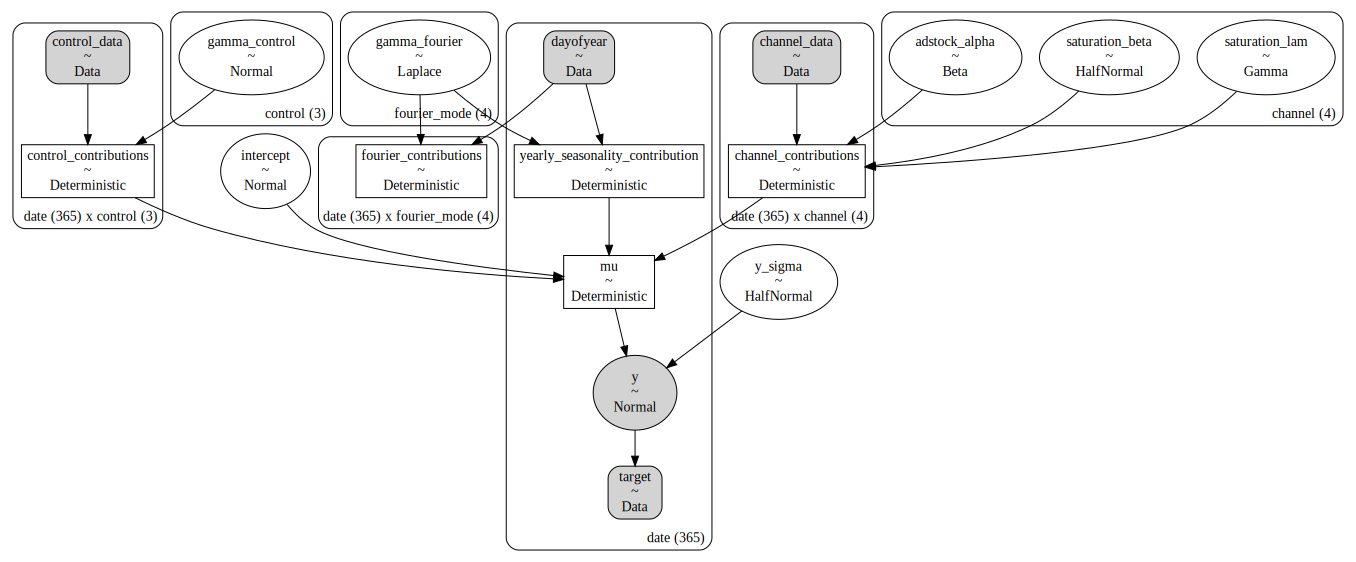

In [259]:
fig = mmm.graphviz()
fig.render(filename='mmm_graphviz', format='png')  # You can change 'png' to 'pdf' or other formats
fig

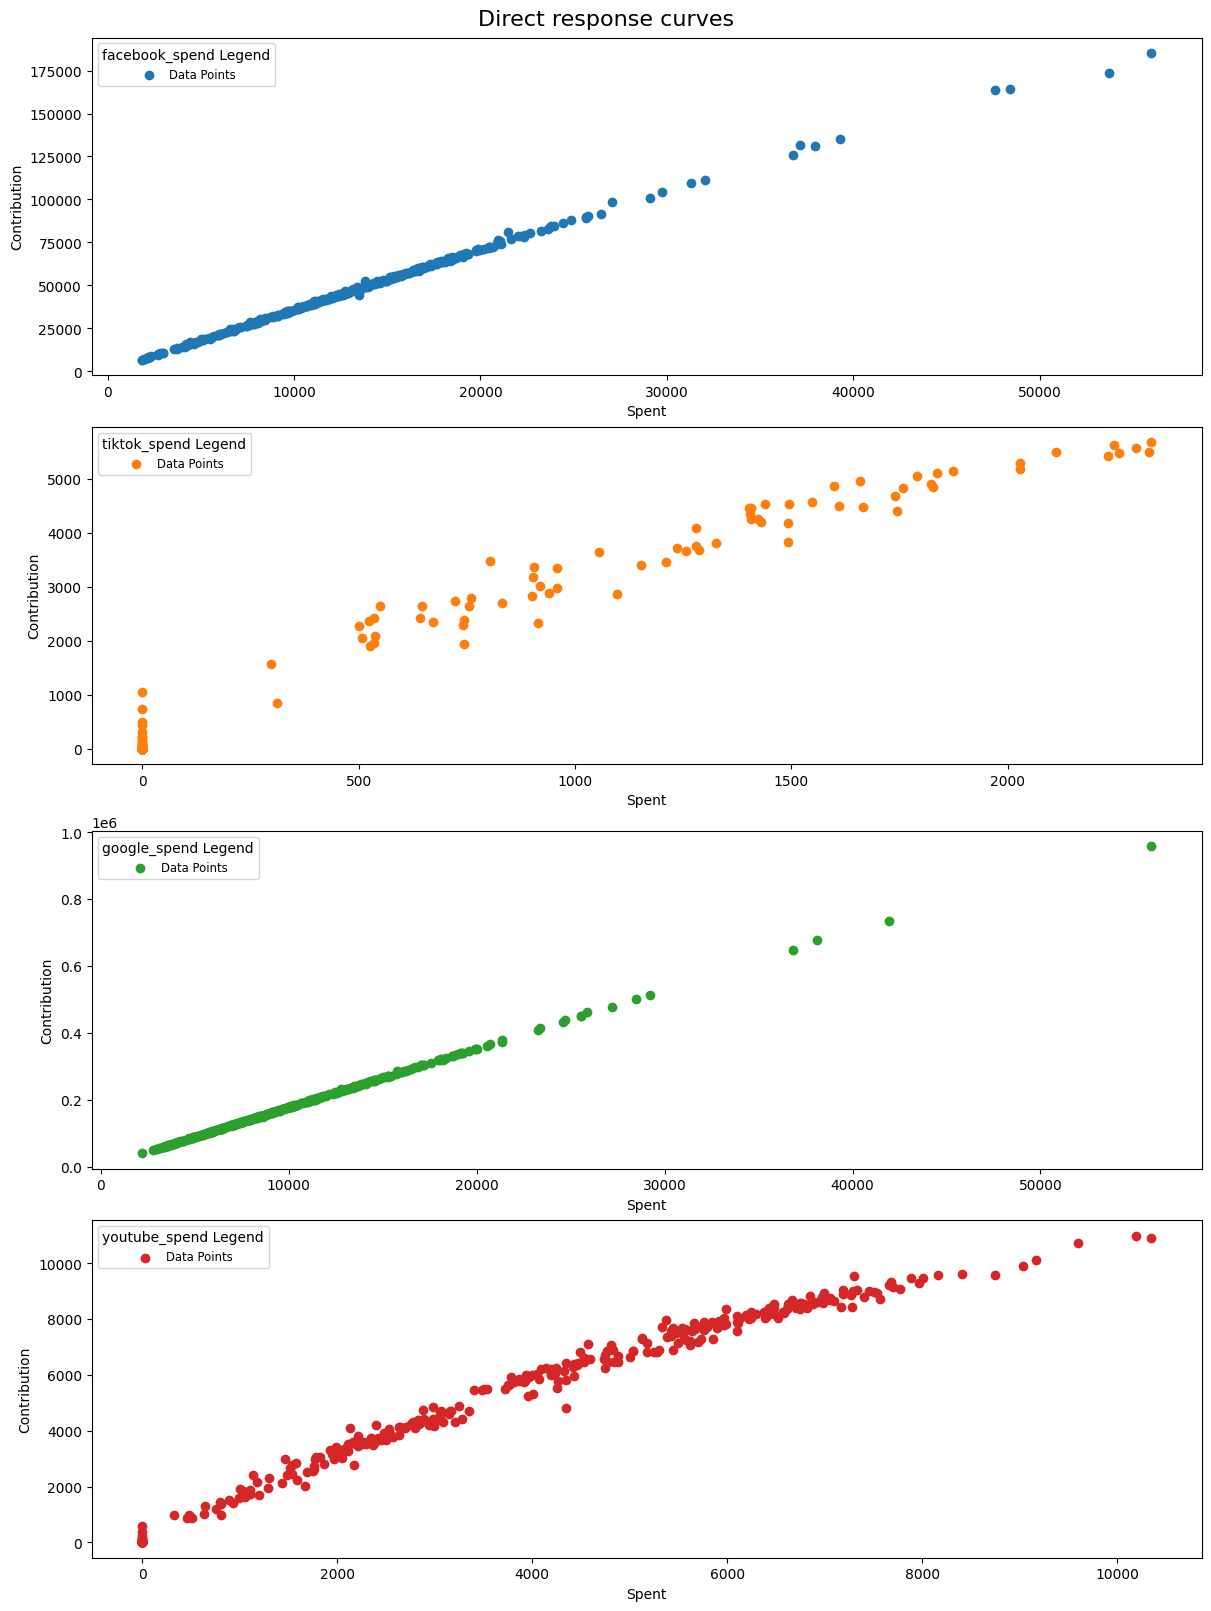

In [261]:
fig = mmm.plot_direct_contribution_curves()

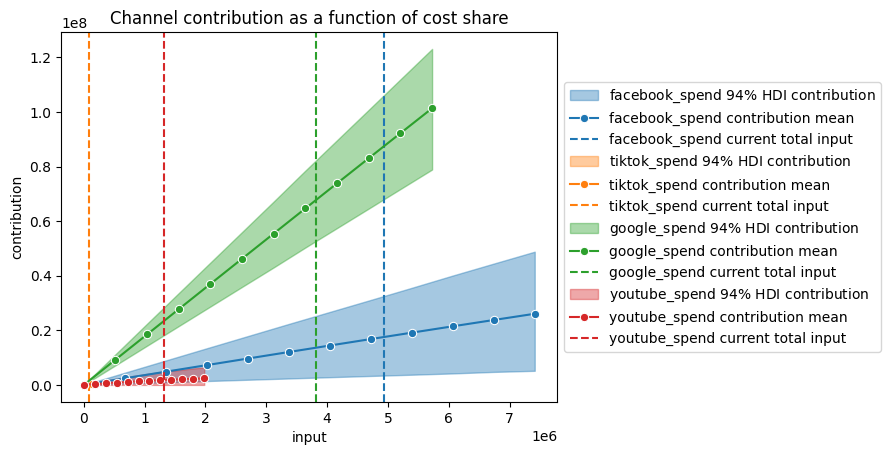

In [263]:
fig = mmm.plot_channel_contributions_grid(start=0, stop=1.5, num=12, absolute_xrange=True)

In [264]:
get_mean_contributions_over_time_df = mmm.compute_mean_contributions_over_time(original_scale= True)

In [265]:
channel_contribution_original_scale = mmm.compute_channel_contribution_original_scale()

In [266]:
roas_samples = (
    channel_contribution_original_scale.stack(sample=("chain", "draw")).sum("date") / X[['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']].sum().to_numpy()[..., None])

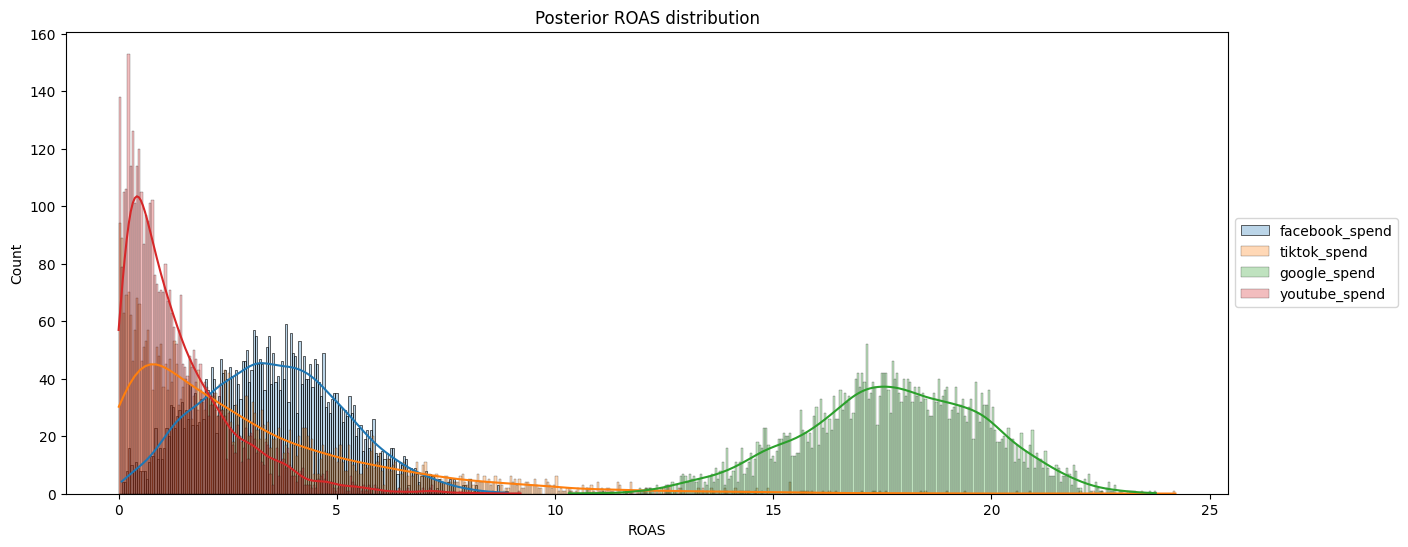

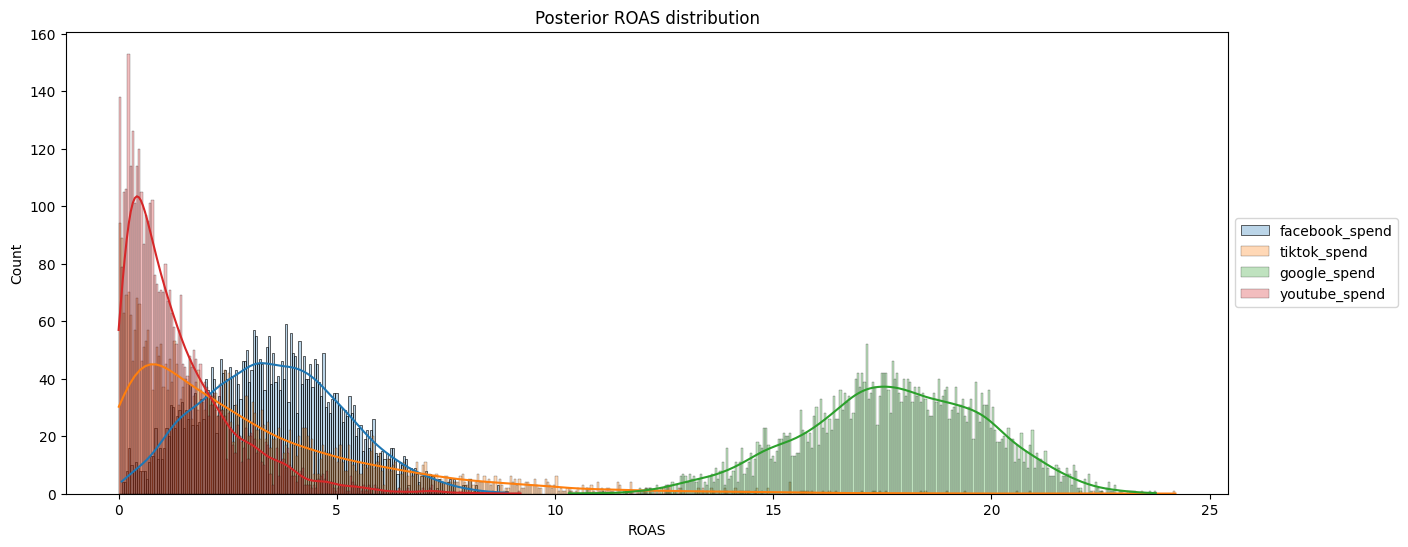

In [267]:
fig, ax= plt.subplots(figsize=(15,6)) 
for channel in ['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']:
    sns.histplot(roas_samples.sel(channel=channel).to_numpy(), binwidth=0.05, alpha= 0.3, kde=True, ax=ax, legend=True, label=channel)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Posterior ROAS distribution', xlabel='ROAS')
fig

In [273]:
roas_df = roas_samples.to_dataframe(name="roas")

In [275]:
roas_df.groupby("channel").mean()

chain   draw       roas
channel                                
facebook_spend    1.5  499.5   3.556657
google_spend      1.5  499.5  17.743998
tiktok_spend      1.5  499.5   3.004487
youtube_spend     1.5  499.5   1.351991

In [277]:
#another way to look at it = it gives us error bars, instead of just 1 data point = we can give probabilistic answers
# mean is useful but what is the prob that this channel is better than breakeven? how much risk are you willing to take?
#should we take this channel on or off? 

roas_df.groupby("channel")['roas'].describe(percentiles=[0.025, 0.975])

count       mean       std        min       2.5%        50%  \
channel                                                                        
facebook_spend  4000.0   3.556657  1.622441   0.072765   0.697627   3.498522   
google_spend    4000.0  17.743998  2.082701  10.315904  13.484459  17.783358   
tiktok_spend    4000.0   3.004487  3.030163   0.006498   0.060873   2.103601   
youtube_spend   4000.0   1.351991  1.258511   0.001669   0.038589   0.974795   

                    97.5%        max  
channel                               
facebook_spend   6.901654   8.915051  
google_spend    21.541903  23.763280  
tiktok_spend    11.105197  24.214393  
youtube_spend    4.704678   9.208689

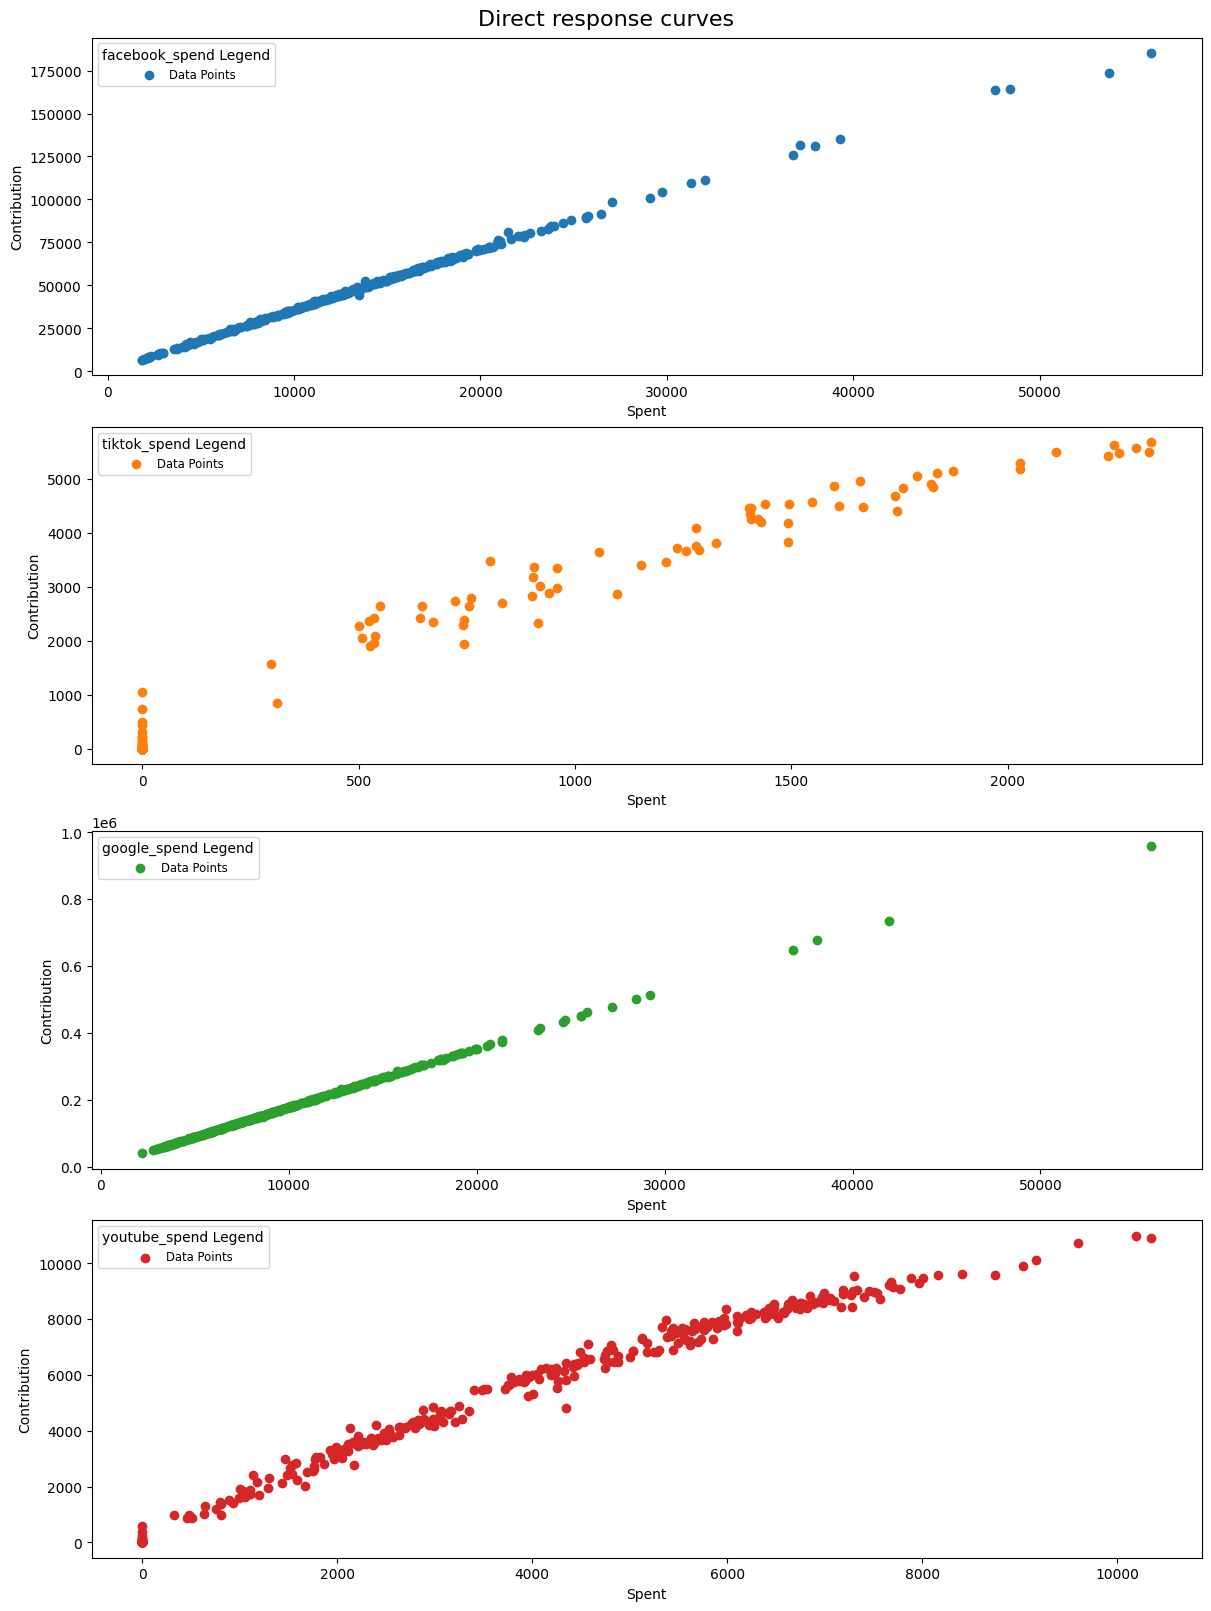

In [279]:
response_curve_fig= mmm.plot_direct_contribution_curves()

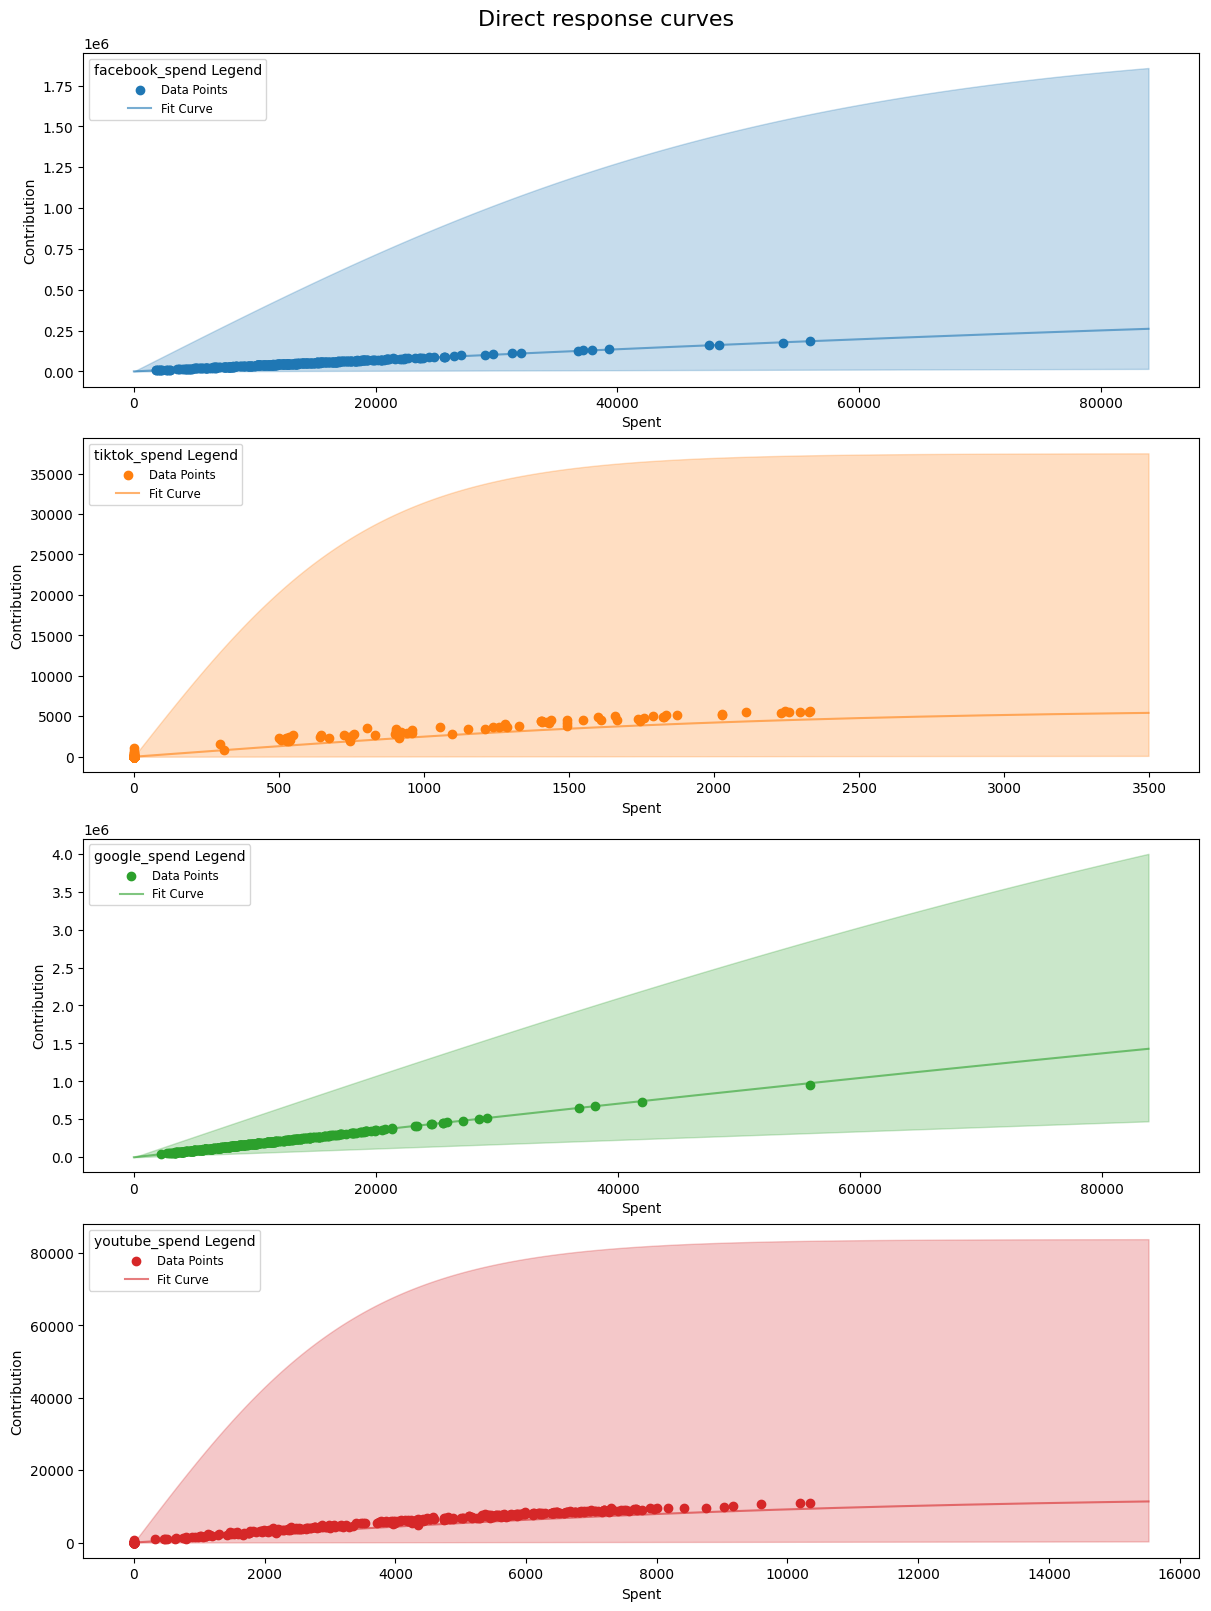

In [281]:
mmm.plot_direct_contribution_curves(show_fit=True, xlim_max=1.5);

In [528]:
#sigmoid shown
#sigmoid_response_curve_fig = mmm.plot_direct_contribution_curves(show_fit=True)

## Budget Allocation - Daily Model

In [296]:
az.summary(
    data=mmm.fit_result,
    var_names=[
        "saturation_beta",
        "saturation_lam",
        "adstock_alpha",
    ],
)

mean     sd  hdi_3%  hdi_97%  mcse_mean  \
saturation_beta[facebook_spend]  0.375  0.403   0.007    1.000      0.030   
saturation_beta[tiktok_spend]    0.006  0.014   0.000    0.018      0.001   
saturation_beta[google_spend]    2.297  0.819   0.993    3.836      0.078   
saturation_beta[youtube_spend]   0.014  0.024   0.000    0.042      0.001   
saturation_lam[facebook_spend]   0.943  0.591   0.094    1.985      0.042   
saturation_lam[tiktok_spend]     2.458  1.670   0.185    5.599      0.085   
saturation_lam[google_spend]     0.525  0.175   0.221    0.857      0.016   
saturation_lam[youtube_spend]    2.335  1.830   0.049    5.614      0.107   
adstock_alpha[facebook_spend]    0.095  0.104   0.000    0.291      0.007   
adstock_alpha[tiktok_spend]      0.254  0.201   0.000    0.630      0.014   
adstock_alpha[google_spend]      0.026  0.025   0.000    0.072      0.001   
adstock_alpha[youtube_spend]     0.245  0.202   0.001    0.628      0.009   

                                 mcse_sd  ess_bulk  ess_tail  r_hat  
saturation_beta[facebook_spend]    0.021     116.0     274.0   1.04  
saturation_beta[tiktok_spend]      0.001     152.0     185.0   1.03  
saturation_beta[google_spend]      0.055     106.0     145.0   1.01  
saturation_beta[youtube_spend]     0.001     213.0     322.0   1.02  
saturation_lam[facebook_spend]     0.030     176.0     279.0   1.03  
saturation_lam[tiktok_spend]       0.060     262.0     300.0   1.02  
saturation_lam[google_spend]       0.012     116.0     127.0   1.02  
saturation_lam[youtube_spend]      0.076     220.0     288.0   1.01  
adstock_alpha[facebook_spend]      0.005     179.0     197.0   1.02  
adstock_alpha[tiktok_spend]        0.010     129.0     121.0   1.05  
adstock_alpha[google_spend]        0.001     291.0     215.0   1.02  
adstock_alpha[youtube_spend]       0.007     391.0     487.0   1.01

In [553]:
total_budget = 5 # Imagine is 5K or 5M
# Define your channels
channels = ['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']
# The initial split per channel
budget_per_channel = total_budget / len(channels)
# Initial budget per channel as dictionary.
initial_budget_dict = {channel: budget_per_channel for channel in channels}
# bounds for each channel
min_budget, max_budget = 0 , 5 #4_645_618
budget_bounds = {channel: [min_budget, max_budget] for channel in channels}

In [555]:
response = mmm.allocate_budget_to_maximize_response(
    budget=total_budget,
    num_periods=121,
    time_granularity="daily",
    budget_bounds=budget_bounds,
)

/opt/anaconda3/lib/python3.11/site-packages/pymc_marketing/mmm/mmm.py:2205: UserWarning: Using default equality constraint: The sum of all budgets should be equal to the total budget.
  self.optimal_allocation_dict, _ = allocator.allocate_budget(


In [557]:
print(mmm.optimal_allocation_dict)

{'facebook_spend': 0.0, 'tiktok_spend': 0.0, 'google_spend': 4.999999999999999, 'youtube_spend': 1.906461100098511e-15}


In [543]:
mmm.optimal_allocation_dict

{'facebook_spend': 1161404.5,
 'tiktok_spend': 1161404.5,
 'google_spend': 1161404.5,
 'youtube_spend': 1161404.5}

In [411]:
response

<xarray.Dataset> Size: 19MB
Dimensions:                (date: 121, sample: 4000, channel: 4)
Coordinates:
  * date                   (date) datetime64[ns] 968B 2023-09-01 ... 2023-12-30
  * channel                (channel) <U14 224B 'facebook_spend' ... 'youtube_...
  * sample                 (sample) object 32kB MultiIndex
  * chain                  (sample) int64 32kB 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3
  * draw                   (sample) int64 32kB 0 1 2 3 4 ... 995 996 997 998 999
Data variables:
    y                      (date, sample) float64 4MB 0.2964 1.621 ... -2.409
    channel_contributions  (date, channel, sample) float64 15MB 0.003945 ... 0.0
Attributes:
    created_at:                 2024-10-23T14:56:45.668925+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.15.1

In [312]:
total_budget2 = 4_645_618 # Imagine is 5K or 5M
# Define your channels
channels2 = ['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']
# The initial split per channel
budget_per_channel2 = total_budget2 / len(channels2)
# Initial budget per channel as dictionary.
initial_budget_dict = {channel: budget_per_channel for channel in channels2}
# bounds for each channel
min_budget2, max_budget2 = 0, 4_645_618
budget_bounds2 = {channel: [min_budget2, max_budget2] for channel in channels2}

In [314]:
response2 = mmm.allocate_budget_to_maximize_response(
    budget=total_budget2,
    num_periods=121,
    time_granularity="daily",
    budget_bounds=budget_bounds2,
)

/opt/anaconda3/lib/python3.11/site-packages/pymc_marketing/mmm/mmm.py:2205: UserWarning: Using default equality constraint: The sum of all budgets should be equal to the total budget.
  self.optimal_allocation_dict, _ = allocator.allocate_budget(


In [316]:
print(mmm.optimal_allocation_dict)

{'facebook_spend': 1.0000000000000002, 'tiktok_spend': 1.0000000000000002, 'google_spend': 1.65, 'youtube_spend': 1.0}


In [300]:
response = mmm.allocate_budget_to_maximize_response(
    budget=total_budget,
    num_periods=121,
    time_granularity="daily",
    budget_bounds=budget_bounds,
)

/opt/anaconda3/lib/python3.11/site-packages/pymc_marketing/mmm/mmm.py:2205: UserWarning: Using default equality constraint: The sum of all budgets should be equal to the total budget.
  self.optimal_allocation_dict, _ = allocator.allocate_budget(


{'facebook_spend': 0.5, 'tiktok_spend': 0.5000000000000007, 'google_spend': 3.1499999999999995, 'youtube_spend': 0.5000000000000006}


In [304]:
# Initialize two variables to save the results and base conditions for each scenario.
scenarios_result = []
scenarios = np.array([0.6, 0.8, 1.2, 1.8])
for scenario in scenarios:
    tmp_response = mmm.allocate_budget_to_maximize_response(
        budget=total_budget * scenario,
        num_periods=8,
        time_granularity="daily",
        budget_bounds=budget_bounds,
    )
    scenarios_result.append(tmp_response)

/opt/anaconda3/lib/python3.11/site-packages/pymc_marketing/mmm/mmm.py:2205: UserWarning: Using default equality constraint: The sum of all budgets should be equal to the total budget.
  self.optimal_allocation_dict, _ = allocator.allocate_budget(
/opt/anaconda3/lib/python3.11/site-packages/pymc_marketing/mmm/mmm.py:2205: UserWarning: Using default equality constraint: The sum of all budgets should be equal to the total budget.
  self.optimal_allocation_dict, _ = allocator.allocate_budget(
/opt/anaconda3/lib/python3.11/site-packages/pymc_marketing/mmm/mmm.py:2205: UserWarning: Using default equality constraint: The sum of all budgets should be equal to the total budget.
  self.optimal_allocation_dict, _ = allocator.allocate_budget(
/opt/anaconda3/lib/python3.11/site-packages/pymc_marketing/mmm/mmm.py:2205: UserWarning: Using default equality constraint: The sum of all budgets should be equal to the total budget.
  self.optimal_allocation_dict, _ = allocator.allocate_budget(


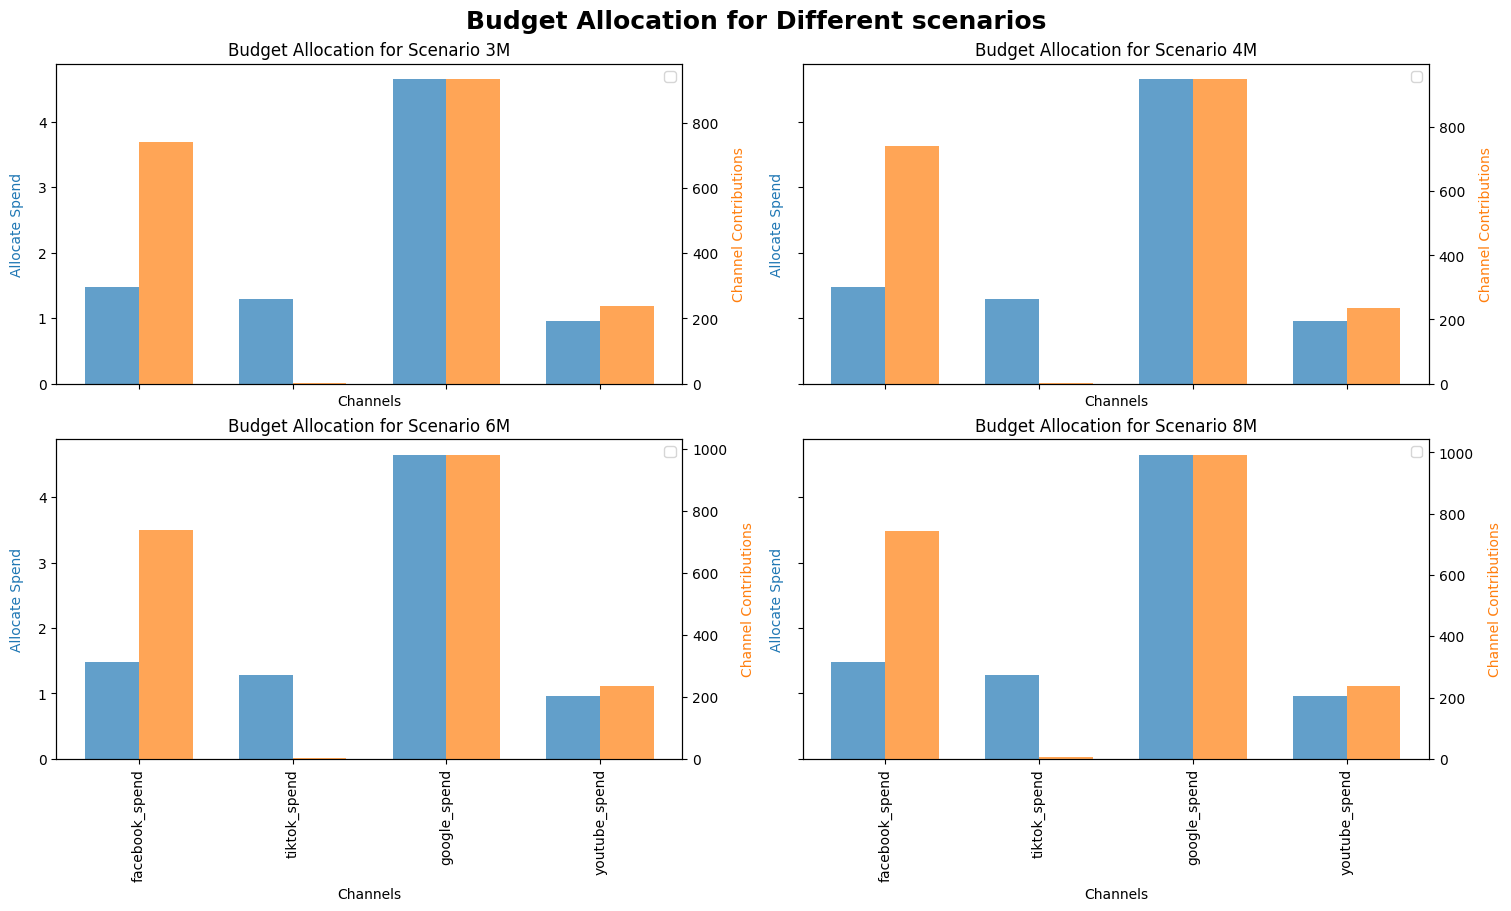

In [306]:
fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(15, 9), sharex=True, sharey=True, layout="constrained"
)
for i, scenario in enumerate(scenarios_result):
    row = i // 2
    col = i % 2
    _, ax = mmm.plot_budget_allocation(samples=scenario, ax=axes[row, col])
    ax.set_title(f"Budget Allocation for Scenario {scenarios[i] * total_budget:.0f}M")

fig.suptitle(
    "Budget Allocation for Different scenarios", fontsize=18, fontweight="bold"
);

## Weekly Model

In [324]:
# # Ensure the 'date' column is in datetime format
# gdf['date'] = pd.to_datetime(gdf['date'])

# # Set the 'date' column as the index if it's not already
# gdf.set_index('date', inplace=True)
weekly_df = pd.read_csv('weekly_data.csv')
weekly_df['date'] = pd.to_datetime(weekly_df['date'])

weekly_df

/var/folders/6y/bby5x37d4ls5pmph__zr1f_80000gn/T/ipykernel_41630/3800225212.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weekly_df['date'] = pd.to_datetime(weekly_df['date'])


date           rev         spend  facebook_spend  youtube_spend  \
0  2022-09-05  1.913091e+06  139296.43140     75047.48647   22520.650480   
1  2022-09-12  1.971481e+06  225912.83870    139664.85840   30528.795570   
2  2022-09-19  1.356331e+06  182634.15050     95699.39100   33557.898040   
3  2022-09-26  1.258587e+06   82290.42582     34859.09062   18084.025200   
4  2022-10-03  1.128700e+06   75372.46661     32847.58067   16560.415930   
5  2022-10-10  1.200668e+06  171879.59940     72281.32932   34057.312000   
6  2022-10-17  1.224089e+06  195806.21060     79573.21163   32448.197650   
7  2022-10-24  1.094566e+06  193489.98540     90650.75837   32129.731010   
8  2022-10-31  1.023736e+06  158890.76860     70462.67095   30295.270970   
9  2022-11-07  9.023614e+05  205287.39610     86852.46983   40695.901170   
10 2022-11-14  1.061151e+06  245907.67870    102023.77750   50241.988270   
11 2022-11-21  2.488403e+06  321049.20870    143347.72180   61129.294250   
12 2022-11-28  5.949820e+06  558849.56480    273992.42810   46271.578540   
13 2022-12-05  1.866755e+06  266233.89940    125924.03040   41233.540030   
14 2022-12-12  1.786297e+06  264229.06320    117441.63160   43804.258790   
15 2022-12-19  1.334731e+06  177910.00880     84917.51608   24479.050520   
16 2022-12-26  1.202011e+06   81575.49382     36245.27407    4364.692031   
17 2023-01-02  1.090612e+06   42178.06252     17554.05014       0.000000   
18 2023-01-09  1.141484e+06   63126.01825     21704.26967    5651.256352   
19 2023-01-16  9.949446e+05   86505.67229     38808.85006    7338.087093   
20 2023-01-23  9.780654e+05   97618.65892     42175.97000    8178.658920   
21 2023-01-30  1.023098e+06   86092.16194     47240.67000       0.000000   
22 2023-02-06  1.003740e+06   82725.35143     50119.62857       0.000000   
23 2023-02-13  9.978501e+05   97219.95662     69598.86143       0.000000   
24 2023-02-20  1.113142e+06  136565.15870     96077.04006       0.000000   
25 2023-02-27  1.056782e+06   97737.10406     61198.97994       0.000000   
26 2023-03-06  1.013364e+06  121616.17470     73586.83000       0.000000   
27 2023-03-13  1.135303e+06  125113.84320     73799.83012       0.000000   
28 2023-03-20  1.084242e+06  100303.62800     61374.66006    1665.683079   
29 2023-03-27  1.145002e+06  115777.31680     55652.75952   12709.809370   
30 2023-04-03  1.052311e+06  120332.35390     60915.38031   16918.754220   
31 2023-04-10  1.299576e+06  157666.10110     85409.73000   12194.152050   
32 2023-04-17  1.644018e+06  155473.54460     75909.94000   16664.866650   
33 2023-04-24  1.657550e+06  193912.17810    109806.77700   19773.104040   
34 2023-05-01  1.772878e+06  212735.67050    110643.12080   19586.579670   
35 2023-05-08  1.748049e+06  189807.73930     92793.45375   14922.385190   
36 2023-05-15  2.026191e+06  169712.30220     76998.07842   14973.535220   
37 2023-05-22  2.589606e+06  220776.91600    108178.93000   21587.473630   
38 2023-05-29  3.661030e+06  401103.23140    198421.55000   44751.903760   
39 2023-06-05  2.822782e+06  378007.04530    202693.49000   44730.470200   
40 2023-06-12  2.176550e+06  224966.10030     93242.40001   42669.346000   
41 2023-06-19  3.377822e+06  200264.12940     84792.72060   43429.524060   
42 2023-06-26  2.286313e+06  242280.46880     94501.60919   41917.001320   
43 2023-07-03  2.784183e+06  290590.38720    117383.88050   46127.742390   
44 2023-07-10  3.762258e+06  351793.41330    161888.61970   51381.077840   
45 2023-07-17  2.905925e+06  312947.29980    136792.24000   48673.572090   
46 2023-07-24  2.808766e+06  281564.64310    130502.91990   45403.957030   
47 2023-07-31  3.522126e+06  274285.72580    129504.69940   43881.121110   
48 2023-08-07  3.061163e+06  264529.99280    126594.13070   41636.022420   
49 2023-08-14  2.647272e+06  223631.70320    118066.12000   34603.153230   
50 2023-08-21  2.615020e+06  202265.39540    100785.44000   30134.290530   
51 2023-08-28  2.634453e+06  203872.08740    105873.13000

In [326]:
weekly_df = weekly_df.assign(
    year = lambda x: x["date"].dt.year,
    month = lambda x: x["date"].dt.month,
    dayofyear = lambda x: x["date"].dt.dayofyear,
).assign(trend = lambda x: weekly_df.index)

In [328]:
total_spend_per_channel_w = weekly_df[['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']].sum(axis=0)
total_spend_per_channel_w

facebook_spend    4.942361e+06
tiktok_spend      8.919037e+04
google_spend      3.817452e+06
youtube_spend     1.319614e+06
dtype: float64

In [334]:
spend_proportion_w = total_spend_per_channel_w / total_spend_per_channel_w.sum()
spend_proportion_w

facebook_spend    0.486041
tiktok_spend      0.008771
google_spend      0.375415
youtube_spend     0.129773
dtype: float64

In [336]:
HALFNORMAL_SCALE_w = 1/ np.sqrt(1- 2 / np.pi)

In [338]:
prior_sigma_w = HALFNORMAL_SCALE_w * n_channels * spend_proportion_w

In [340]:
prior_sigma_w.tolist()


[3.2251649839306364,
 0.05820166440831469,
 2.4910991298527705,
 0.8611211816895022]

In [342]:
X_w = weekly_df[['date','facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend','trend','year', 'month']]


In [344]:
y_w = weekly_df['rev']


In [346]:
dummy_model_w = MMM(
    date_column="",
    channel_columns=[""],
    adstock=GeometricAdstock(l_max=4),
    saturation=LogisticSaturation(),
)
dummy_model_w.default_model_config

{'intercept': Prior("Normal", mu=0, sigma=2),
 'likelihood': Prior("Normal", sigma=Prior("HalfNormal", sigma=2)),
 'gamma_control': Prior("Normal", mu=0, sigma=2, dims="control"),
 'gamma_fourier': Prior("Laplace", mu=0, b=1, dims="fourier_mode"),
 'adstock_alpha': Prior("Beta", alpha=1, beta=3, dims="channel"),
 'saturation_lam': Prior("Gamma", alpha=3, beta=1, dims="channel"),
 'saturation_beta': Prior("HalfNormal", sigma=2, dims="channel")}

In [348]:
mmm_w = MMM(
    model_config = my_model_config,
    #sample_config = my_sampler_config,
    date_column='date',
    adstock=GeometricAdstock(l_max=8),
    saturation=LogisticSaturation(),
    channel_columns=['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend'],
    control_columns=['trend', 'year','month'],
    yearly_seasonality=2,
)



In [350]:
mmm_w.fit(X=weekly_df[['date', 'facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend','trend','year', 'month']], y=weekly_df['rev'], target_accept=0.95, chains=4, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, adstock_alpha, saturation_lam, saturation_beta, gamma_control, gamma_fourier, y_sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 189 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

In [352]:
mmm_w.model_config

{'intercept': Prior("Normal", mu=0, sigma=2),
 'likelihood': Prior("Normal", sigma=Prior("HalfNormal", sigma=2), dims="date"),
 'gamma_control': Prior("Normal", mu=0, sigma=2, dims="control"),
 'gamma_fourier': Prior("Laplace", mu=0, b=1),
 'adstock_alpha': Prior("Beta", alpha=1, beta=3, dims="channel"),
 'saturation_lam': Prior("Gamma", alpha=3, beta=1, dims="channel"),
 'saturation_beta': Prior("HalfNormal", sigma=2, dims="channel"),
 'beta_channel': Prior("HalfNormal", sigma=[3.22516498 0.05820166 2.49109913 0.86112118]),
 'alpha': Prior("Beta", alpha=1, beta=3),
 'lam': Prior("Gamma", alpha=3, beta=1)}

In [354]:
mmm_w.default_model_config

{'intercept': Prior("Normal", mu=0, sigma=2),
 'likelihood': Prior("Normal", sigma=Prior("HalfNormal", sigma=2)),
 'gamma_control': Prior("Normal", mu=0, sigma=2, dims="control"),
 'gamma_fourier': Prior("Laplace", mu=0, b=1, dims="fourier_mode"),
 'adstock_alpha': Prior("Beta", alpha=1, beta=3, dims="channel"),
 'saturation_lam': Prior("Gamma", alpha=3, beta=1, dims="channel"),
 'saturation_beta': Prior("HalfNormal", sigma=2, dims="channel")}

In [356]:
mmm_w.save("mmm_weekly_model2.pkl")

In [358]:
mmm_w.idata


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

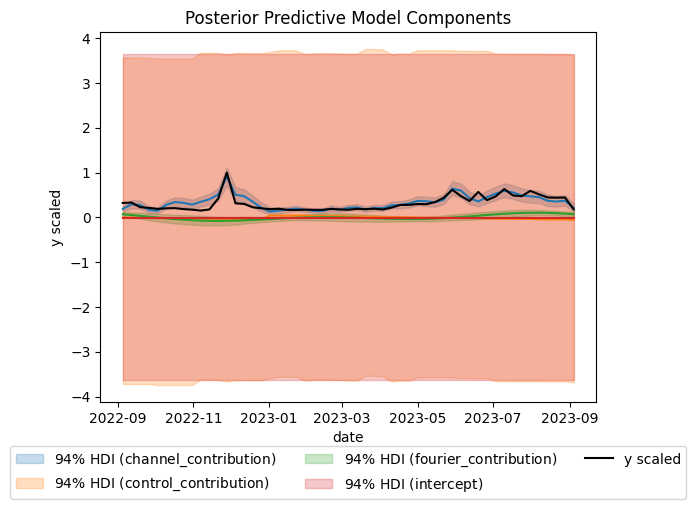

In [360]:
fig = mmm_w.plot_components_contributions()

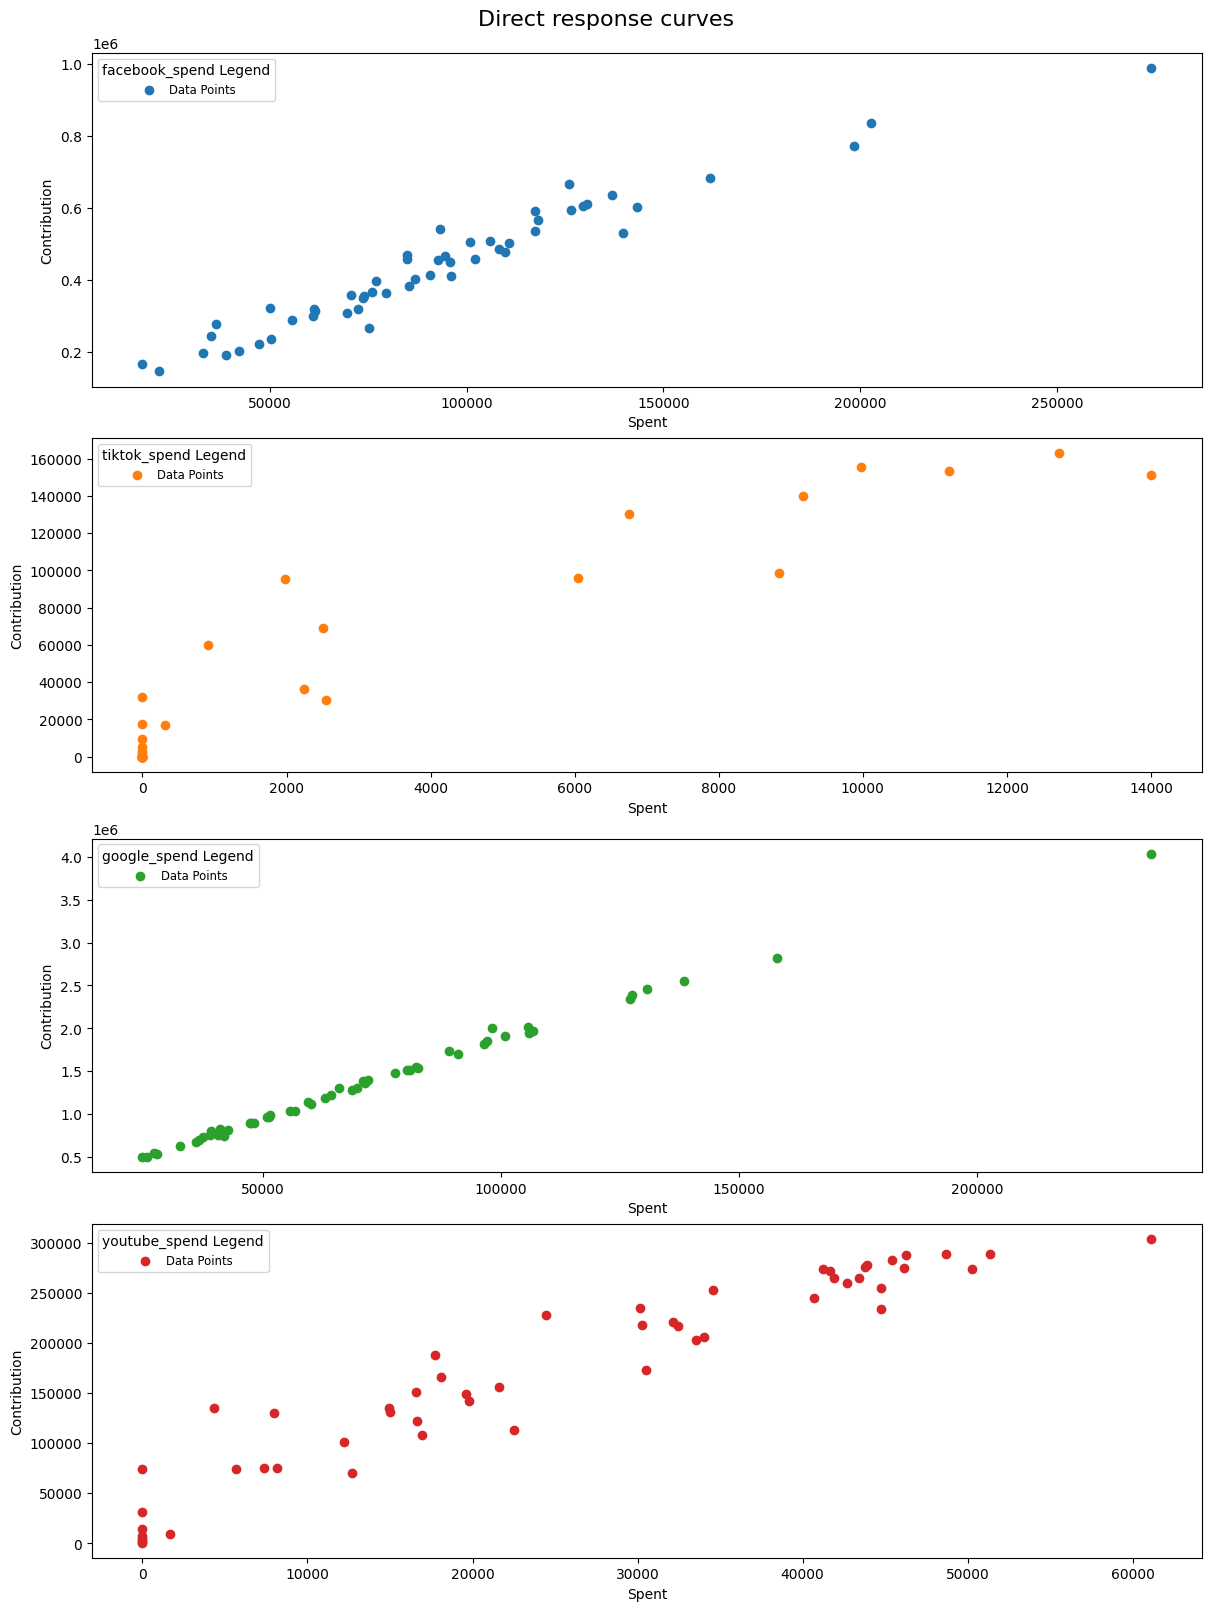

In [362]:
fig = mmm_w.plot_direct_contribution_curves()

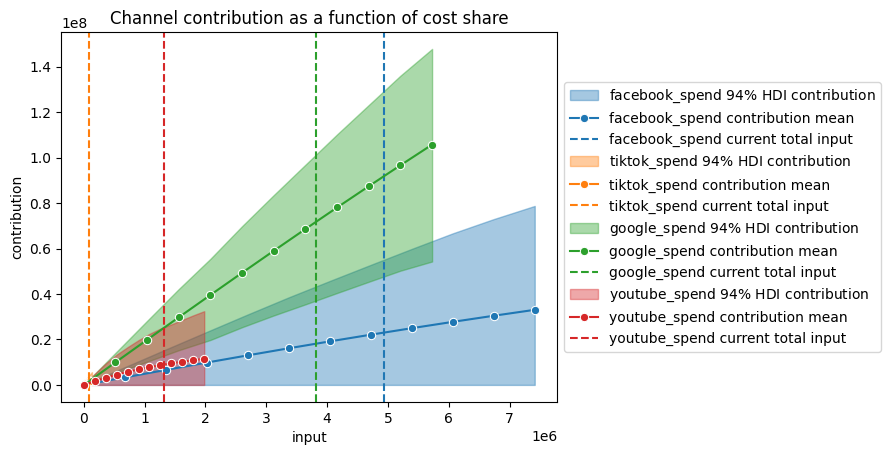

In [364]:
fig = mmm_w.plot_channel_contributions_grid(start=0, stop=1.5, num=12, absolute_xrange=True)

In [365]:
get_mean_contributions_over_time_df = mmm_w.compute_mean_contributions_over_time(original_scale= True)

In [366]:
channel_contribution_original_scale = mmm_w.compute_channel_contribution_original_scale()

In [367]:
roas_samples2 = (
    channel_contribution_original_scale.stack(sample=("chain", "draw")).sum("date") / X[['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']].sum().to_numpy()[..., None])





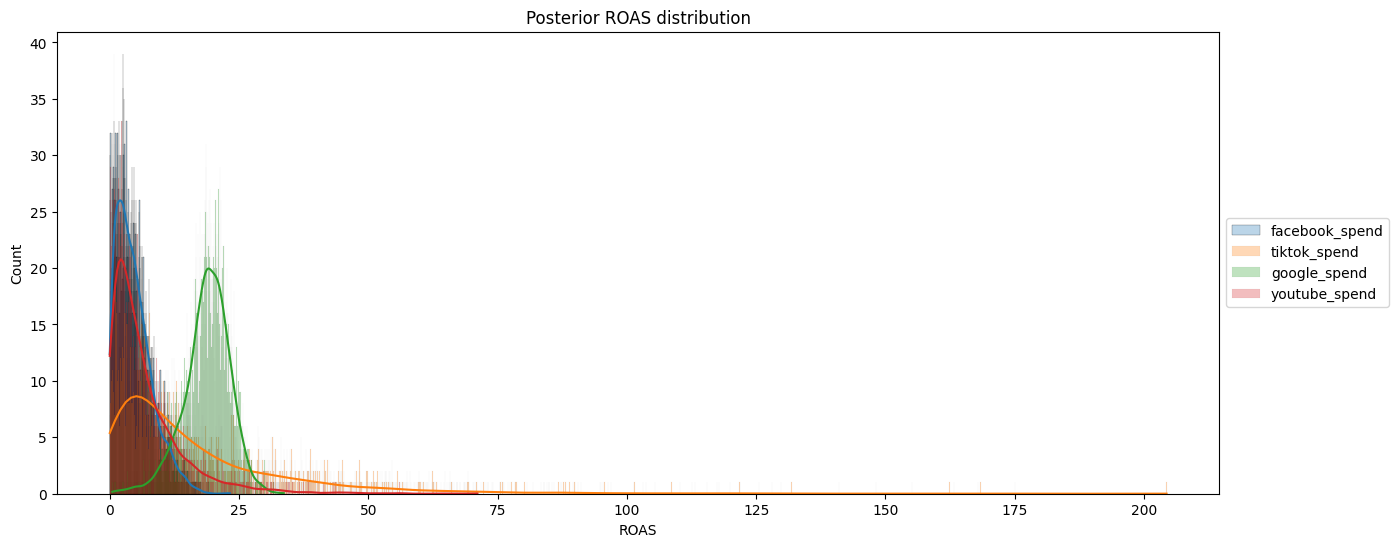

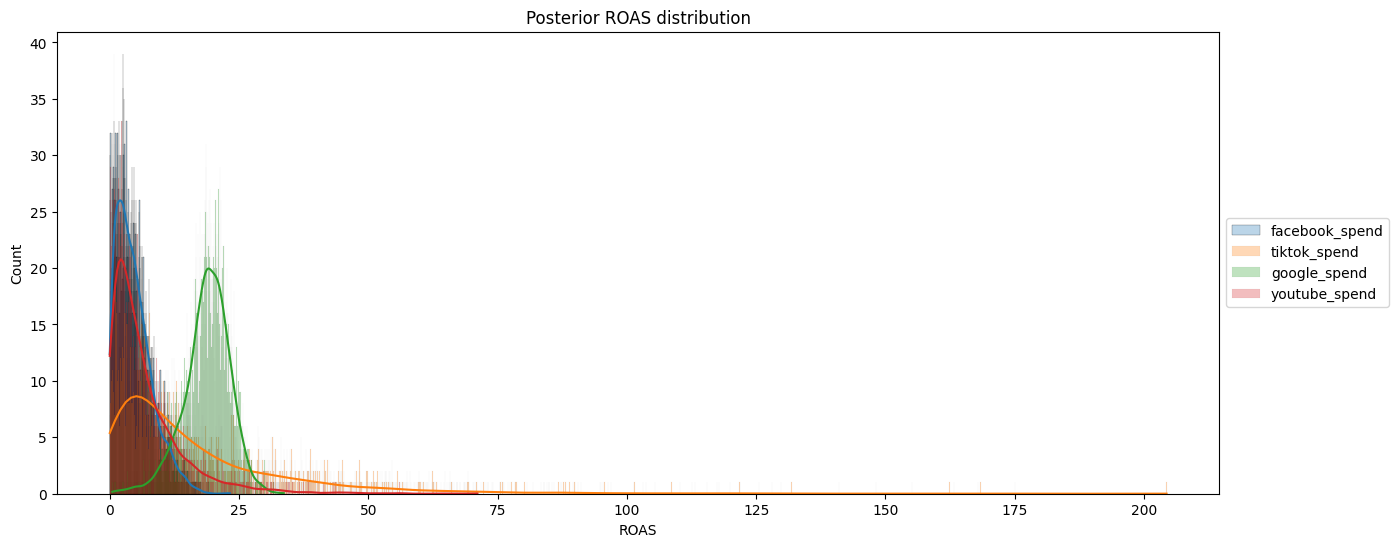

In [372]:
fig, ax= plt.subplots(figsize=(15,6)) 
for channel in ['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']:
    sns.histplot(roas_samples2.sel(channel=channel).to_numpy(), binwidth=0.05, alpha= 0.3, kde=True, ax=ax, legend=True, label=channel)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Posterior ROAS distribution', xlabel='ROAS')
fig

In [374]:
roas_df2 = roas_samples2.to_dataframe(name="roas")


In [376]:
roas_df2.groupby("channel").mean()


chain   draw       roas
channel                                
facebook_spend    1.5  499.5   4.667126
google_spend      1.5  499.5  18.801374
tiktok_spend      1.5  499.5  16.445541
youtube_spend     1.5  499.5   6.786810

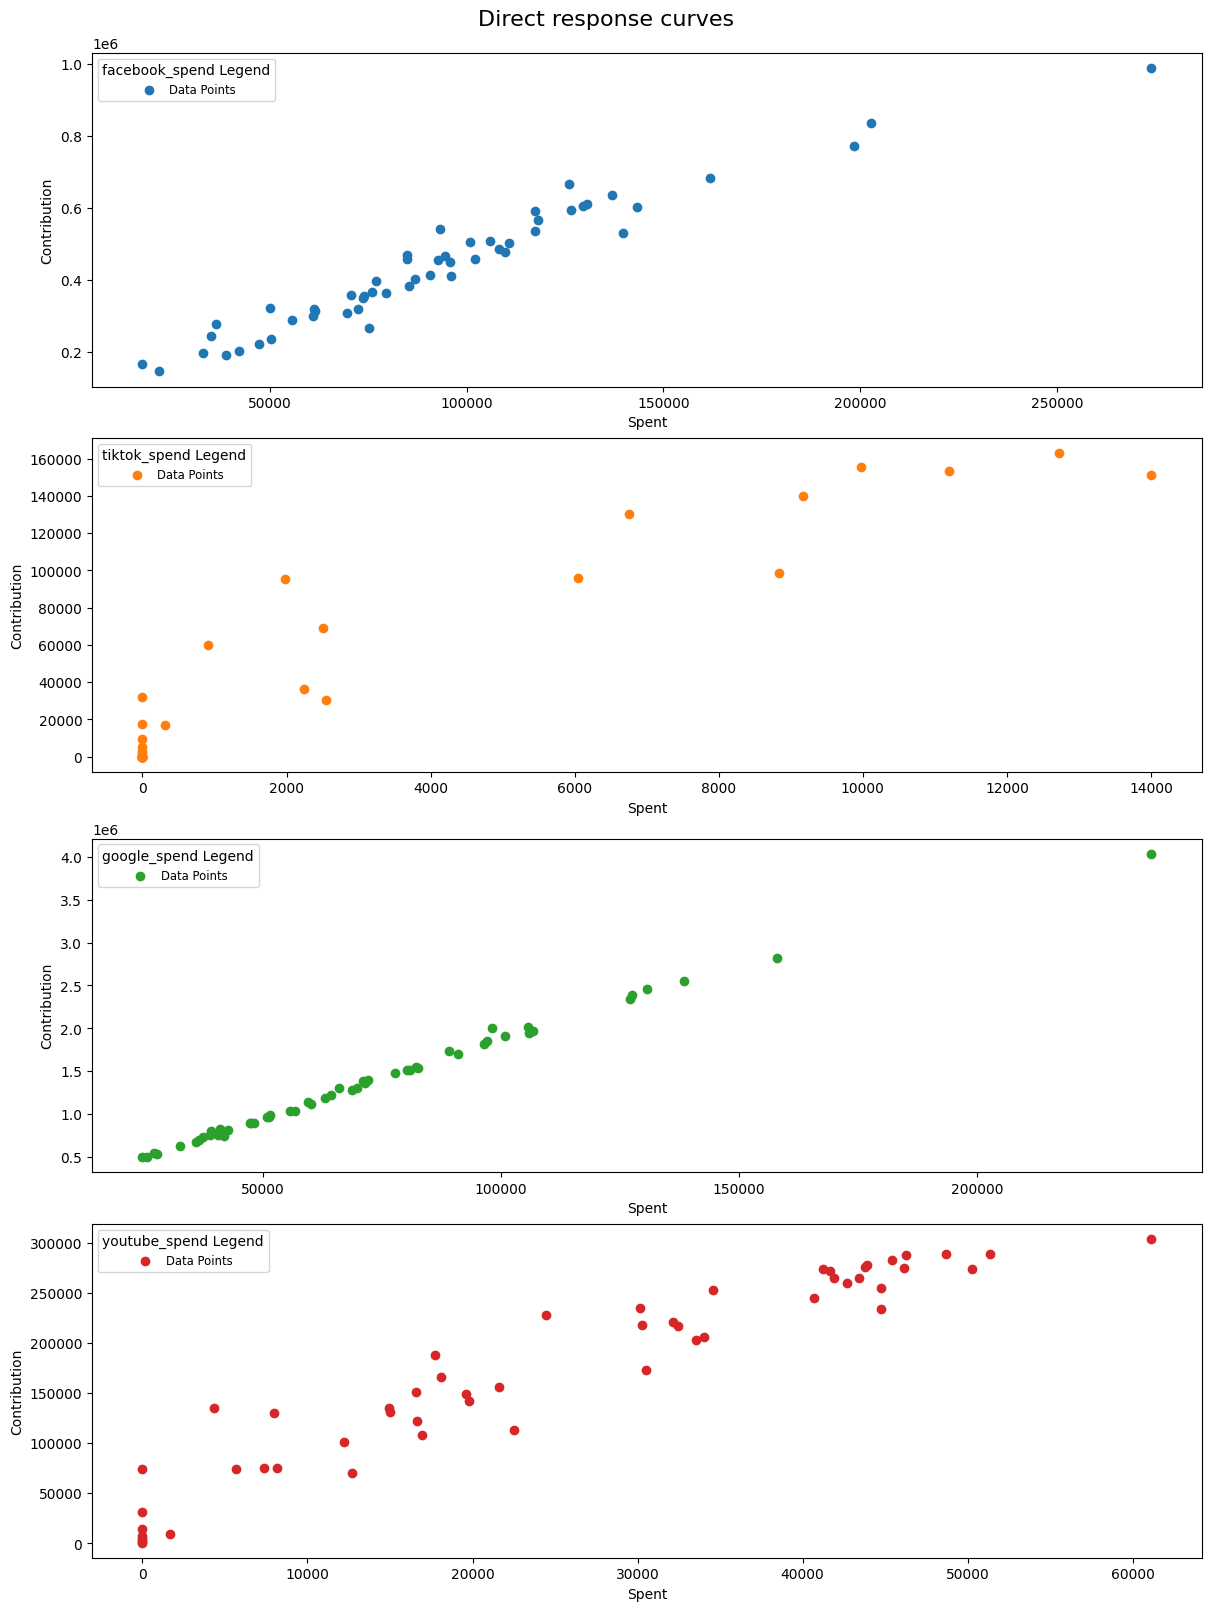

In [378]:
response_curve_fig= mmm_w.plot_direct_contribution_curves()


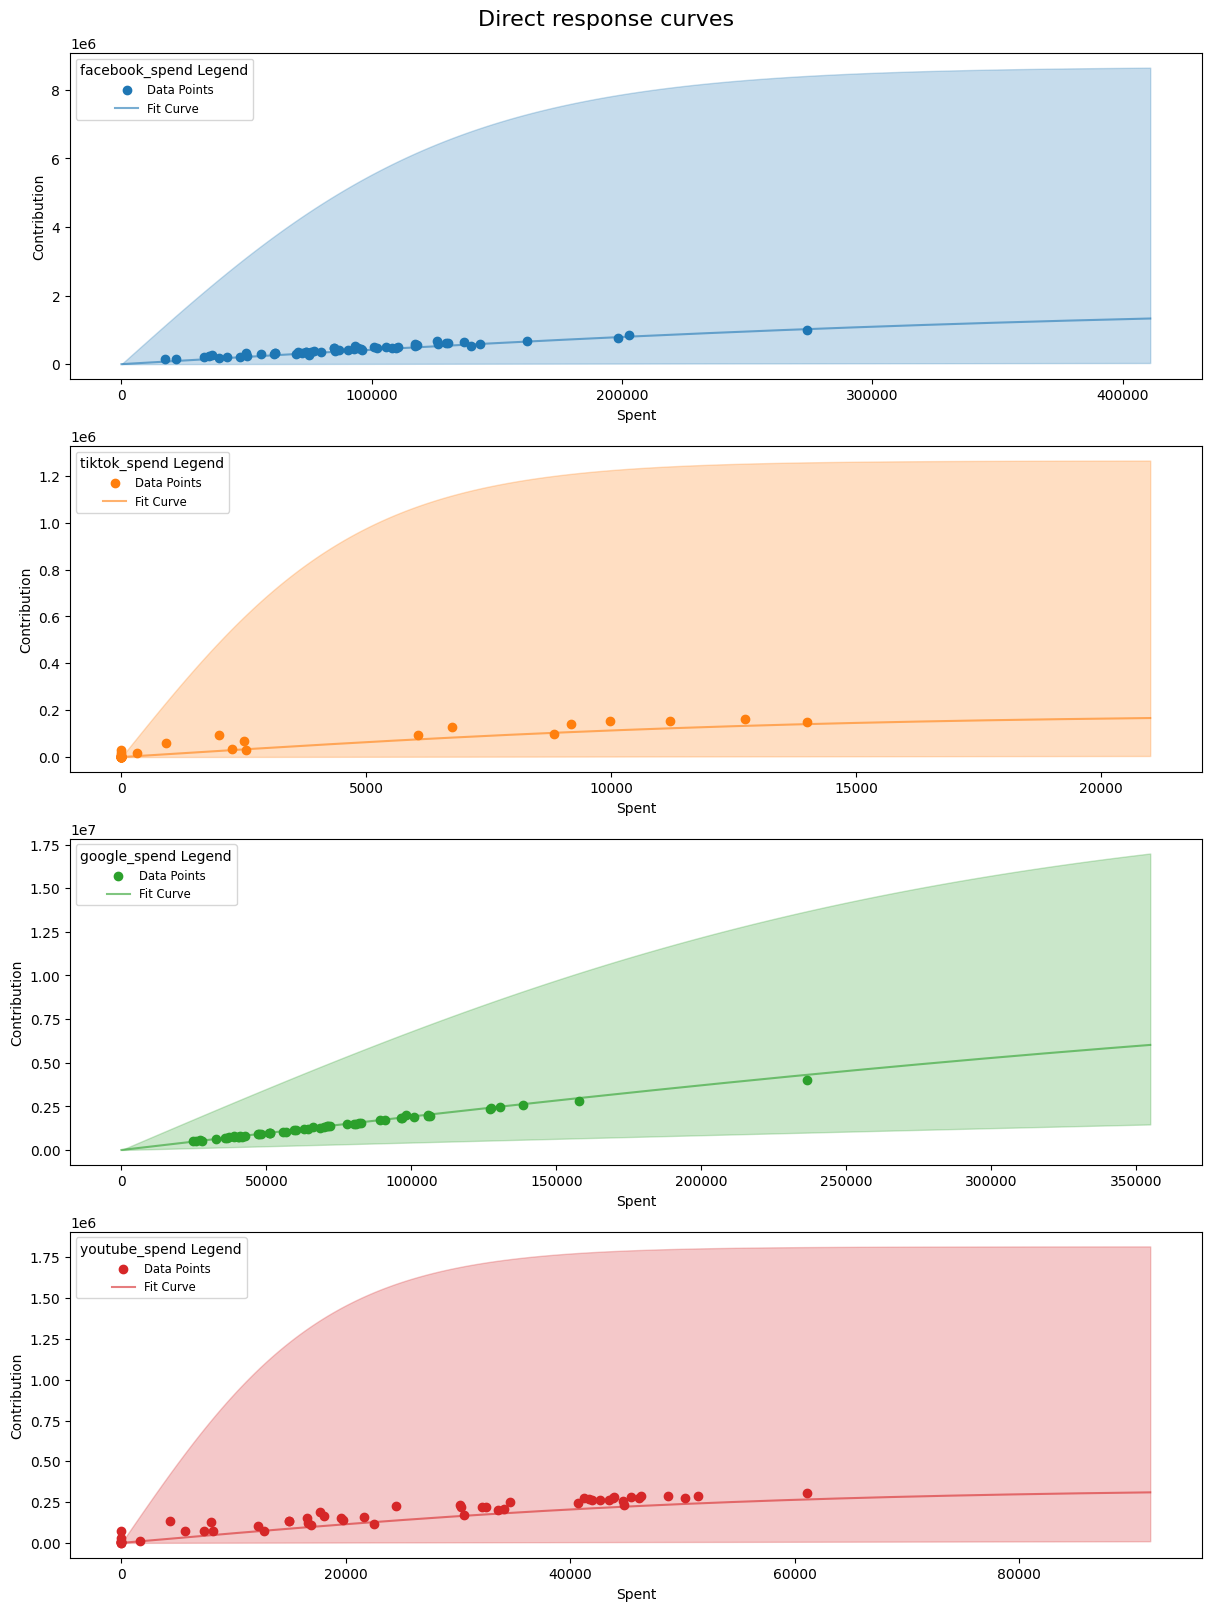

In [380]:
mmm_w.plot_direct_contribution_curves(show_fit=True, xlim_max=1.5);

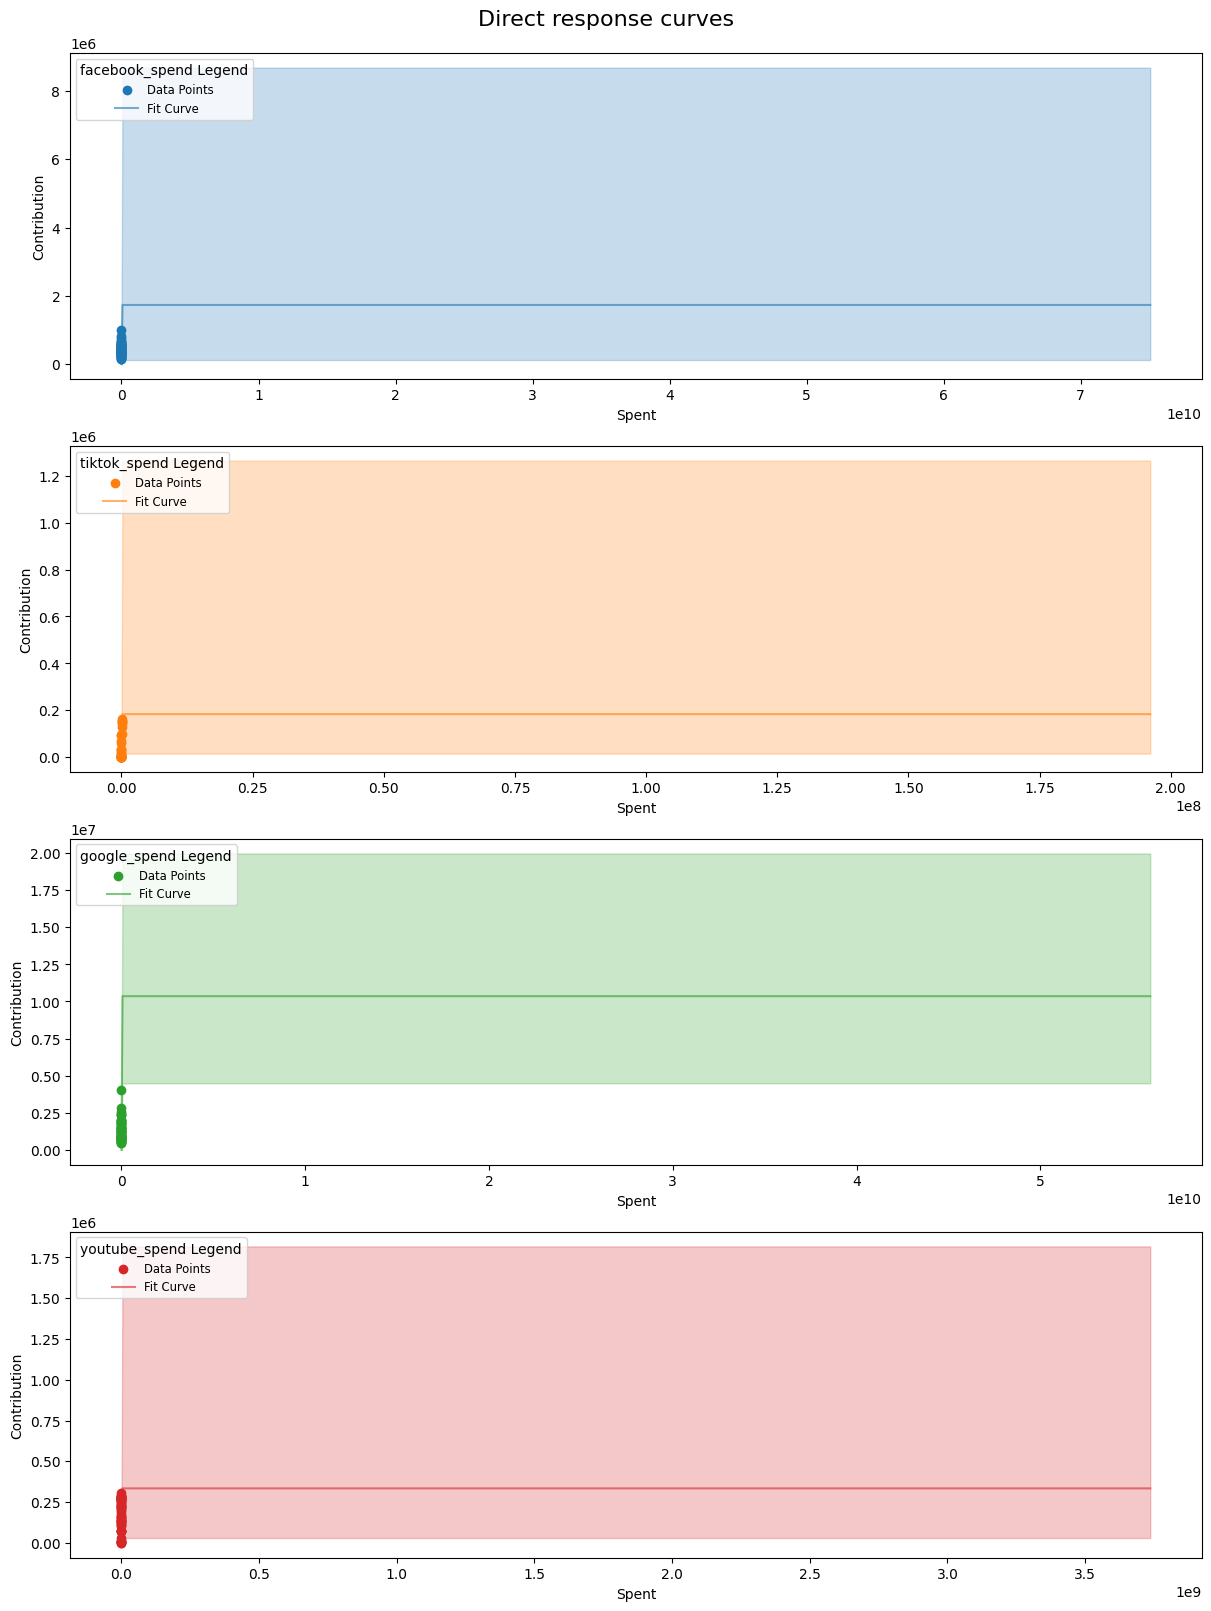

In [382]:
sigmoid_response_curve_fig = mmm_w.plot_direct_contribution_curves(show_fit=True)

In [386]:
az.summary(
    data=mmm_w.fit_result,
    var_names=[
        "saturation_beta",
        "saturation_lam",
        "adstock_alpha",
    ],
)

mean     sd  hdi_3%  hdi_97%  mcse_mean  \
saturation_beta[facebook_spend]  0.446  0.494   0.000    1.360      0.013   
saturation_beta[tiktok_spend]    0.062  0.115   0.000    0.192      0.003   
saturation_beta[google_spend]    1.855  0.815   0.497    3.474      0.022   
saturation_beta[youtube_spend]   0.097  0.143   0.000    0.286      0.003   
saturation_lam[facebook_spend]   1.684  1.214   0.188    4.016      0.024   
saturation_lam[tiktok_spend]     2.419  1.681   0.112    5.554      0.029   
saturation_lam[google_spend]     0.956  0.424   0.324    1.673      0.013   
saturation_lam[youtube_spend]    2.705  1.991   0.152    6.470      0.032   
adstock_alpha[facebook_spend]    0.260  0.216   0.000    0.675      0.004   
adstock_alpha[tiktok_spend]      0.318  0.226   0.001    0.720      0.004   
adstock_alpha[google_spend]      0.072  0.078   0.000    0.199      0.002   
adstock_alpha[youtube_spend]     0.323  0.225   0.001    0.722      0.005   

                                 mcse_sd  ess_bulk  ess_tail  r_hat  
saturation_beta[facebook_spend]    0.009    1360.0    1464.0    1.0  
saturation_beta[tiktok_spend]      0.002    1751.0    2056.0    1.0  
saturation_beta[google_spend]      0.016    1072.0     882.0    1.0  
saturation_beta[youtube_spend]     0.002    1743.0    2001.0    1.0  
saturation_lam[facebook_spend]     0.017    2389.0    2719.0    1.0  
saturation_lam[tiktok_spend]       0.020    2587.0    1883.0    1.0  
saturation_lam[google_spend]       0.010    1512.0    1608.0    1.0  
saturation_lam[youtube_spend]      0.022    2853.0    1713.0    1.0  
adstock_alpha[facebook_spend]      0.003    2117.0    1877.0    1.0  
adstock_alpha[tiktok_spend]        0.003    3584.0    2617.0    1.0  
adstock_alpha[google_spend]        0.001    2805.0    1973.0    1.0  
adstock_alpha[youtube_spend]       0.003    2298.0    1995.0    1.0

In [388]:
fig, ax = mmm_w.plot_budget_allocation(samples=response, figsize=(12, 8))
ax.set_title("Response vs spent per channel", fontsize=18, fontweight="bold");

fig = mmm_w.plot_allocated_contribution_by_channel(samples=response)
fig.suptitle(
    "Estimated Contribution per channel over time", fontsize=18, fontweight="bold"
);

AttributeError: 'MMM' object has no attribute 'optimal_allocation_dict'

In [390]:
## Weekly Budgeting

In [394]:
total_budget =5  # Imagine is 5K or 5M
# Define your channels
channels = ['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']
# The initial split per channel
budget_per_channel = total_budget / len(channels)
# Initial budget per channel as dictionary.
initial_budget_dict = {channel: budget_per_channel for channel in channels}
# bounds for each channel
min_budget, max_budget = 1, 5
budget_bounds = {channel: [min_budget, max_budget] for channel in channels}

response = mmm_w.allocate_budget_to_maximize_response(
    budget=total_budget,
    num_periods=13,
    time_granularity="weekly",
    budget_bounds=budget_bounds,
)
print(mmm_w.optimal_allocation_dict)

/opt/anaconda3/lib/python3.11/site-packages/pymc_marketing/mmm/mmm.py:2205: UserWarning: Using default equality constraint: The sum of all budgets should be equal to the total budget.
  self.optimal_allocation_dict, _ = allocator.allocate_budget(


{'facebook_spend': 1.25, 'tiktok_spend': 1.25, 'google_spend': 1.25, 'youtube_spend': 1.25}


In [291]:
# ----------------------------

# Out of Scope Research and Development

In [434]:
y_out_of_sample = mmm.sample_posterior_predictive(
    X_pred=X_out_of_sample, extend_idata=False
)

y_out_of_sample

NameError: name 'X_out_of_sample' is not defined

In [436]:
X=gdf[['date', 'facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend','trend','year', 'month']]
y=gdf['rev']

NameError: name 'X_out_of_sample' is not defined

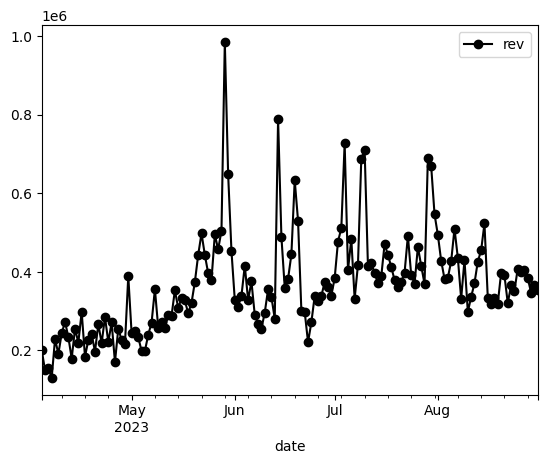

In [438]:
def plot_in_sample(X, y, ax, n_points: int = 150):
    (
        y.to_frame()
        .set_index(X["date"])
        .iloc[-n_points:]
        .plot(ax=ax, marker="o", color="black", label="actuals")
    )
    return ax


def plot_out_of_sample(X_out_of_sample, y_out_of_sample, ax, color, label):
    y_out_of_sample_groupby = y_out_of_sample["y"].to_series().groupby("date")

    lower, upper = quantiles = [0.025, 0.975]
    conf = y_out_of_sample_groupby.quantile(quantiles).unstack()
    ax.fill_between(
        X_out_of_sample["date"].dt.to_pydatetime(),
        conf[lower],
        conf[upper],
        alpha=0.25,
        color=color,
        label=f"{label} interval",
    )

    mean = y_out_of_sample_groupby.mean()
    mean.plot(ax=ax, marker="o", label=label, color=color, linestyle="--")
    ax.set(ylabel="Original Target Scale", title="Out of sample predictions for MMM")
    return ax


_, ax = plt.subplots()
plot_in_sample(X, y, ax=ax)
plot_out_of_sample(
    X_out_of_sample, y_out_of_sample, ax=ax, label="out of sample", color="C0"
)
ax.legend(loc="upper left");

NameError: name 'X_out_of_sample' is not defined

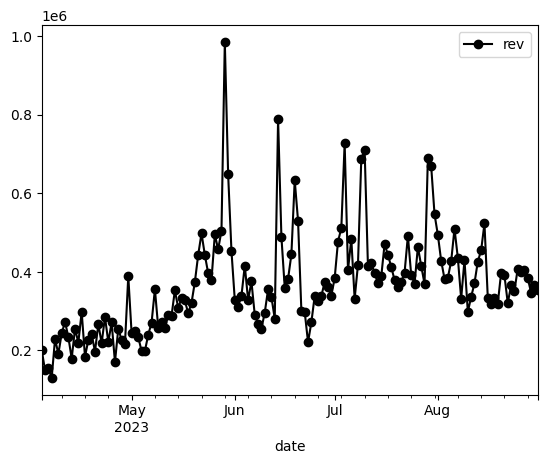

In [440]:
_, ax = plt.subplots()
plot_in_sample(X, y, ax=ax)
plot_out_of_sample(
    X_out_of_sample, y_out_of_sample, ax=ax, label="out of sample", color="C0"
)
plot_out_of_sample(
    X_out_of_sample,
    y_out_of_sample_with_adstock,
    ax=ax,
    label="adstock out of sample",
    color="C1",
)
ax.legend();

Model trace plot saved as 'model_trace_plot.png'


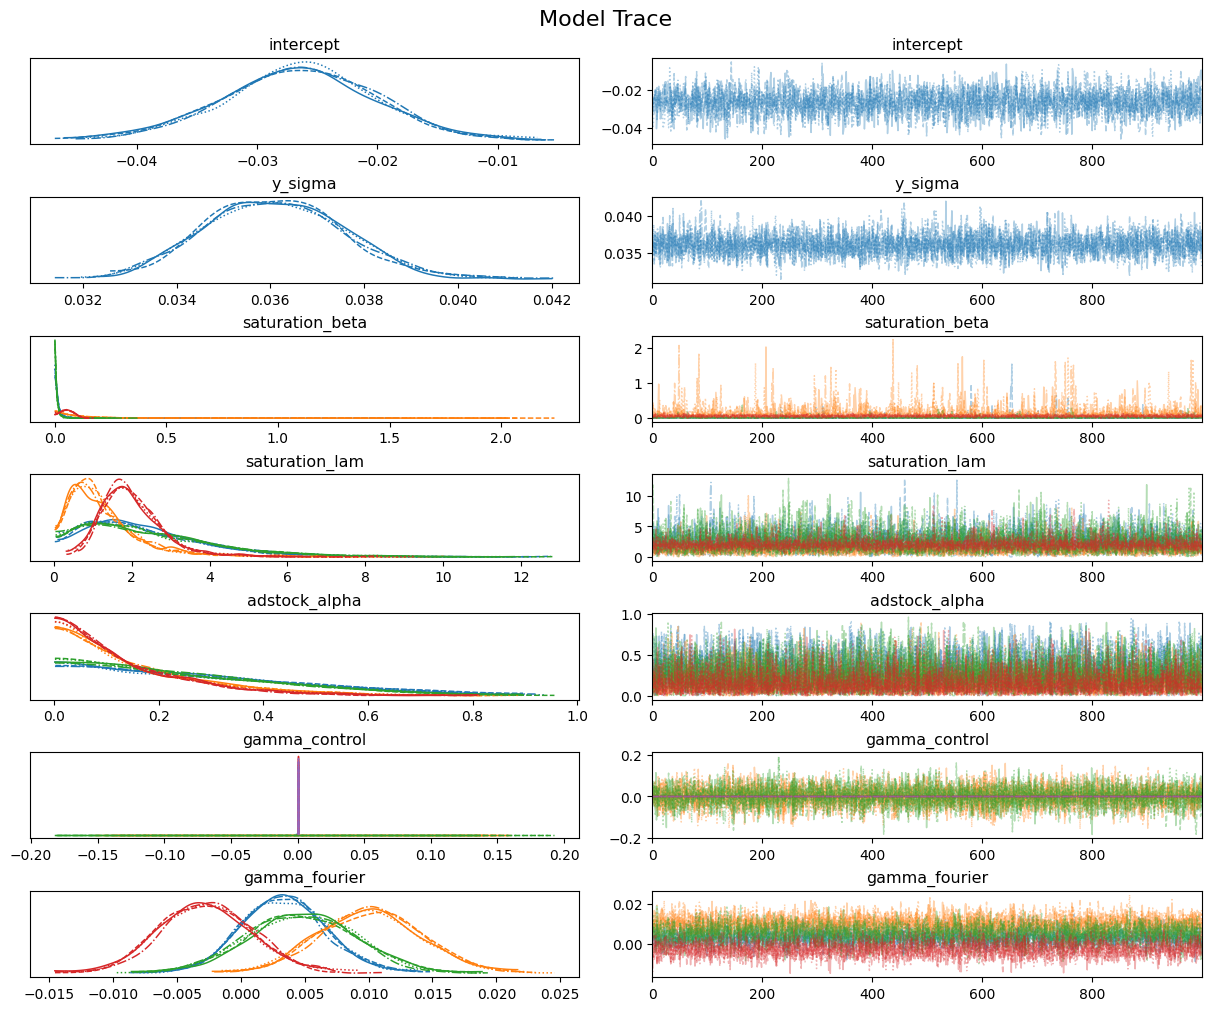

In [120]:
import arviz as az
import matplotlib.pyplot as plt

# Generate the trace plot and save it
_ = az.plot_trace(
    data=mmm.fit_result,
    var_names=[
        "intercept",
        "y_sigma",
        "saturation_beta",
        "saturation_lam",
        "adstock_alpha",
        "gamma_control",
        "gamma_fourier",
    ],
    compact=True,
    backend_kwargs={"figsize": (12, 10), "layout": "constrained"},
)

# Add a title
plt.gcf().suptitle("Model Trace", fontsize=16)

# Save the plot to a file
plt.savefig("model_trace_plot.png")

# Optional: print confirmation
print("Model trace plot saved as 'model_trace_plot.png'")

In [122]:
## GOOOD

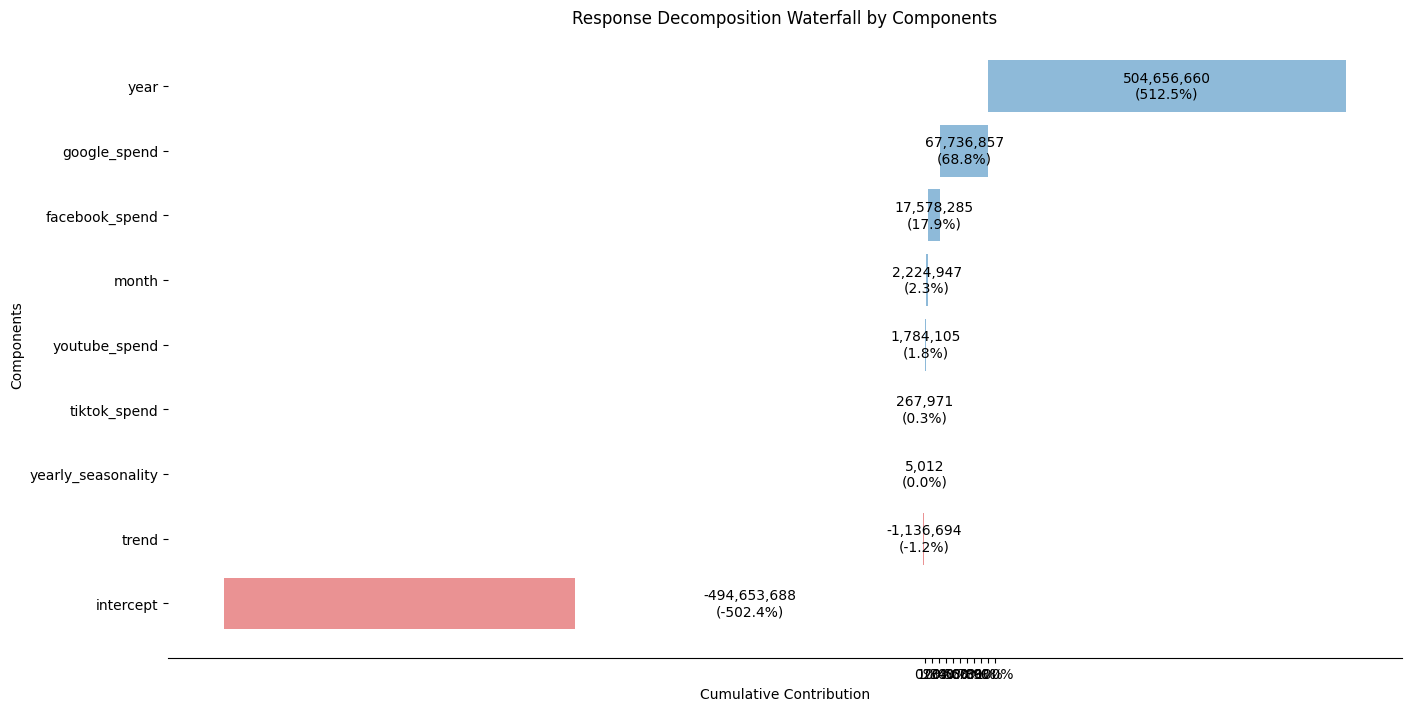

In [417]:
mmm.plot_waterfall_components_decomposition();


In [150]:
get_mean_contributions_over_time_df = mmm.compute_mean_contributions_over_time(
    original_scale=True
)

get_mean_contributions_over_time_df.head()

tiktok_spend  facebook_spend  youtube_spend  google_spend  \
date                                                                    
2022-09-01           0.0    15210.377250    4175.239121  13087.587797   
2022-09-02           0.0    17352.991620    4609.723188  12372.561268   
2022-09-03           0.0    18083.429456    4975.417579  13842.435654   
2022-09-04           0.0    18962.193537    5886.910893  14965.442961   
2022-09-05           0.0    22837.306307    5439.195212  15170.175939   

            subs_launch  pod3_summer_refresh  pod3_launch          trend  \
date                                                                       
2022-09-01          0.0                  0.0          0.0  419771.413821   
2022-09-02          0.0                  0.0          0.0  410525.311732   
2022-09-03          0.0                  0.0          0.0  400170.619904   
2022-09-04          0.0                  0.0          0.0  388741.399820   
2022-09-05          0.0                  0.0          0.0  376482.927888   

              seasonality  yearly_seasonality     intercept  
date                                                         
2022-09-01 -145335.870608         8822.096780 -48784.586504  
2022-09-02  -68441.629931         8708.000243 -48784.586504  
2022-09-03 -133821.279880         8575.041498 -48784.586504  
2022-09-04   65719.973934         8423.451356 -48784.586504  
2022-09-05  243238.760336         8253.485185 -48784.586504

# B5. Media Parameters

NameError: name 'alpha1' is not defined

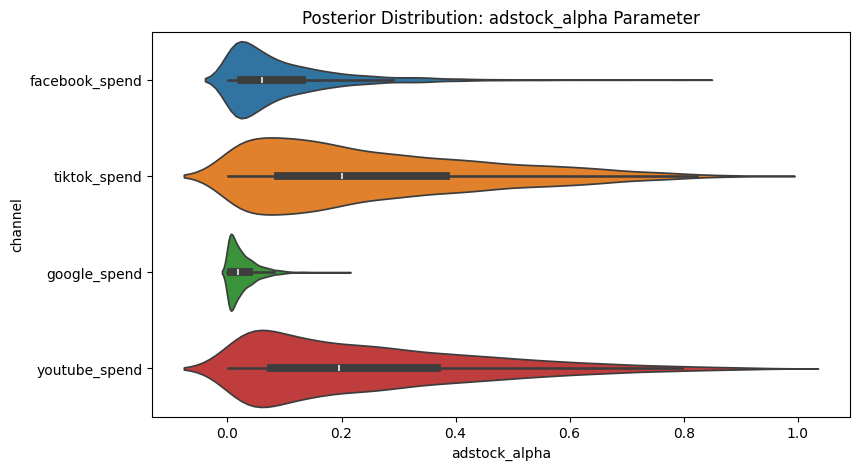

In [450]:
fig = mmm.plot_channel_parameter(param_name="adstock_alpha", figsize=(9, 5))
ax = fig.axes[0]
ax.axvline(x=alpha1, color="C0", linestyle="--", label=r"$\alpha_1$")
ax.axvline(x=alpha2, color="C1", linestyle="--", label=r"$\alpha_2$")
ax.axvline(x=alpha3, color="C2", linestyle="--", label=r"$\alpha_3$")
ax.axvline(x=alpha4, color="C3", linestyle="--", label=r"$\alpha_4$")

ax.legend(loc="upper right");

In [454]:
# Reshape the array to 2D
reshaped_values = mmm.fit_result['adstock_alpha'].values.reshape(-1, 4)

# Create a DataFrame with reshaped values
param_samples_df = pd.DataFrame(reshaped_values, columns=mmm.channel_columns)

# Check the DataFrame
param_samples_df.head()

facebook_spend  tiktok_spend  google_spend  youtube_spend
0        0.131229      0.094474      0.047403       0.025527
1        0.119667      0.089070      0.089777       0.033232
2        0.082363      0.074883      0.085870       0.030156
3        0.156604      0.372529      0.087785       0.046016
4        0.140970      0.400273      0.073015       0.042147

NameError: name 'alpha1' is not defined

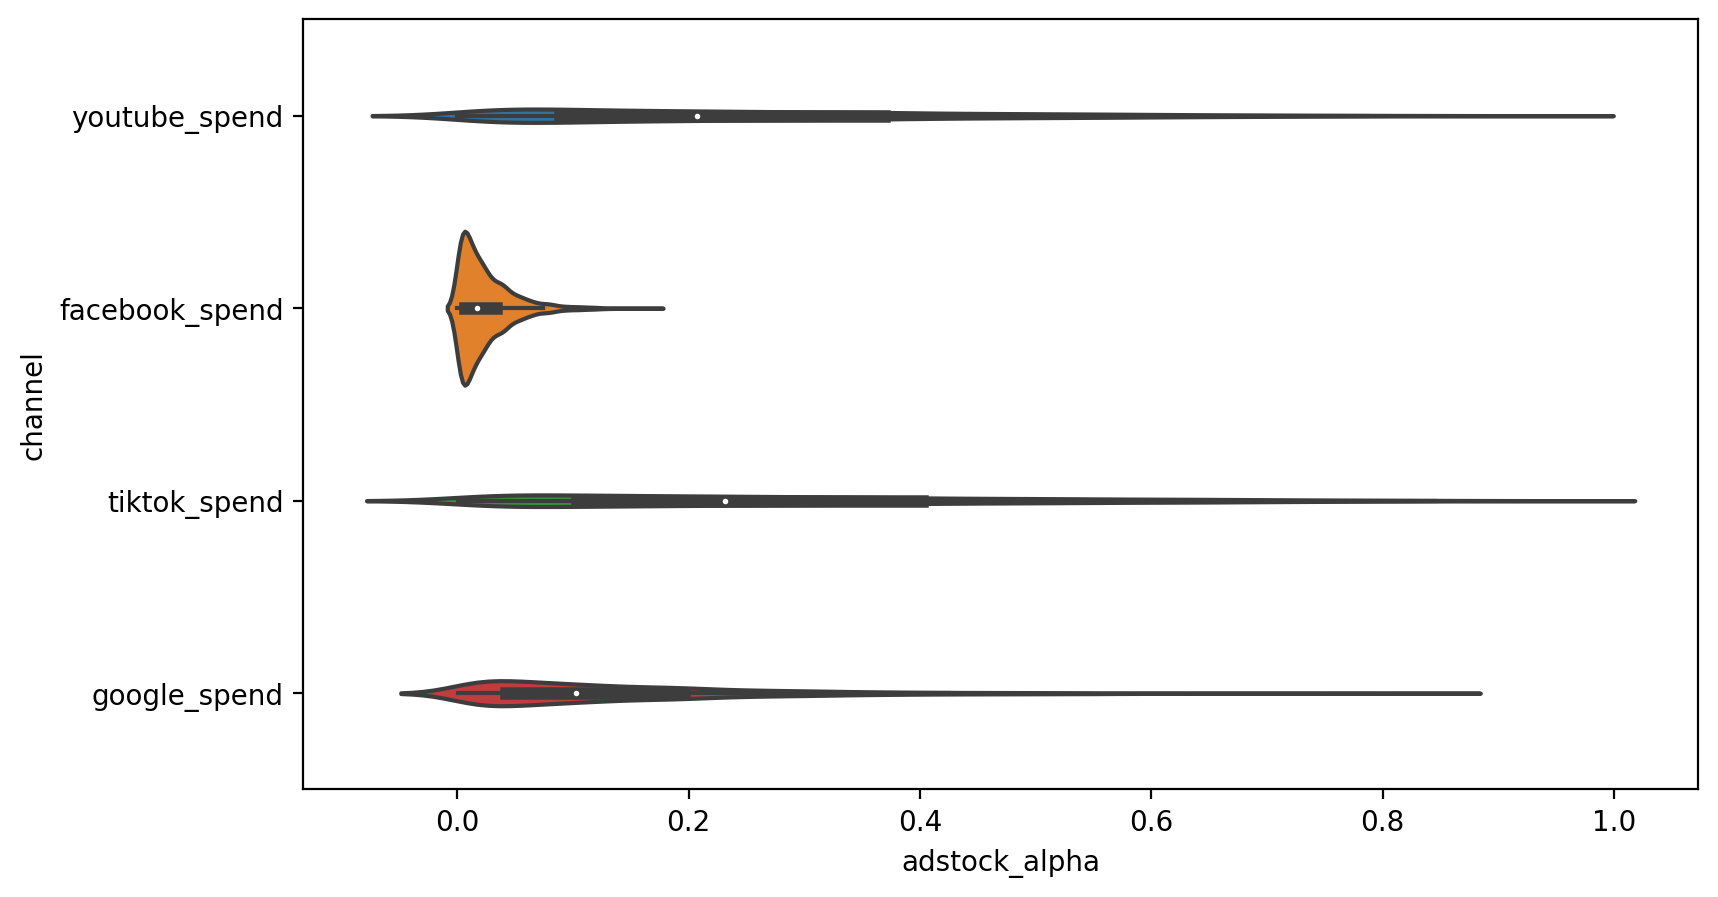

In [539]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt the DataFrame to convert it into long form for seaborn
param_samples_long = param_samples_df.melt(var_name='channel', value_name='adstock_alpha')

# Plot the reshaped values using seaborn's violin plot
fig, ax = plt.subplots(figsize=(9, 5))
sns.violinplot(x='adstock_alpha', y='channel', data=param_samples_long, ax=ax)  # Using the long DataFrame

# Add vertical lines for alpha1, alpha2, alpha3, and alpha4
ax.axvline(x=alpha1, color="C0", linestyle="--", label=r"$\alpha_1$")
ax.axvline(x=alpha2, color="C1", linestyle="--", label=r"$\alpha_2$")
ax.axvline(x=alpha3, color="C2", linestyle="--", label=r"$\alpha_3$")
ax.axvline(x=alpha4, color="C3", linestyle="--", label=r"$\alpha_4$")

# Add legend
ax.legend(loc="upper right")

# Set plot title and labels
ax.set_title('Adstock Alpha Parameter Distributions')
ax.set_xlabel('Adstock Alpha')

# Display the plot
plt.tight_layout()
plt.show()

# B6. Media Deep-dive

NameError: name 'contribution_share_x1' is not defined

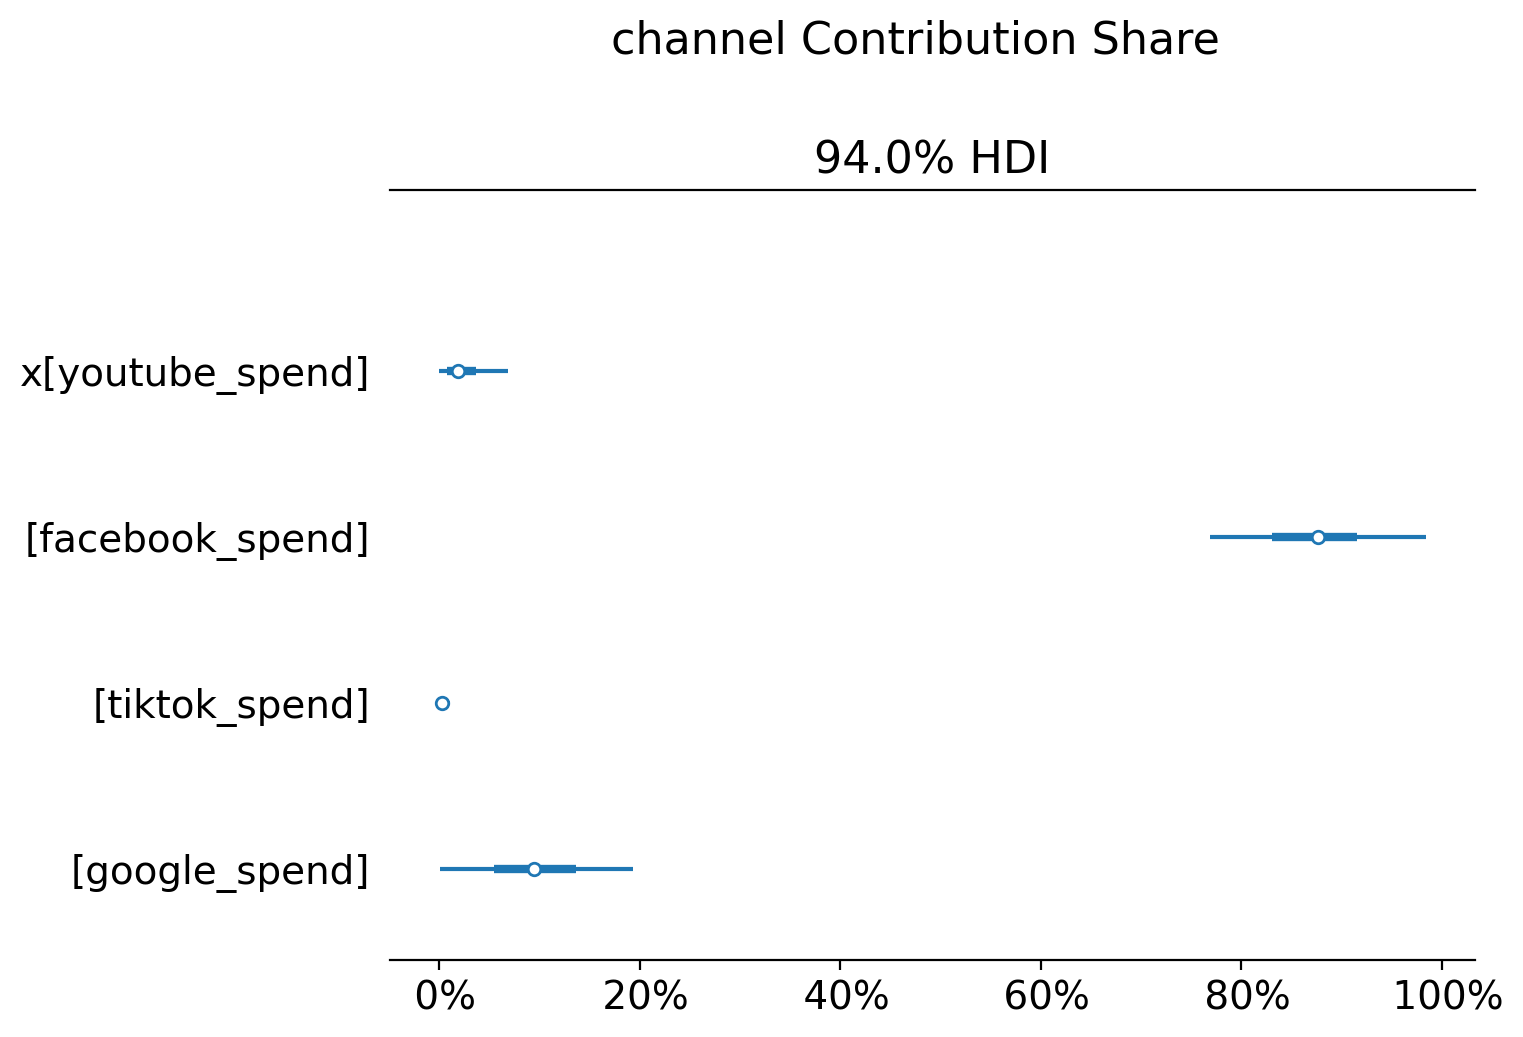

In [545]:
fig = mmm.plot_channel_contribution_share_hdi(figsize=(7, 5))
ax = fig.axes[0]
ax.axvline(
    x=contribution_share_x1,
    color="C1",
    linestyle="--",
    label="true contribution share ($x_1$)",
)
ax.axvline(
    x=contribution_share_x2,
    color="C2",
    linestyle="--",
    label="true contribution share ($x_2$)",
)
ax.axvline(
    x=contribution_share_x3,
    color="C3",
    linestyle="--",
    label="true contribution share ($x_3$)",
)
ax.axvline(
    x=contribution_share_x4,
    color="C4",
    linestyle="--",
    label="true contribution share ($x_4$)",
)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=1);

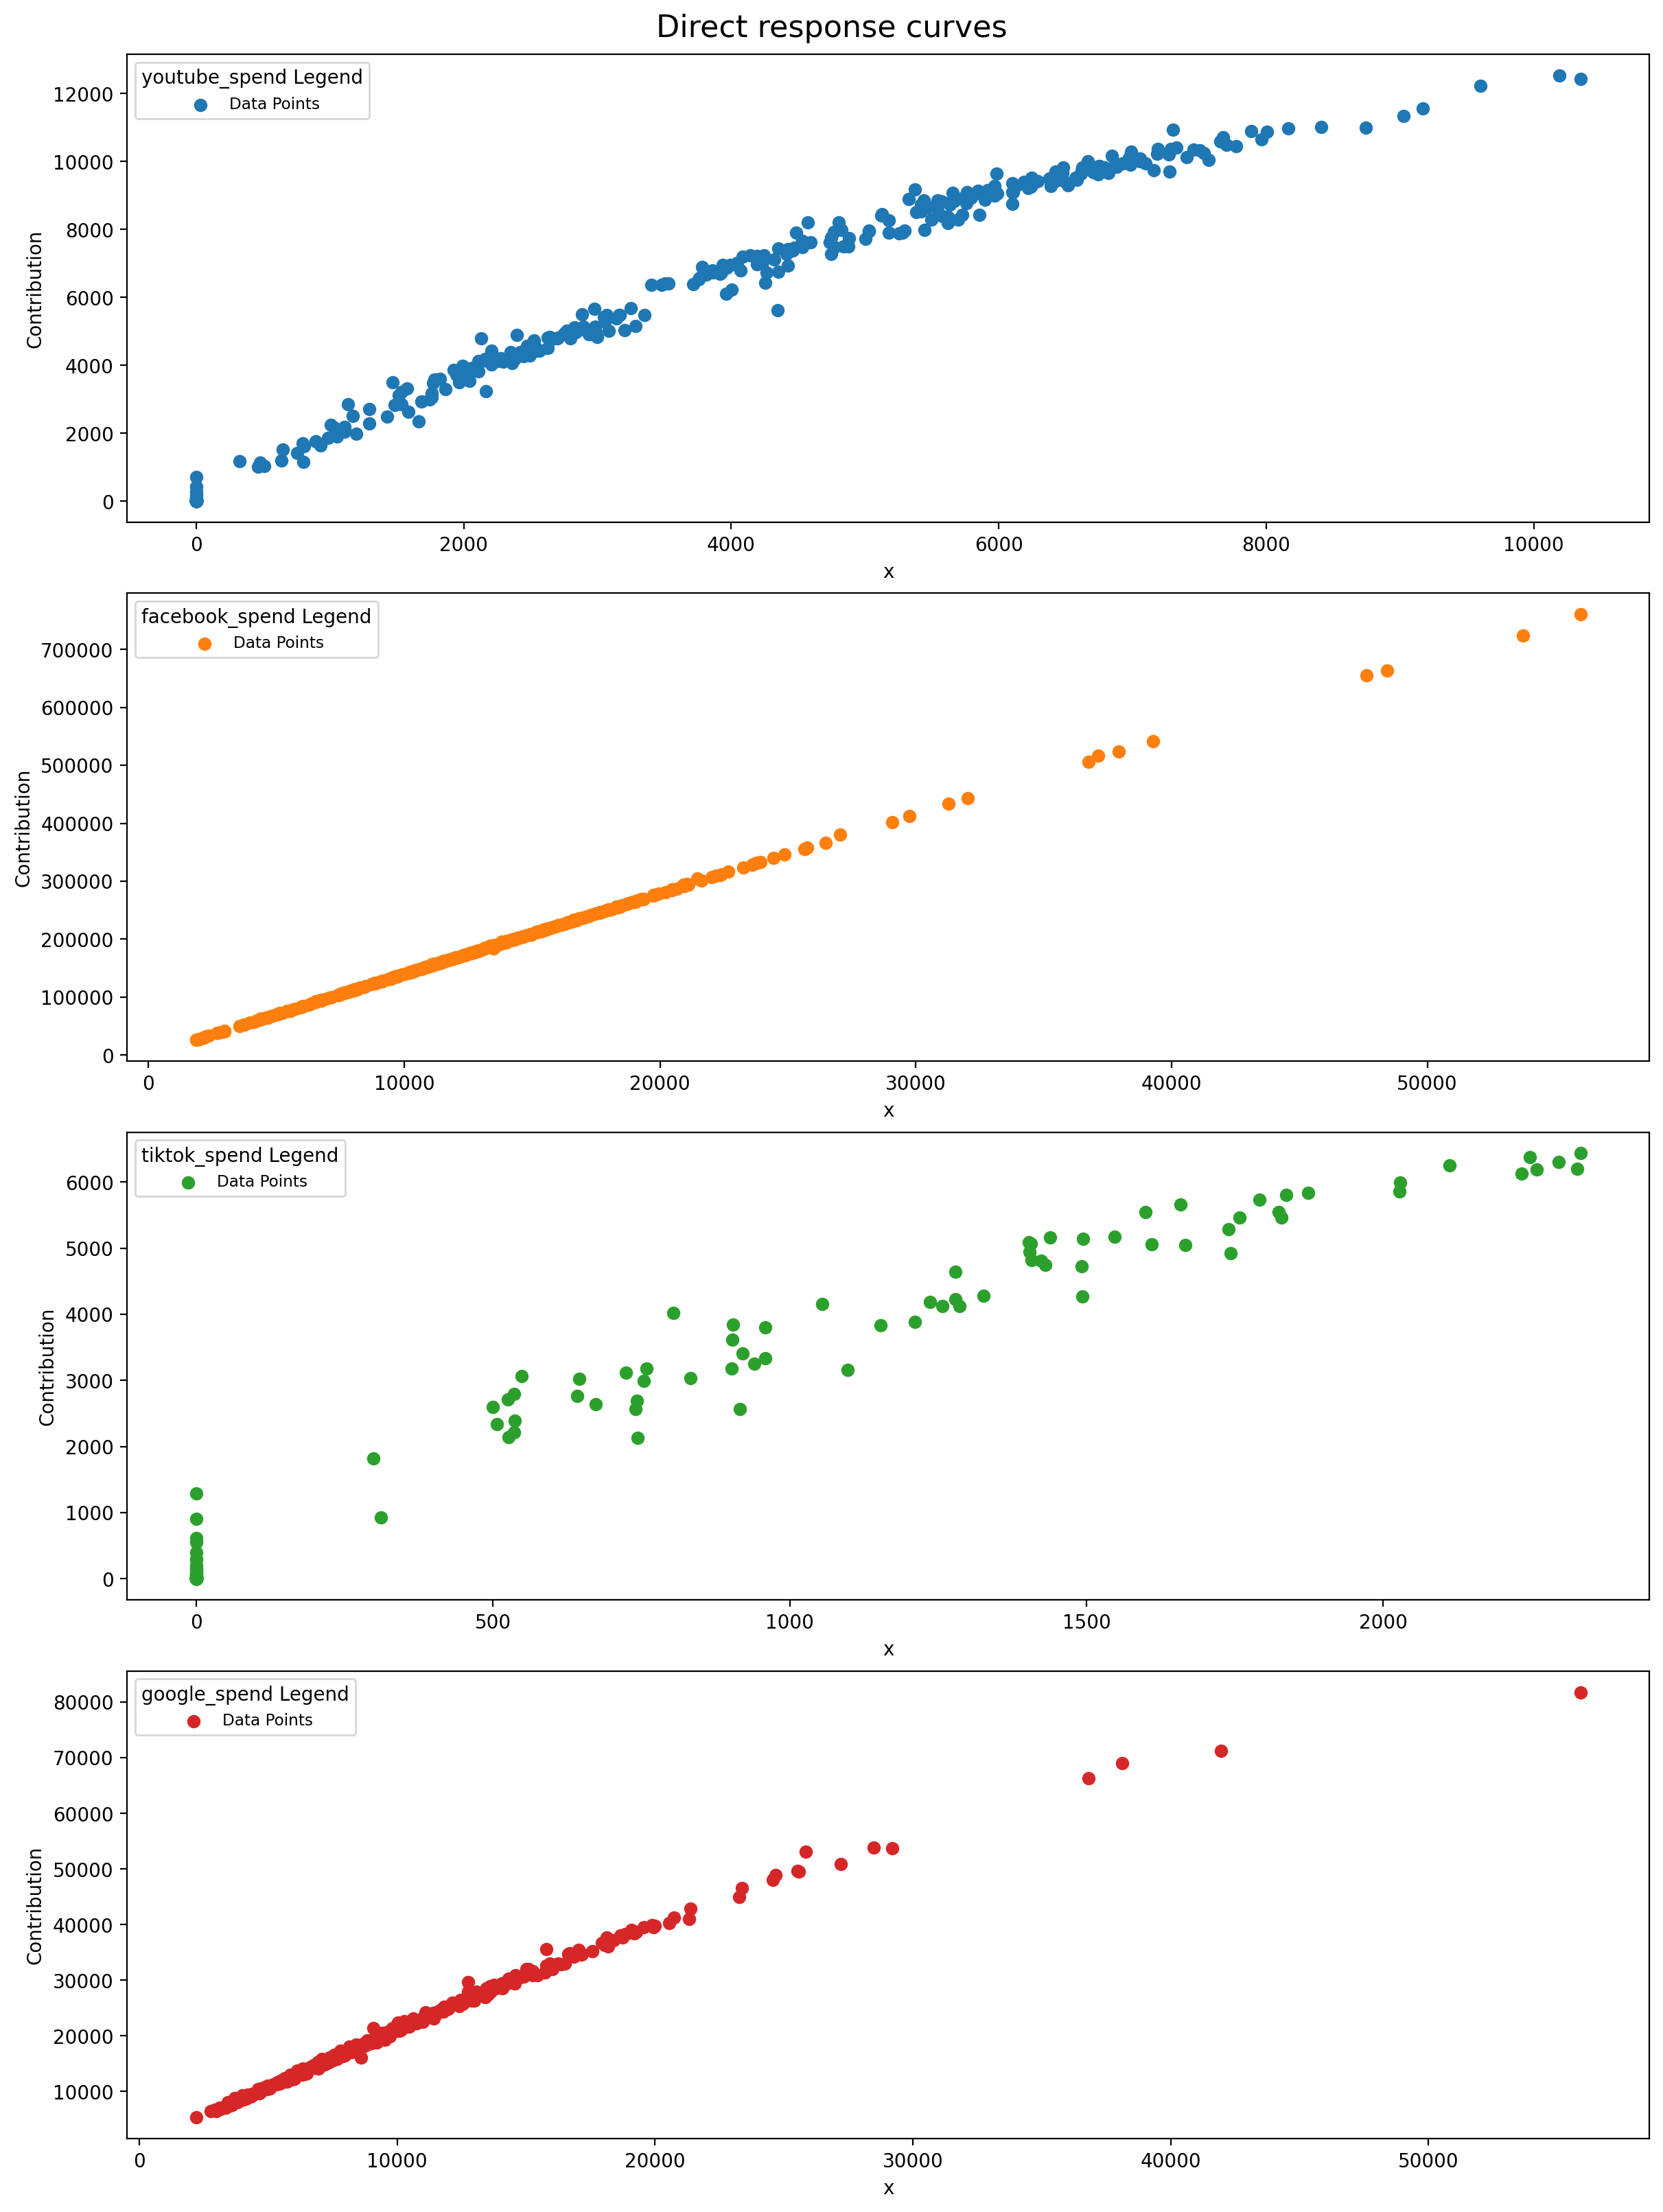

In [547]:
fig = mmm.plot_direct_contribution_curves()
[ax.set(xlabel="x") for ax in fig.axes];

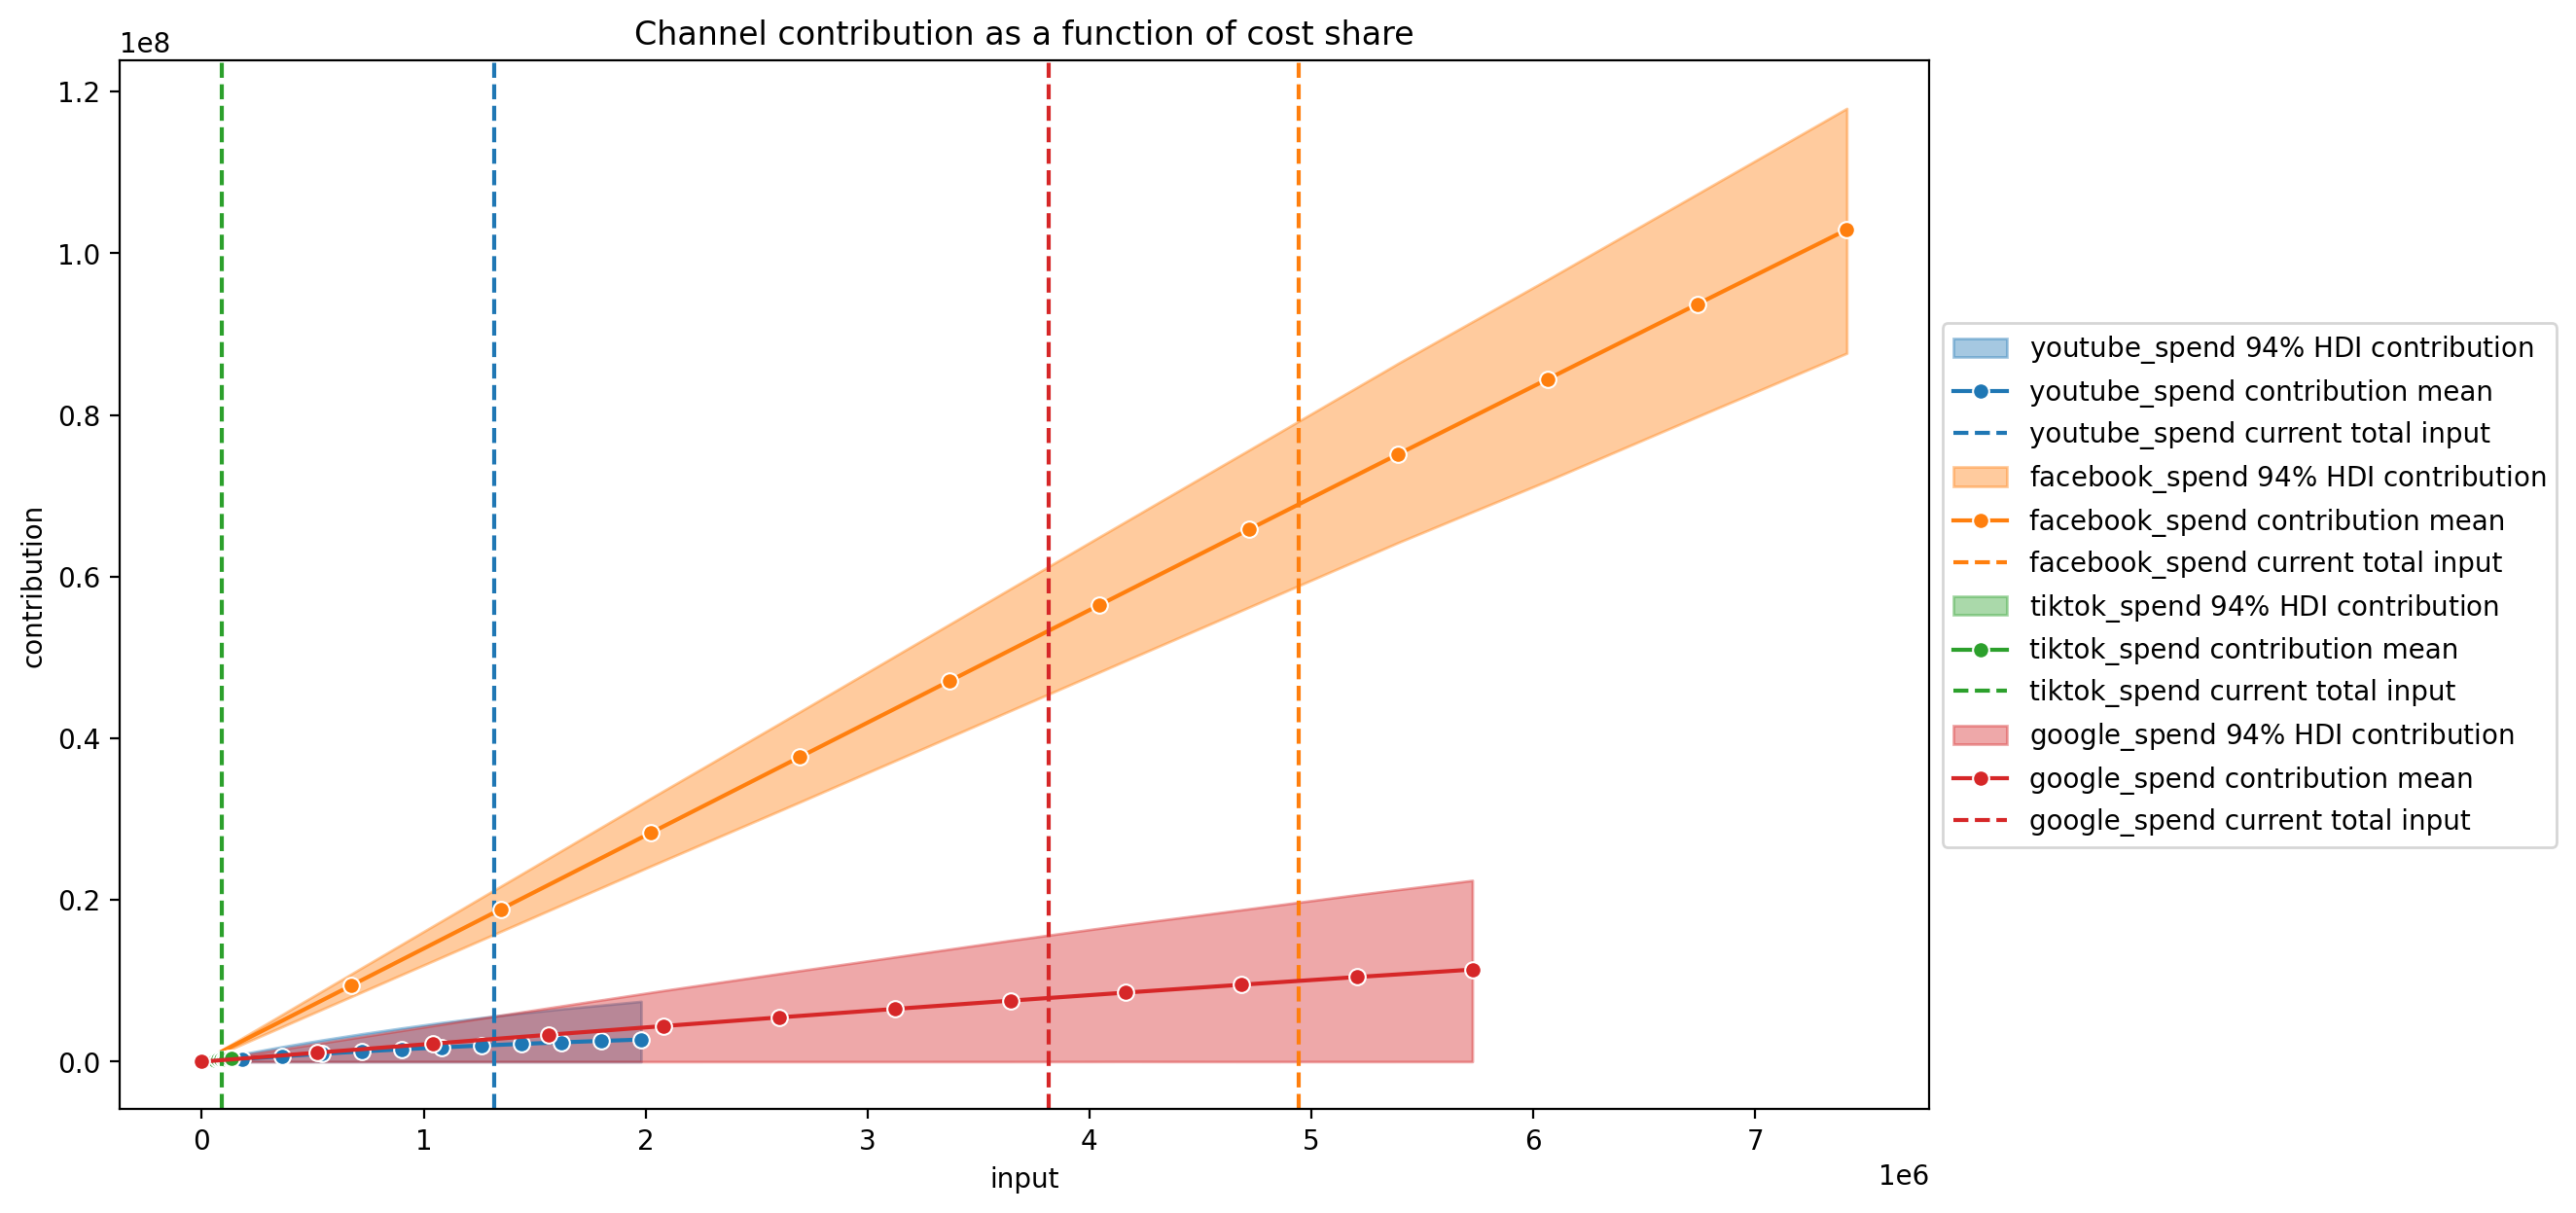

In [509]:
mmm.plot_channel_contributions_grid(start=0, stop=1.5, num=12, absolute_xrange=True);

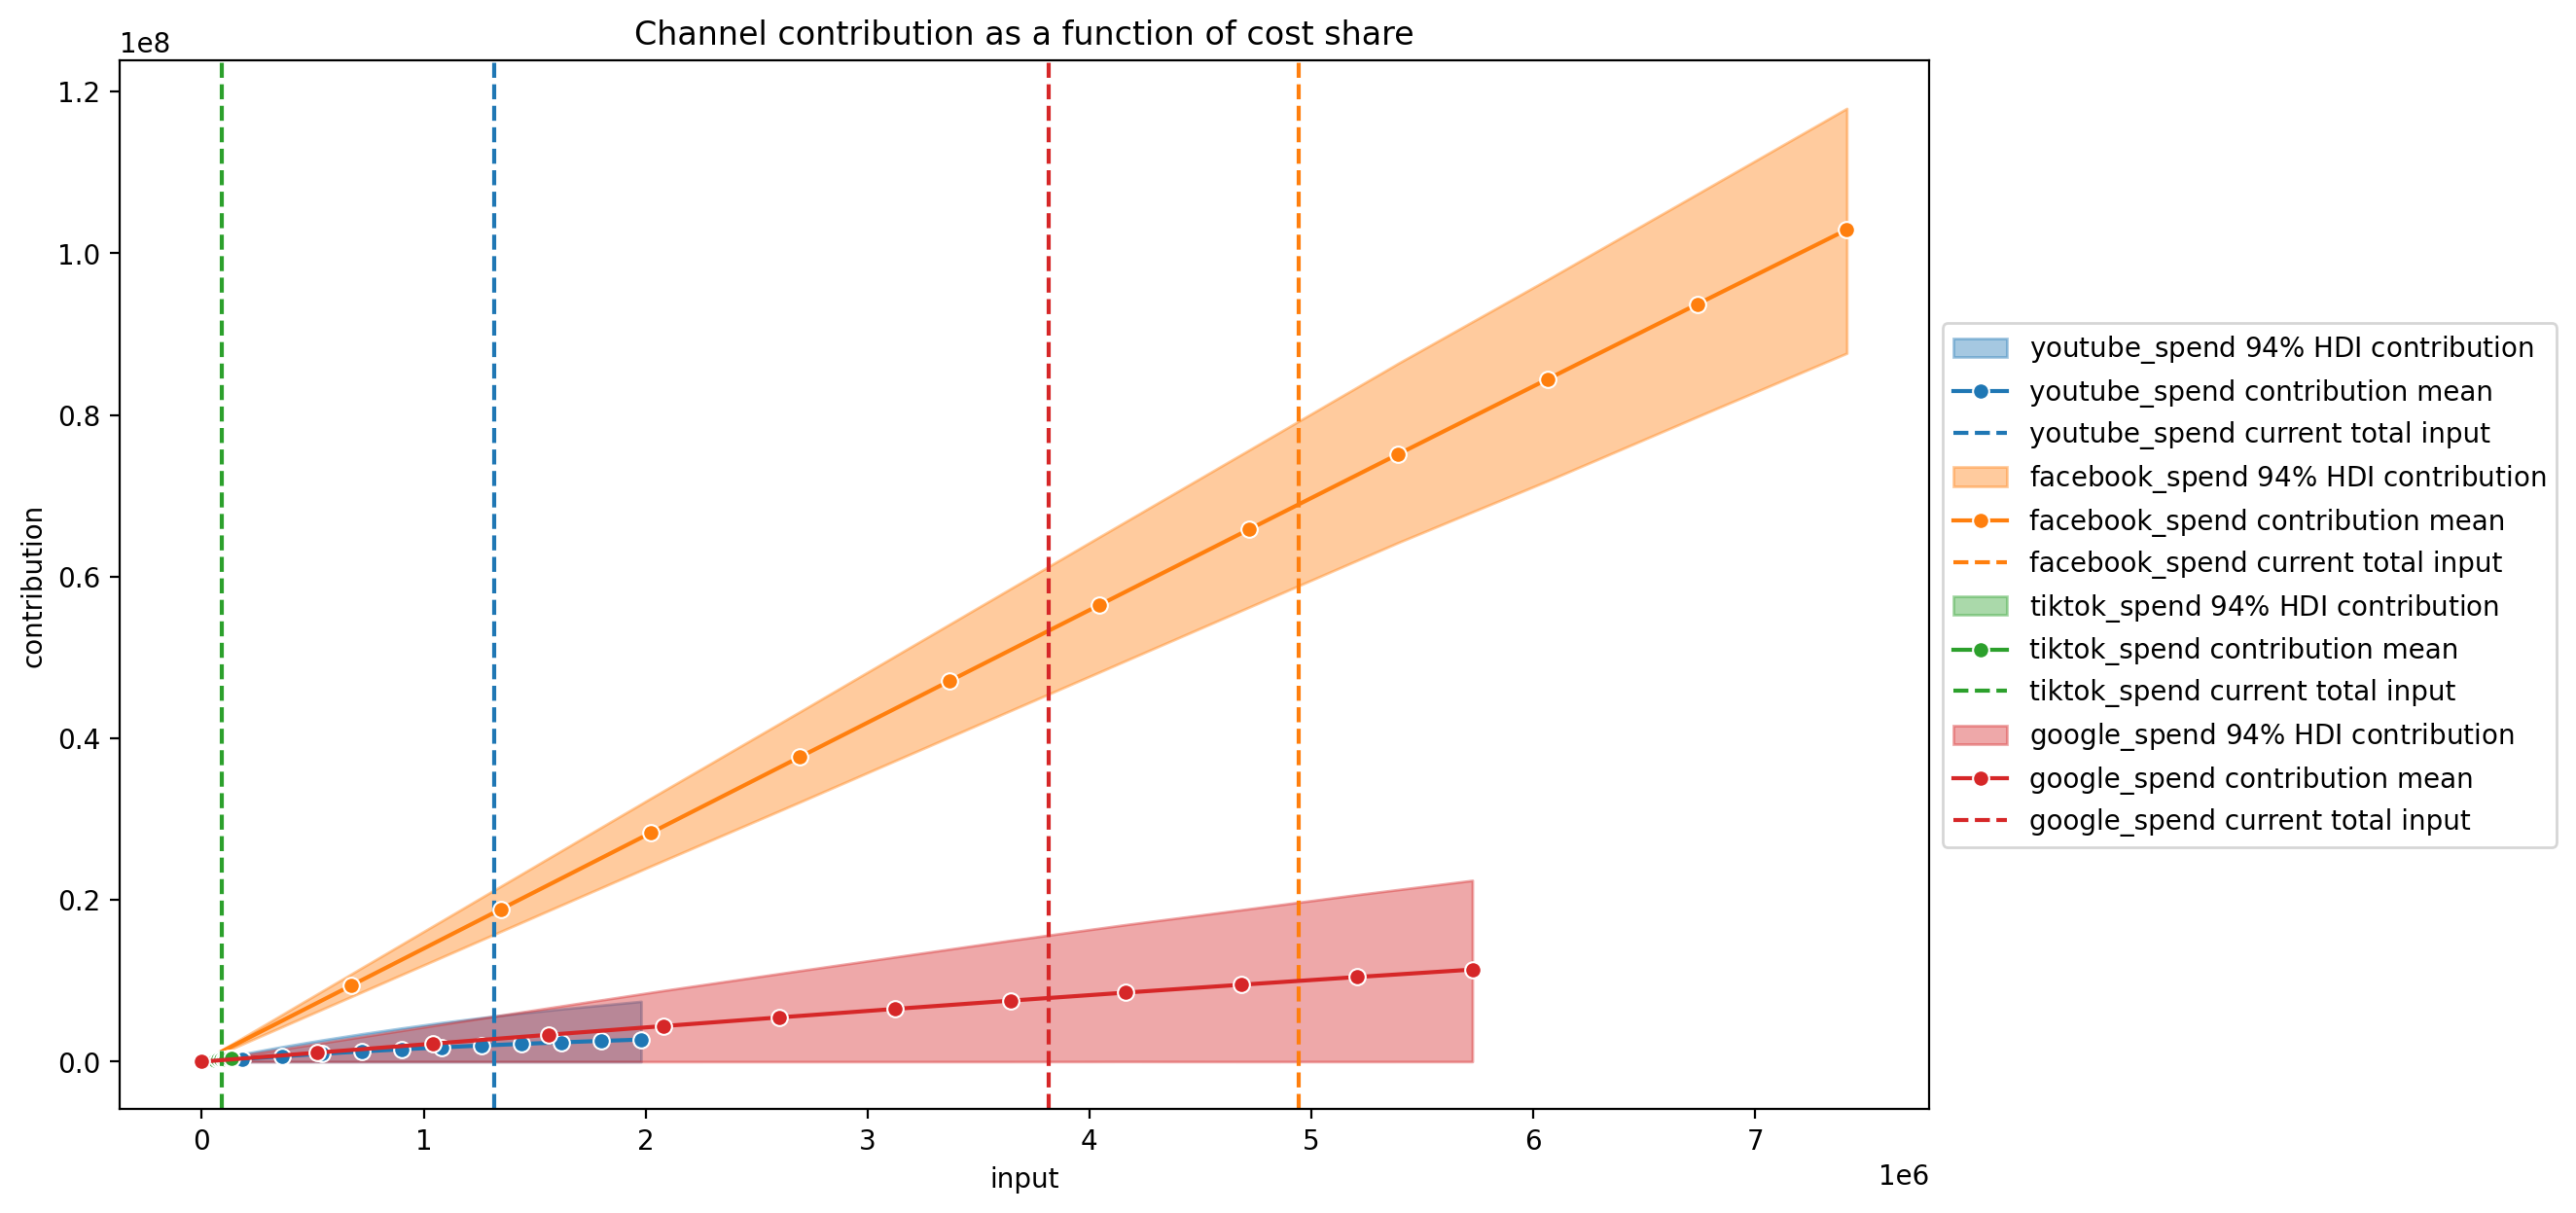

In [549]:
mmm.plot_channel_contributions_grid(start=0, stop=1.5, num=12, absolute_xrange=True);

# B7. Contribution Recovery

KeyError: 'facebook_spend_adstock_saturated'

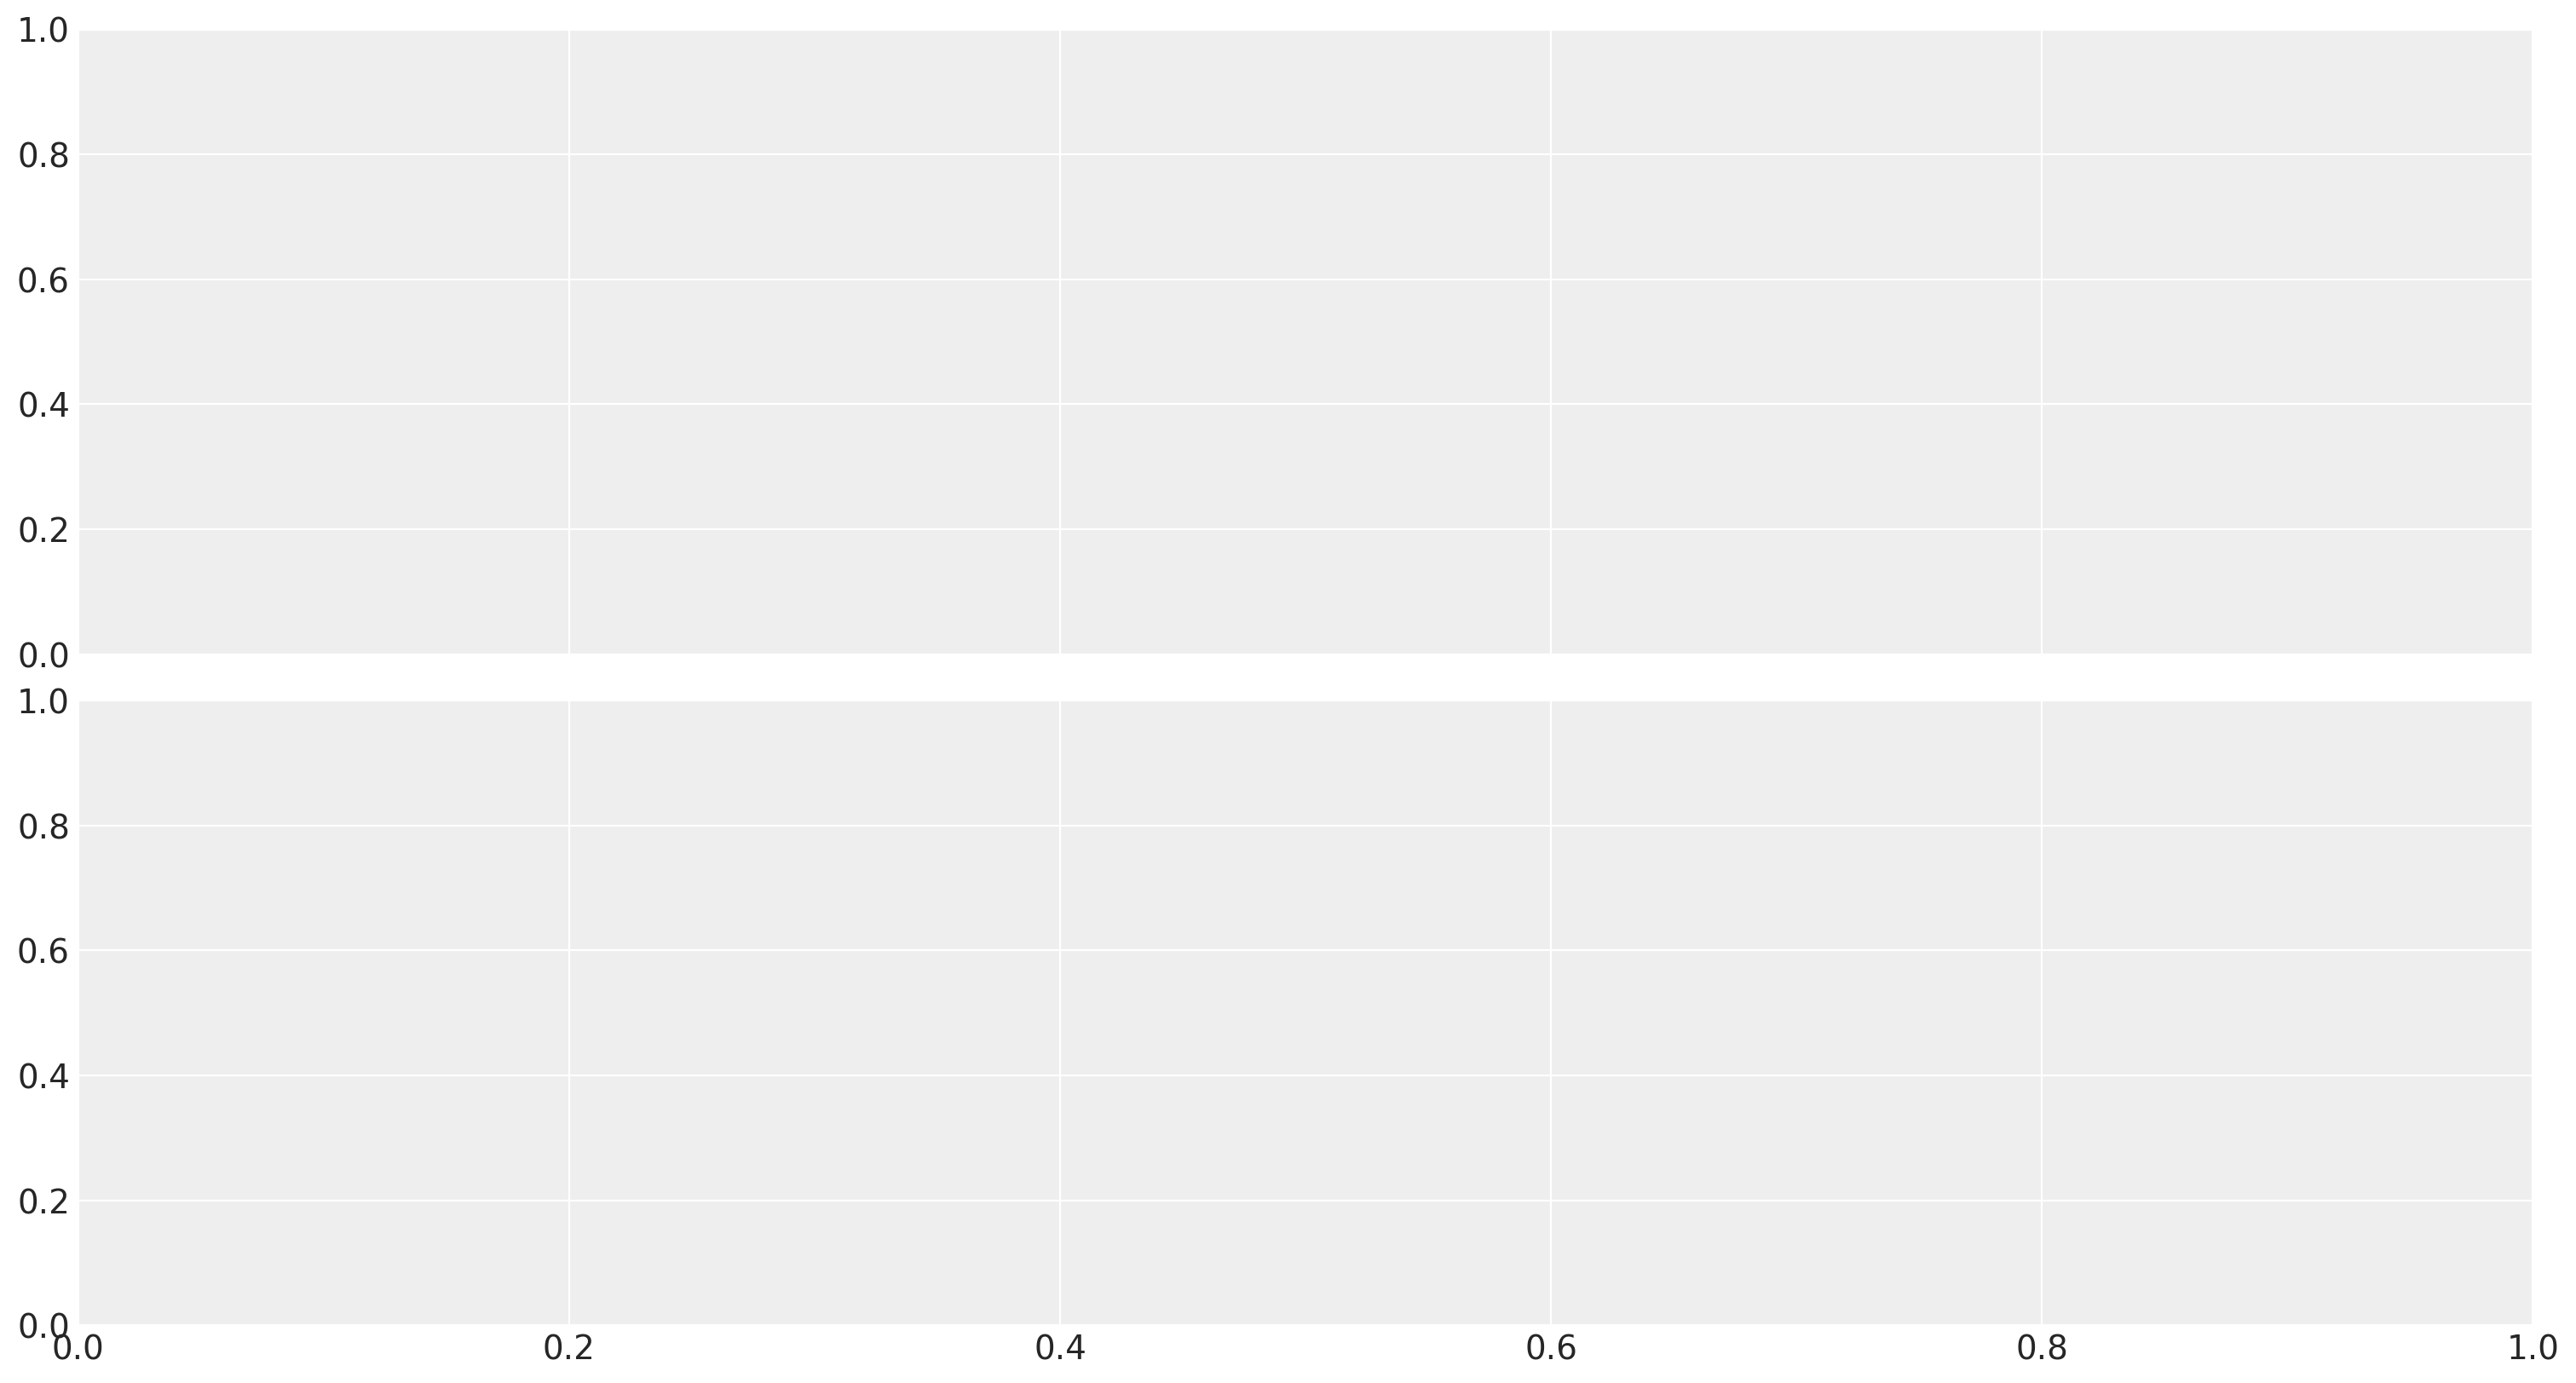

In [700]:
amplitude = 1
betas = [beta_1, beta_2]

channels_contribution_original_scale = mmm.compute_channel_contribution_original_scale()
channels_contribution_original_scale_hdi = az.hdi(
    ary=channels_contribution_original_scale
)

fig, ax = plt.subplots(
    nrows=2, figsize=(15, 8), ncols=1, sharex=True, sharey=False, layout="constrained"
)

for i, x in enumerate(['facebook_spend', 'youtube_spend', 'tiktok_spend', 'google_spend']):
    # Estimate true contribution in the original scale from the data generating process
    sns.lineplot(
        x=df["date"],
        y=amplitude * betas[i] * df[f"{x}_adstock_saturated"],
        color="black",
        label=f"{x} true contribution",
        ax=ax[i],
    )
    # HDI estimated contribution in the original scale
    ax[i].fill_between(
        x=df["date"],
        y1=channels_contribution_original_scale_hdi.sel(channel=x)["x"][:, 0],
        y2=channels_contribution_original_scale_hdi.sel(channel=x)["x"][:, 1],
        color=f"C{i}",
        label=rf"{x} $94\%$ HDI contribution",
        alpha=0.4,
    )
    # Mean estimated contribution in the original scale
    sns.lineplot(
        x=df["date"],
        y=get_mean_contributions_over_time_df[x].to_numpy(),
        color=f"C{i}",
        label=f"{x} posterior mean contribution",
        alpha=0.8,
        ax=ax[i],
    )
    ax[i].legend(loc="center left", bbox_to_anchor=(1, 0.5))
    ax[i].set(title=f"Channel {x}")

# B8. ROAS

In [561]:
#channel_contribution_original_scale

In [571]:
#spend_sum
#roas_samples

NameError: name 'roas_1' is not defined

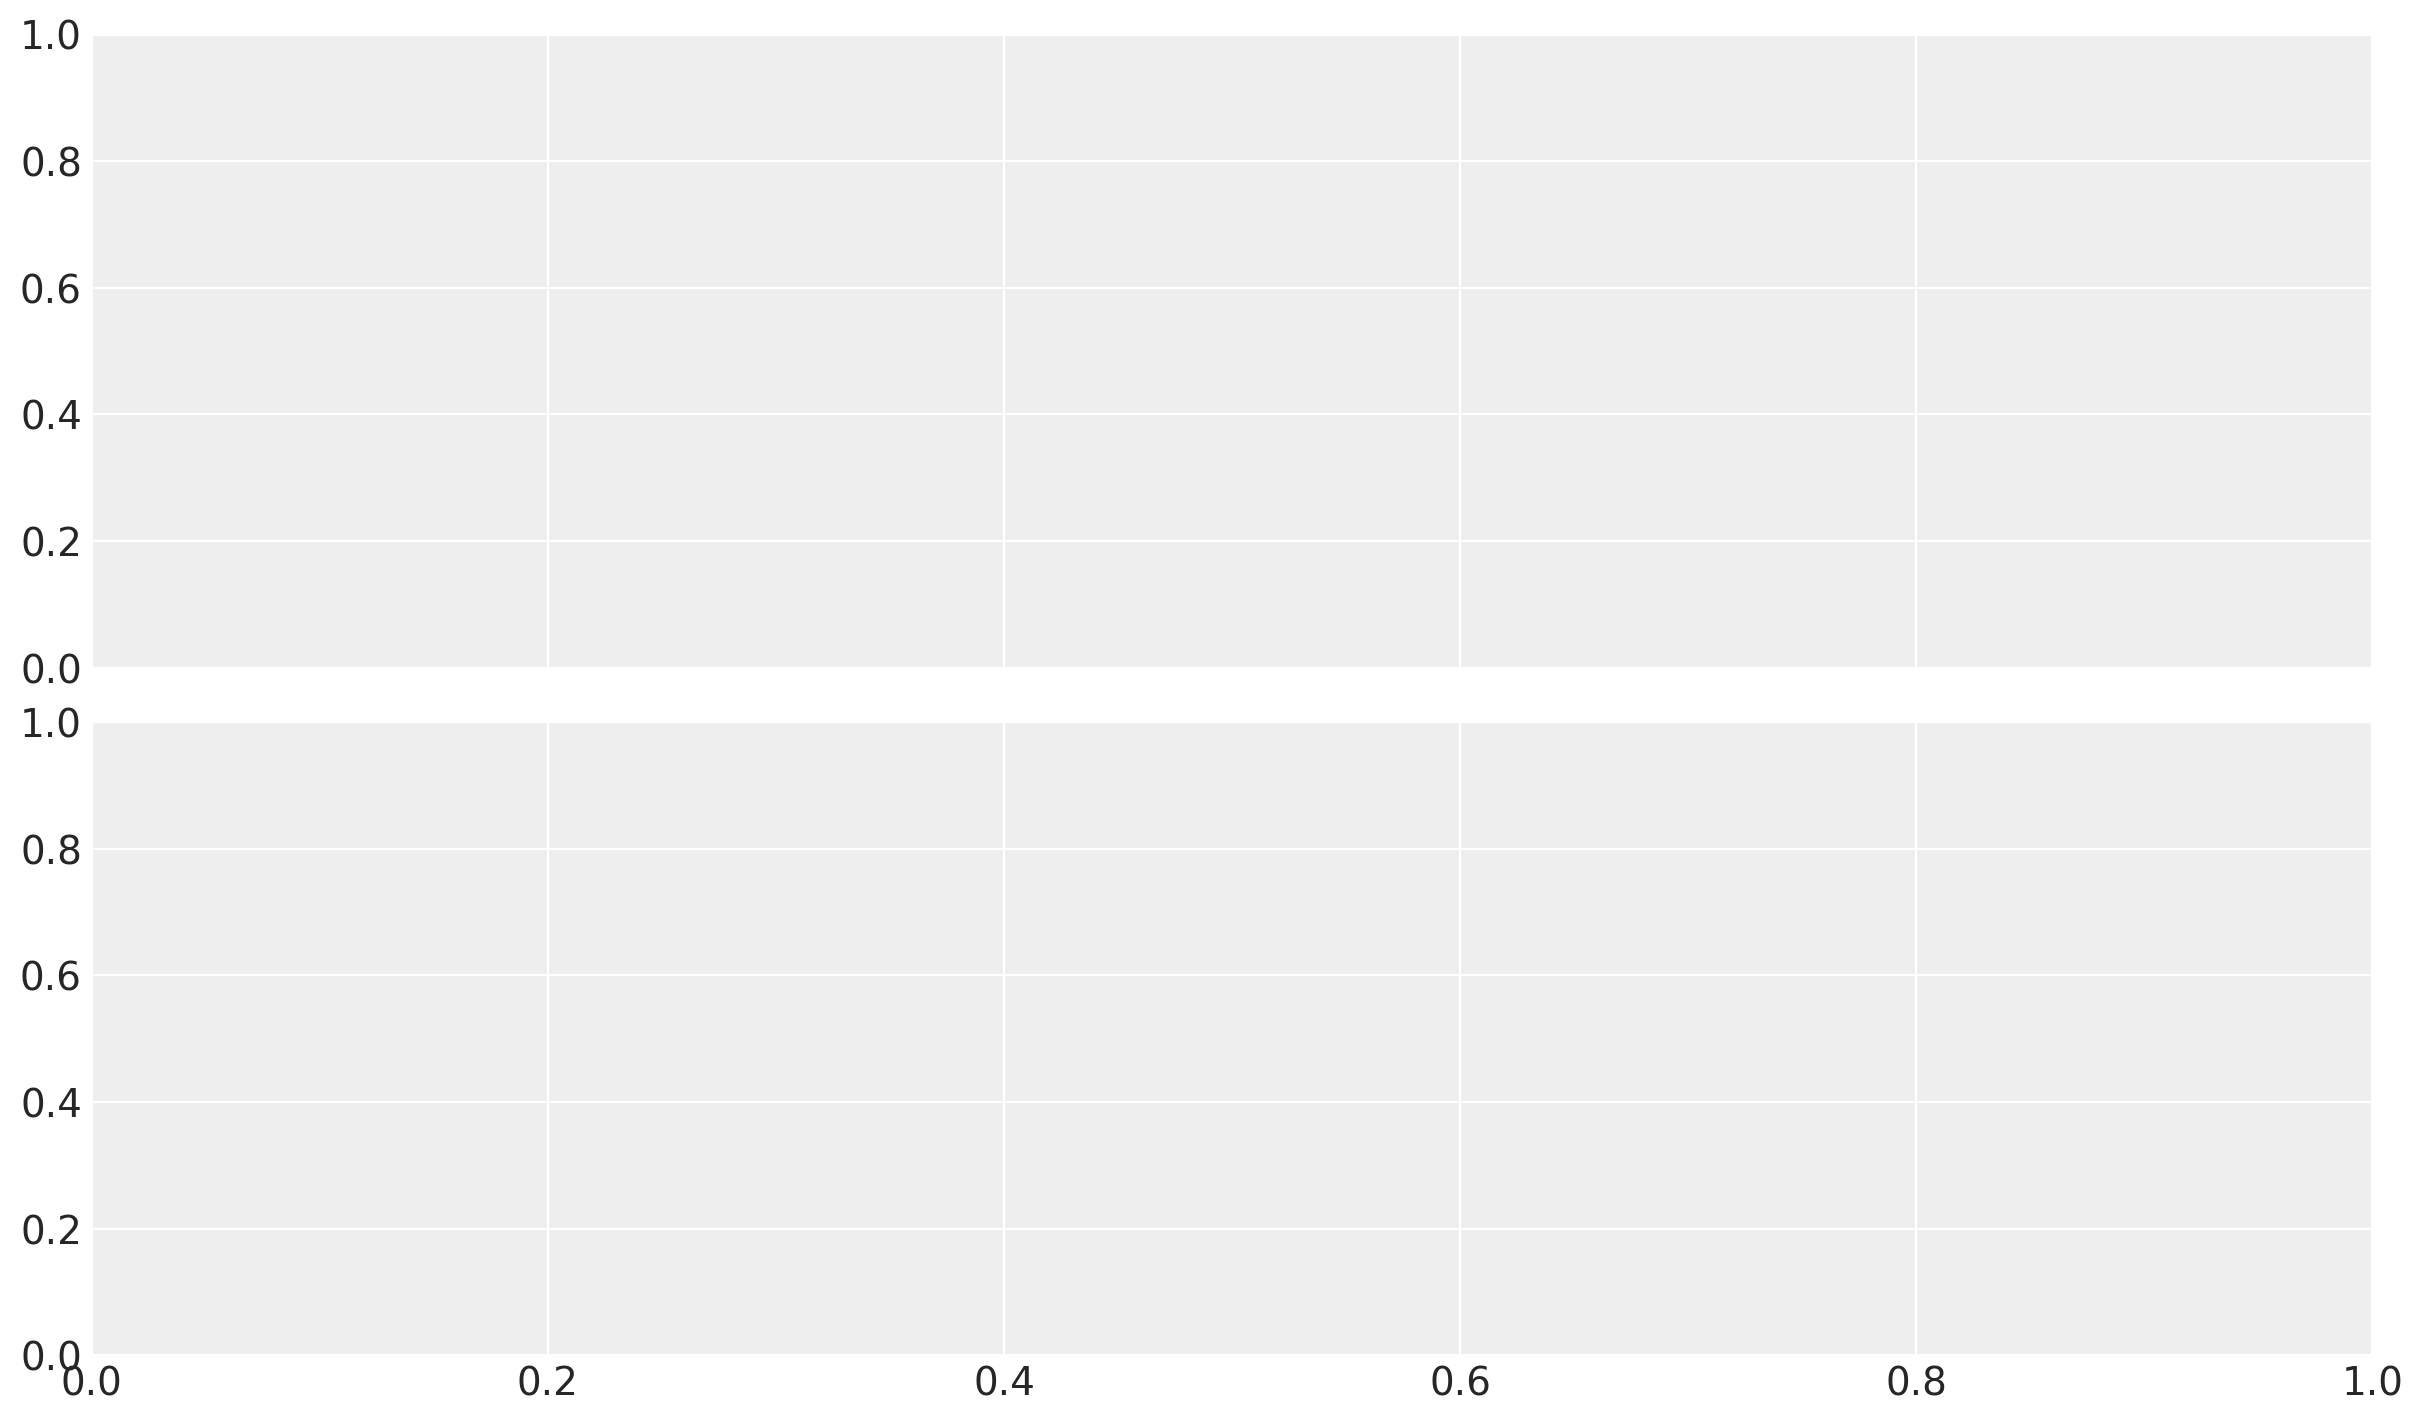

In [664]:
channel_contribution_original_scale = mmm.compute_channel_contribution_original_scale()
spend_sum = X[['facebook_spend', 'youtube_spend', 'tiktok_spend', 'google_spend']].sum().to_numpy()

roas_samples = (
    channel_contribution_original_scale.sum(dim="date")
    / spend_sum[np.newaxis, np.newaxis, :]
)

fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(12, 7), sharex=True, sharey=False, layout="constrained"
)
az.plot_posterior(roas_samples, ref_val=[roas_1, roas_2, roas_3,roas_4], ax=axes)
axes[0].set(title="Channel $x_{1}$")
axes[1].set(title="Channel $x_{2}$", xlabel="ROAS")
axes[2].set(title="Channel $x_{3}$", xlabel="ROAS")
axes[3].set(title="Channel $x_{4}$", xlabel="ROAS")

fig.suptitle("ROAS Posterior Distributions", fontsize=18, fontweight="bold", y=1.06);

# B9. Out of Sample Prediction

In [646]:
last_date = X["date"].max()

# New dates starting from last in dataset
n_new = 120
new_dates = pd.date_range(start=last_date, periods=1 + n_new, freq="D")[1:]

X_out_of_sample = pd.DataFrame(
    {
        "date": new_dates,
    }
)

# Same channel spends as last day
X_out_of_sample["facebook_spend"] = X["facebook_spend"].iloc[-1]
X_out_of_sample["youtube_spend"] = X["youtube_spend"].iloc[-1]
X_out_of_sample["tiktok_spend"] = X["tiktok_spend"].iloc[-1]
X_out_of_sample["google_spend"] = X["google_spend"].iloc[-1]


# Other features
X_out_of_sample["subs_launch"] = 0
X_out_of_sample["pod3_summer_refresh"] = 0
X_out_of_sample["pod3_launch"] = 0


X_out_of_sample["t"] = range(len(X), len(X) + n_new)

X_out_of_sample

date  facebook_spend  youtube_spend  tiktok_spend  google_spend  \
0   2023-09-01    16746.969999     2794.92858           0.0  15260.520939   
1   2023-09-02    16746.969999     2794.92858           0.0  15260.520939   
2   2023-09-03    16746.969999     2794.92858           0.0  15260.520939   
3   2023-09-04    16746.969999     2794.92858           0.0  15260.520939   
4   2023-09-05    16746.969999     2794.92858           0.0  15260.520939   
..         ...             ...            ...           ...           ...   
115 2023-12-25    16746.969999     2794.92858           0.0  15260.520939   
116 2023-12-26    16746.969999     2794.92858           0.0  15260.520939   
117 2023-12-27    16746.969999     2794.92858           0.0  15260.520939   
118 2023-12-28    16746.969999     2794.92858           0.0  15260.520939   
119 2023-12-29    16746.969999     2794.92858           0.0  15260.520939   

     subs_launch  pod3_summer_refresh  pod3_launch    t  
0              0                    0            0  365  
1              0                    0            0  366  
2              0                    0            0  367  
3              0                    0            0  368  
4              0                    0            0  369  
..           ...                  ...          ...  ...  
115            0                    0            0  480  
116            0                    0            0  481  
117            0                    0            0  482  
118            0                    0            0  483  
119            0                    0            0  484  

[120 rows x 9 columns]

In [648]:
X_out_of_sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 120 non-null    datetime64[ns]
 1   facebook_spend       120 non-null    float64       
 2   youtube_spend        120 non-null    float64       
 3   tiktok_spend         120 non-null    float64       
 4   google_spend         120 non-null    float64       
 5   subs_launch          120 non-null    int64         
 6   pod3_summer_refresh  120 non-null    int64         
 7   pod3_launch          120 non-null    int64         
 8   t                    120 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 8.6 KB


In [650]:
y_out_of_sample = mmm.sample_posterior_predictive(
    X_pred=X_out_of_sample, extend_idata=False
)

y_out_of_sample

Output()

<xarray.Dataset> Size: 4MB
Dimensions:  (sample: 4000, date: 120)
Coordinates:
  * date     (date) datetime64[ns] 960B 2023-09-01 2023-09-02 ... 2023-12-29
  * sample   (sample) object 32kB MultiIndex
  * chain    (sample) int64 32kB 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 32kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    y        (date, sample) float64 4MB 2.977e+05 4.172e+05 ... 4.008e+05
Attributes:
    created_at:                 2024-10-21T23:51:02.945361+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.15.1

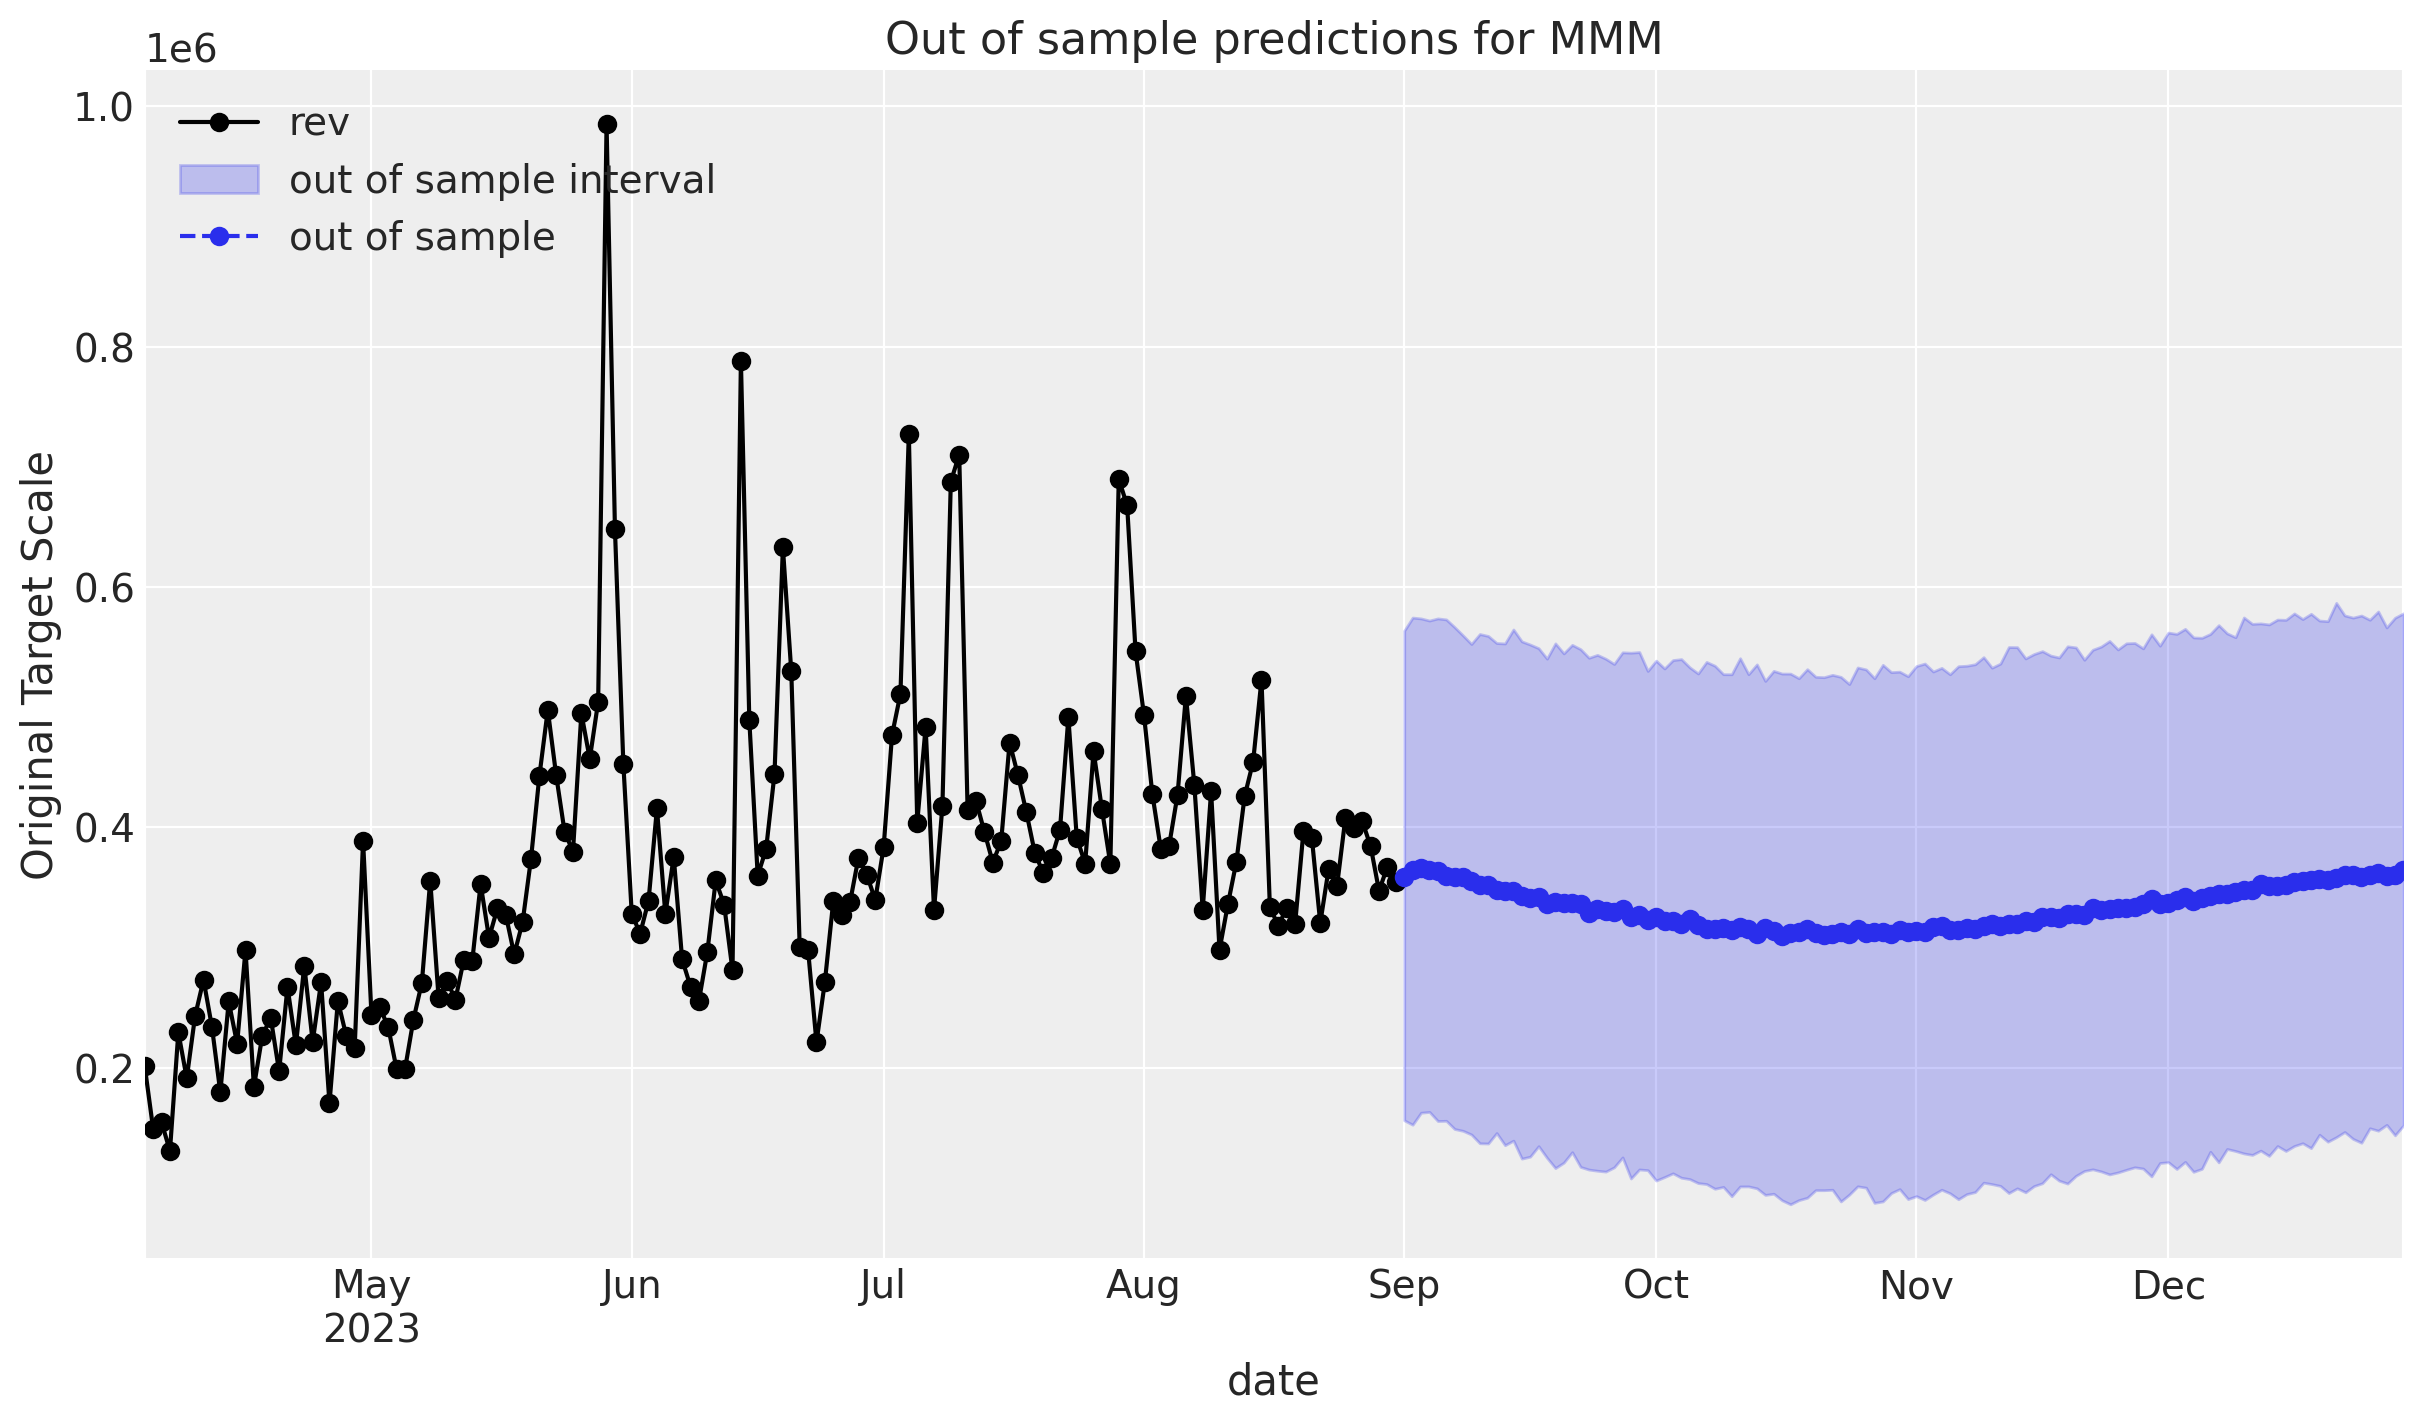

In [658]:
def plot_in_sample(X, y, ax, n_points: int = 150):
    (
        y.to_frame()
        .set_index(X["date"])
        .iloc[-n_points:]
        .plot(ax=ax, marker="o", color="black", label="actuals")
    )
    return ax


def plot_out_of_sample(X_out_of_sample, y_out_of_sample, ax, color, label):
    y_out_of_sample_groupby = y_out_of_sample["y"].to_series().groupby("date")

    lower, upper = quantiles = [0.025, 0.975]
    conf = y_out_of_sample_groupby.quantile(quantiles).unstack()
    ax.fill_between(
        X_out_of_sample["date"].dt.to_pydatetime(),
        conf[lower],
        conf[upper],
        alpha=0.25,
        color=color,
        label=f"{label} interval",
    )

    mean = y_out_of_sample_groupby.mean()
    mean.plot(ax=ax, marker="o", label=label, color=color, linestyle="--")
    ax.set(ylabel="Original Target Scale", title="Out of sample predictions for MMM")
    return ax


_, ax = plt.subplots()
plot_in_sample(X, y, ax=ax)
plot_out_of_sample(
    X_out_of_sample, y_out_of_sample, ax=ax, label="out of sample", color="C0"
)
ax.legend(loc="upper left");

In [660]:
y_out_of_sample_with_adstock = mmm.sample_posterior_predictive(
    X_pred=X_out_of_sample, extend_idata=False, include_last_observations=True
)

Output()

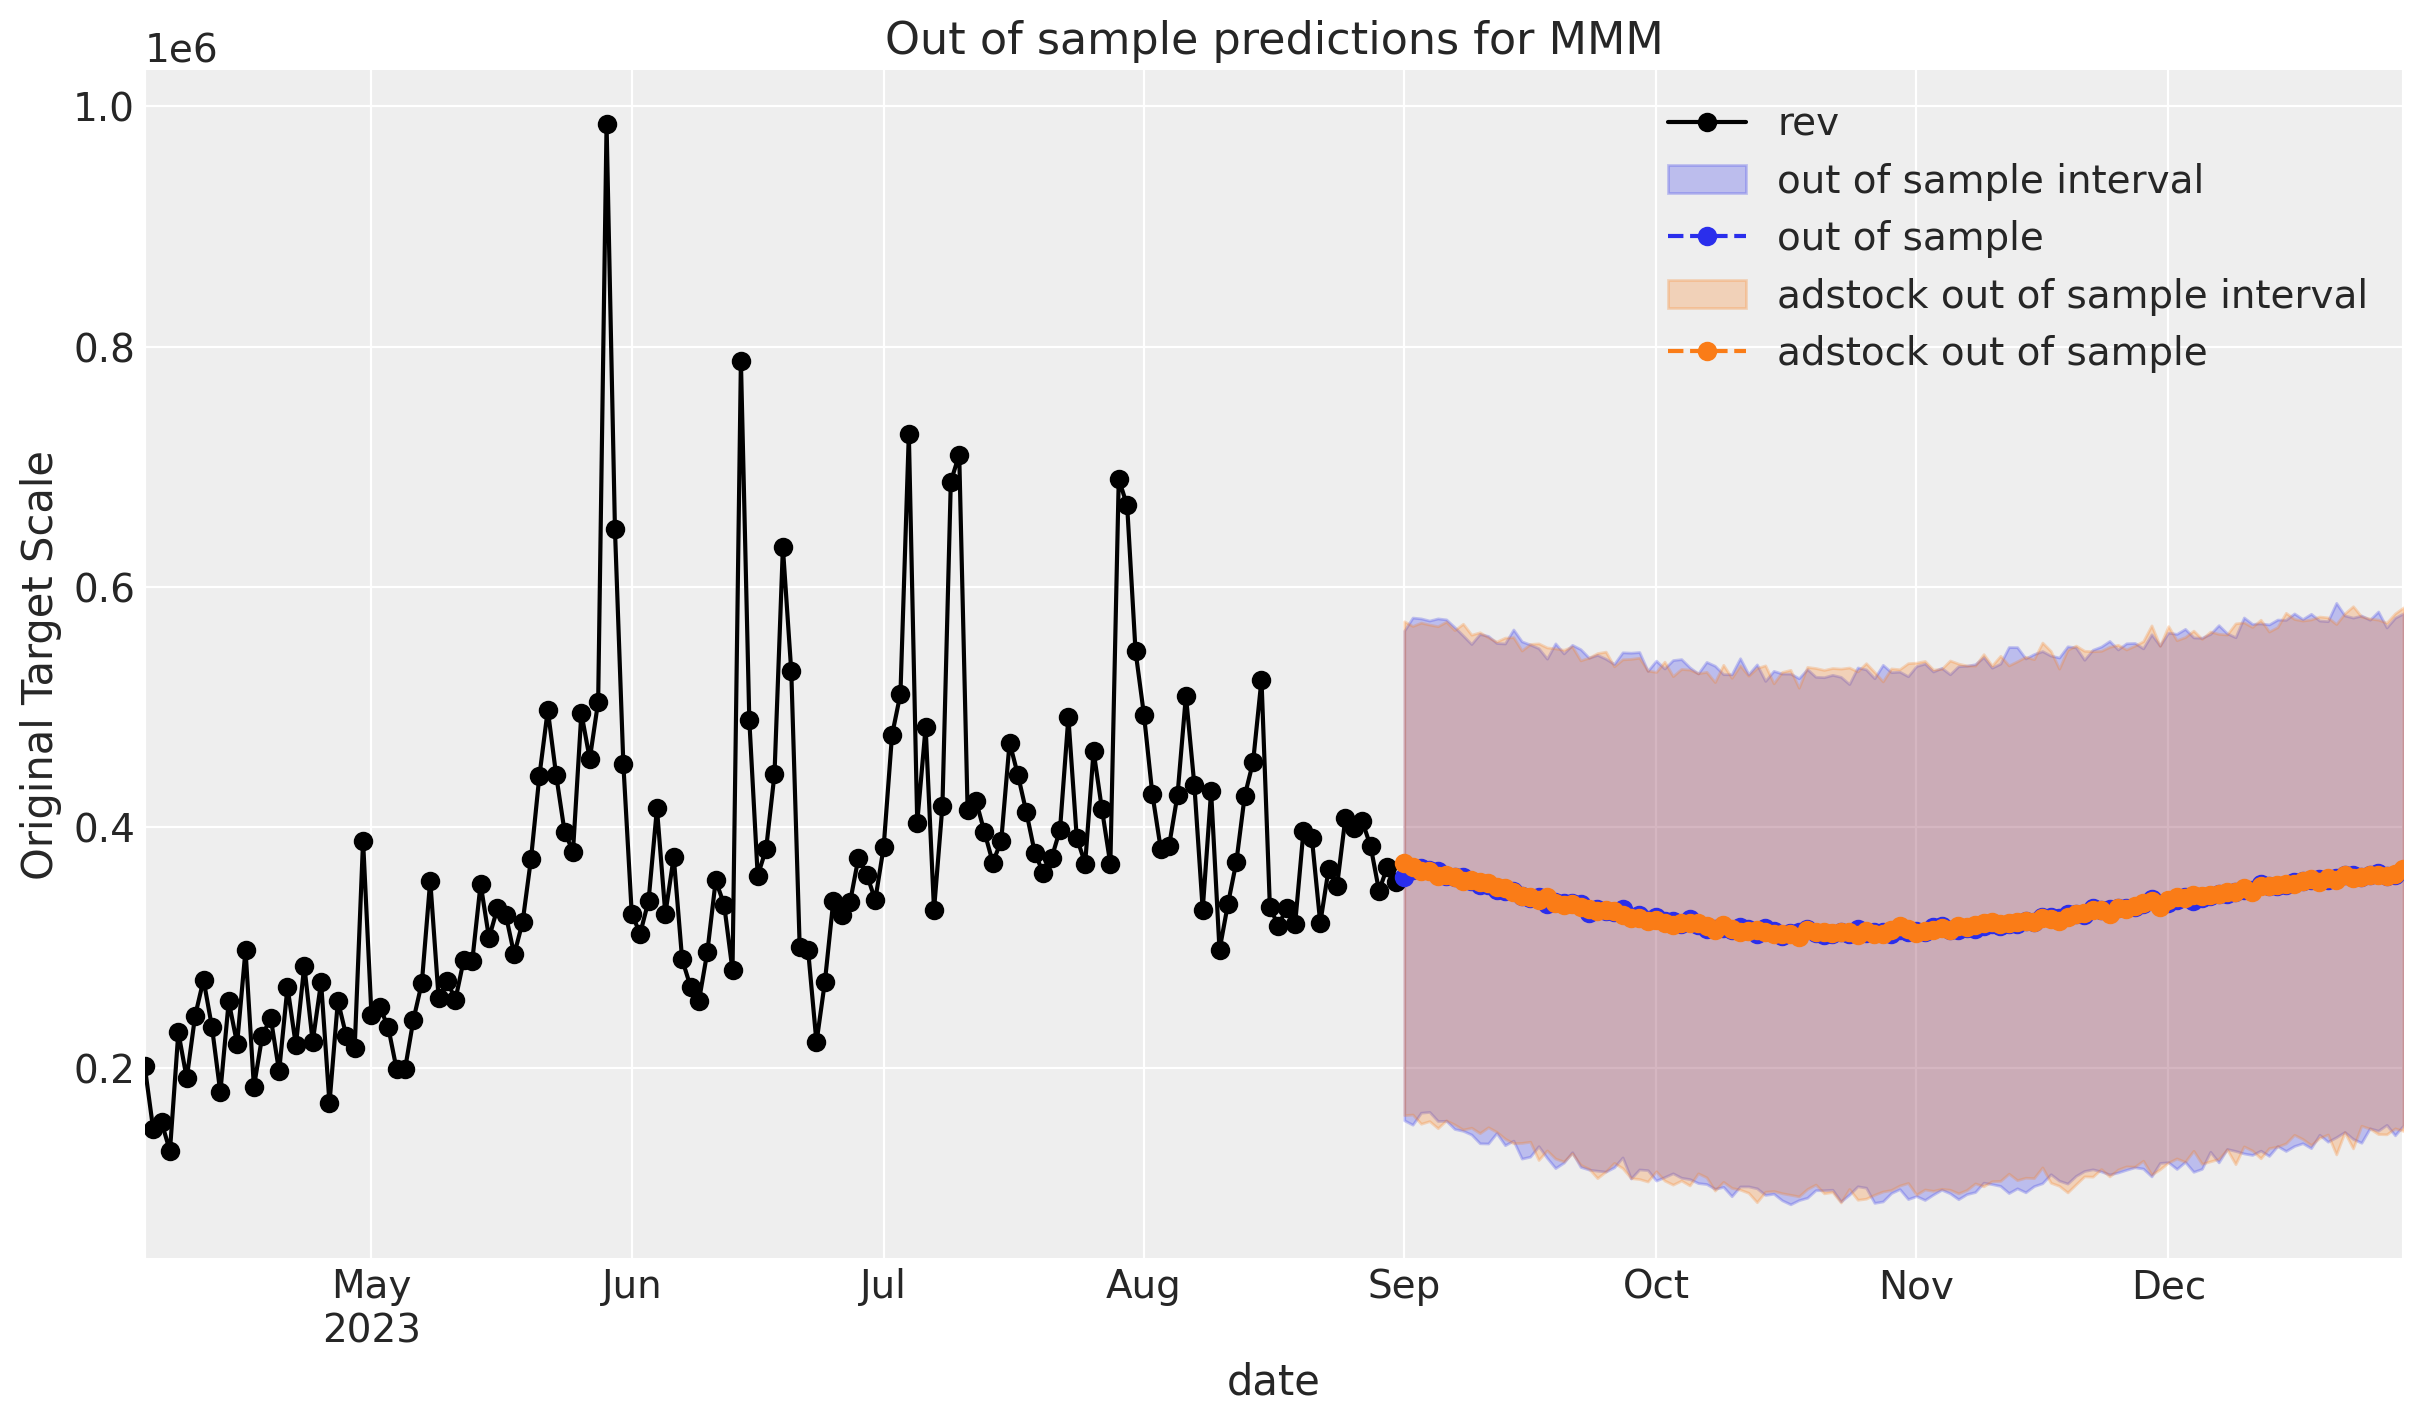

In [661]:
_, ax = plt.subplots()
plot_in_sample(X, y, ax=ax)
plot_out_of_sample(
    X_out_of_sample, y_out_of_sample, ax=ax, label="out of sample", color="C0"
)
plot_out_of_sample(
    X_out_of_sample,
    y_out_of_sample_with_adstock,
    ax=ax,
    label="adstock out of sample",
    color="C1",
)
ax.legend();

# B10. Save Model and Budgeting

In [577]:
mmm.save("model.nc")

In [581]:
!pip install watermark

In [583]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pymc_marketing,pytensor

Last updated: Mon Oct 21 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.20.0

pymc_marketing: 0.10.0
pytensor      : 2.22.1

matplotlib    : 3.6.1
pandas        : 2.1.4
pymc_marketing: 0.10.0
numpy         : 1.26.4
seaborn       : 0.11.1
pymc          : 5.15.1
json          : 2.0.9
arviz         : 0.20.0

Watermark: 2.5.0



# 9. Budget Allocation

In [575]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pymc_marketing.mmm import MMM

warnings.filterwarnings("ignore")

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [586]:
mmm = MMM.load("model.nc")

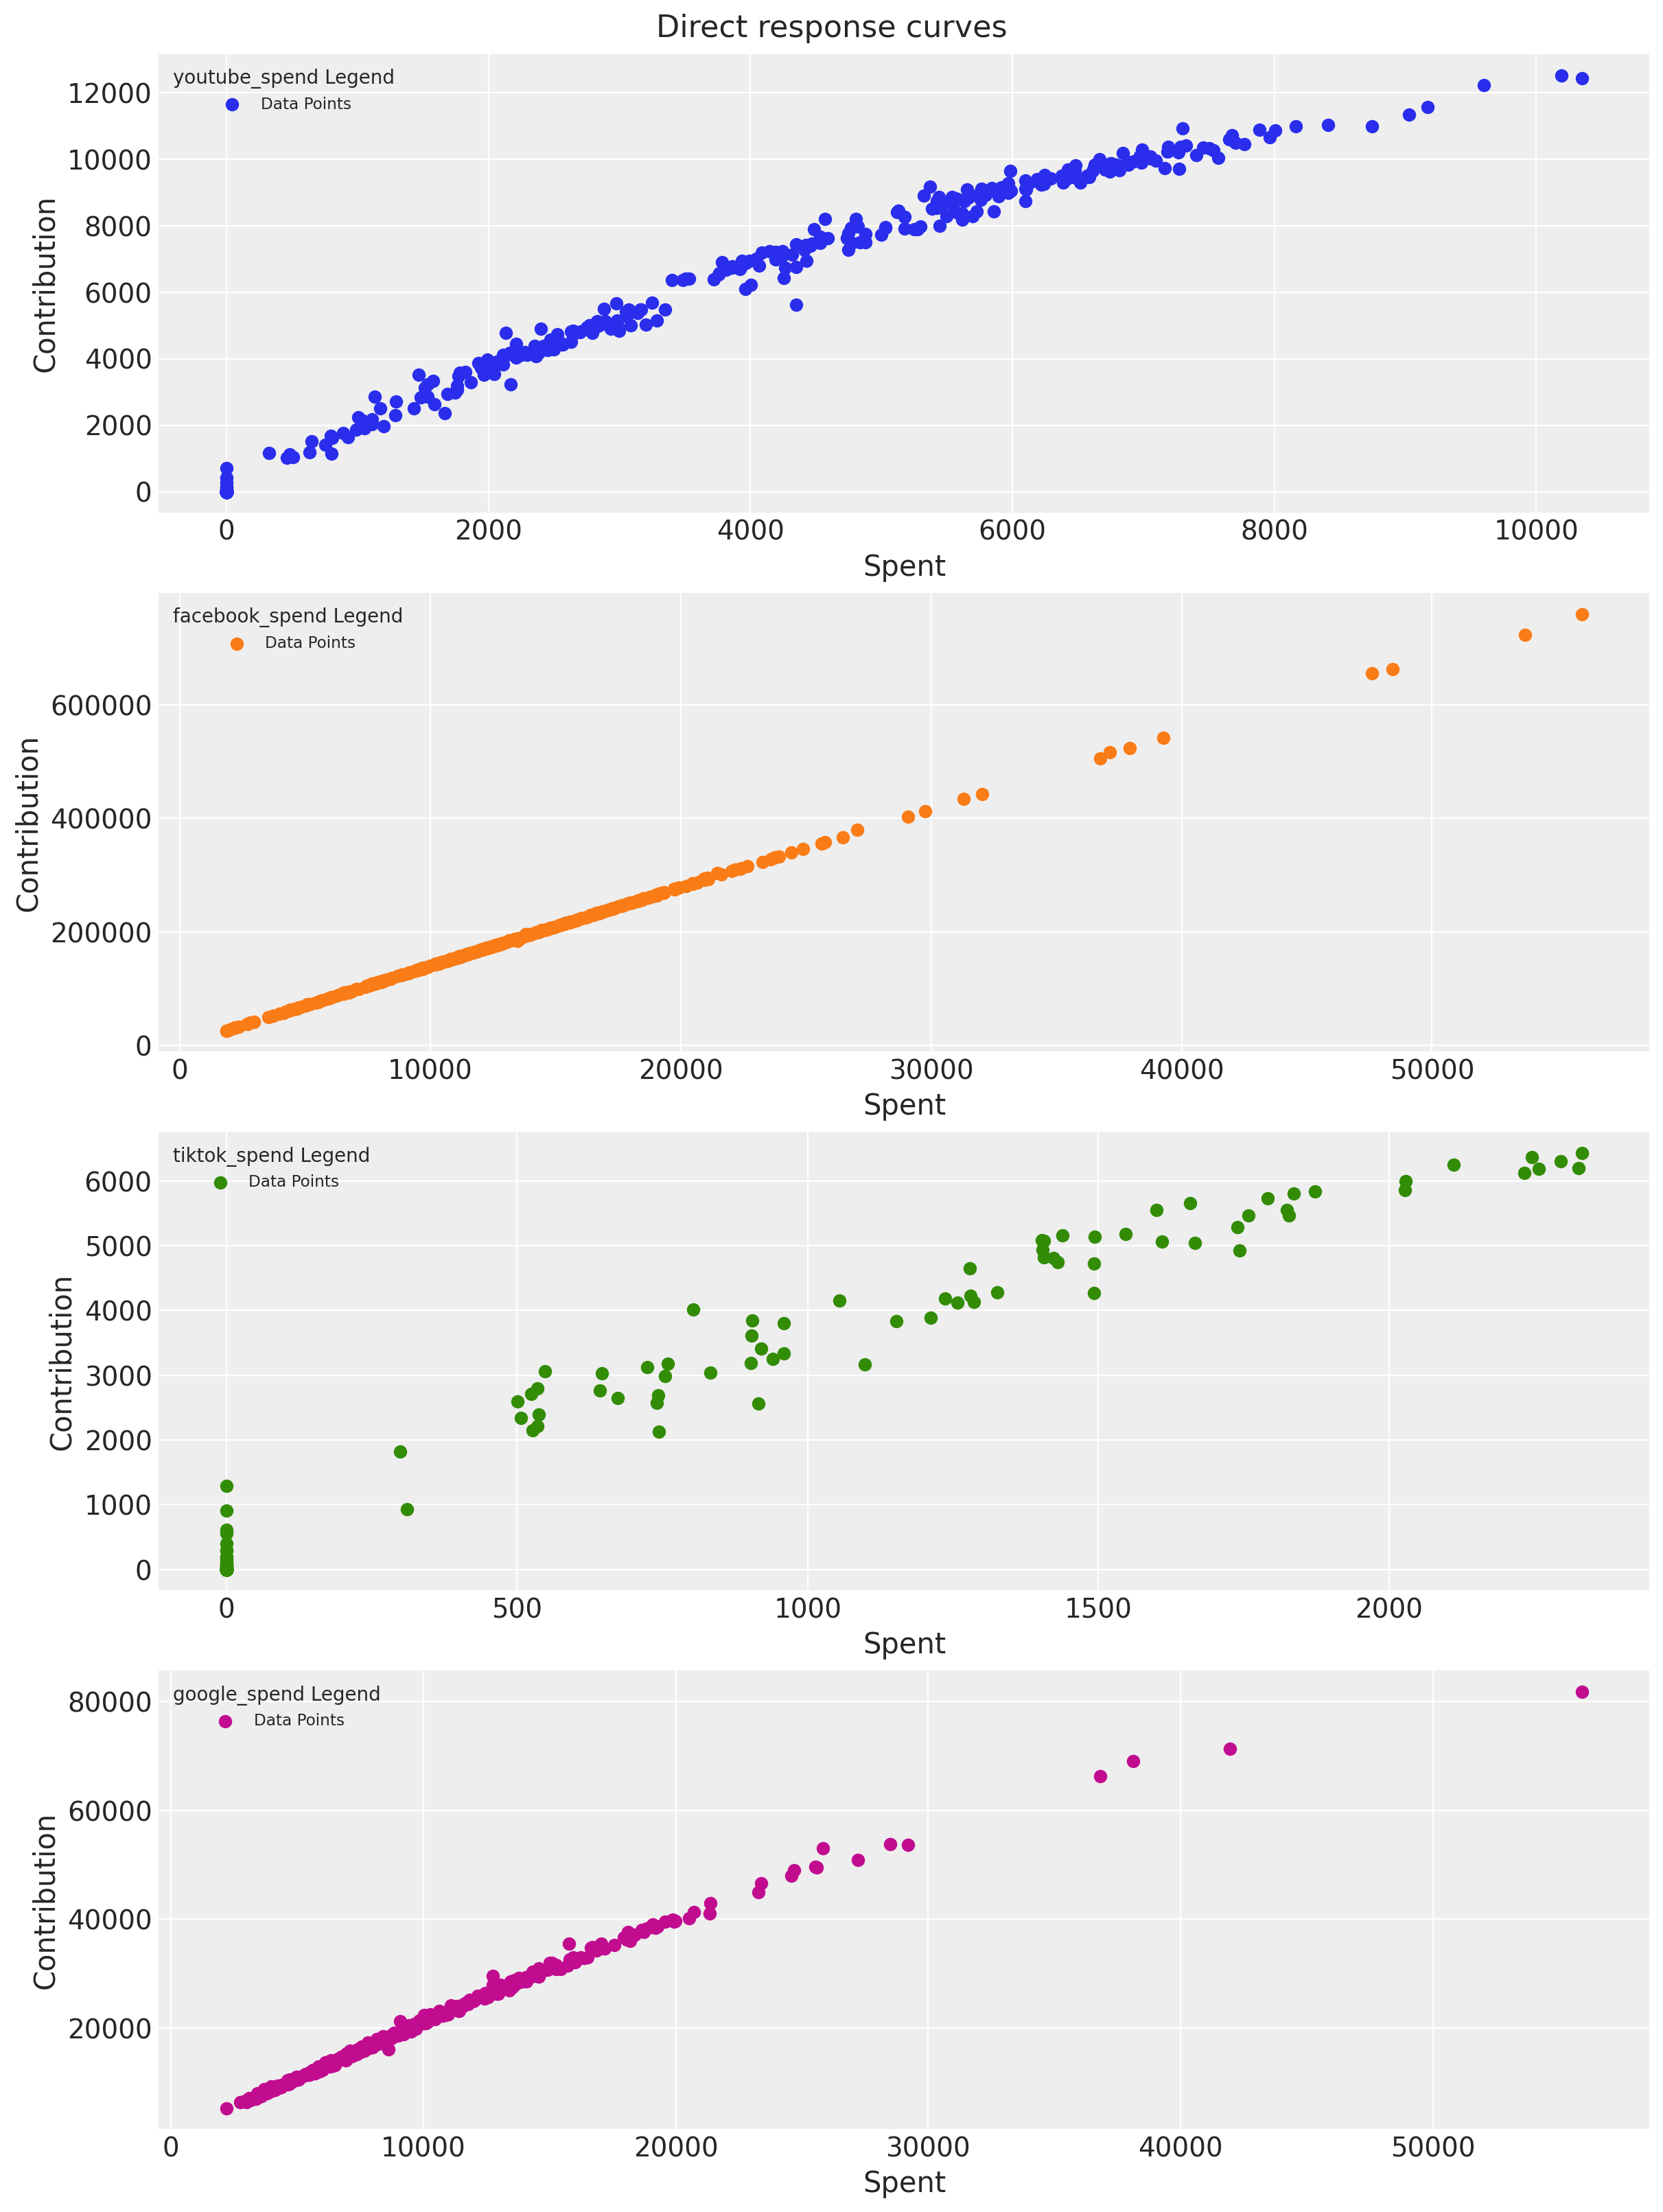

In [588]:
response_curve_fig = mmm.plot_direct_contribution_curves();

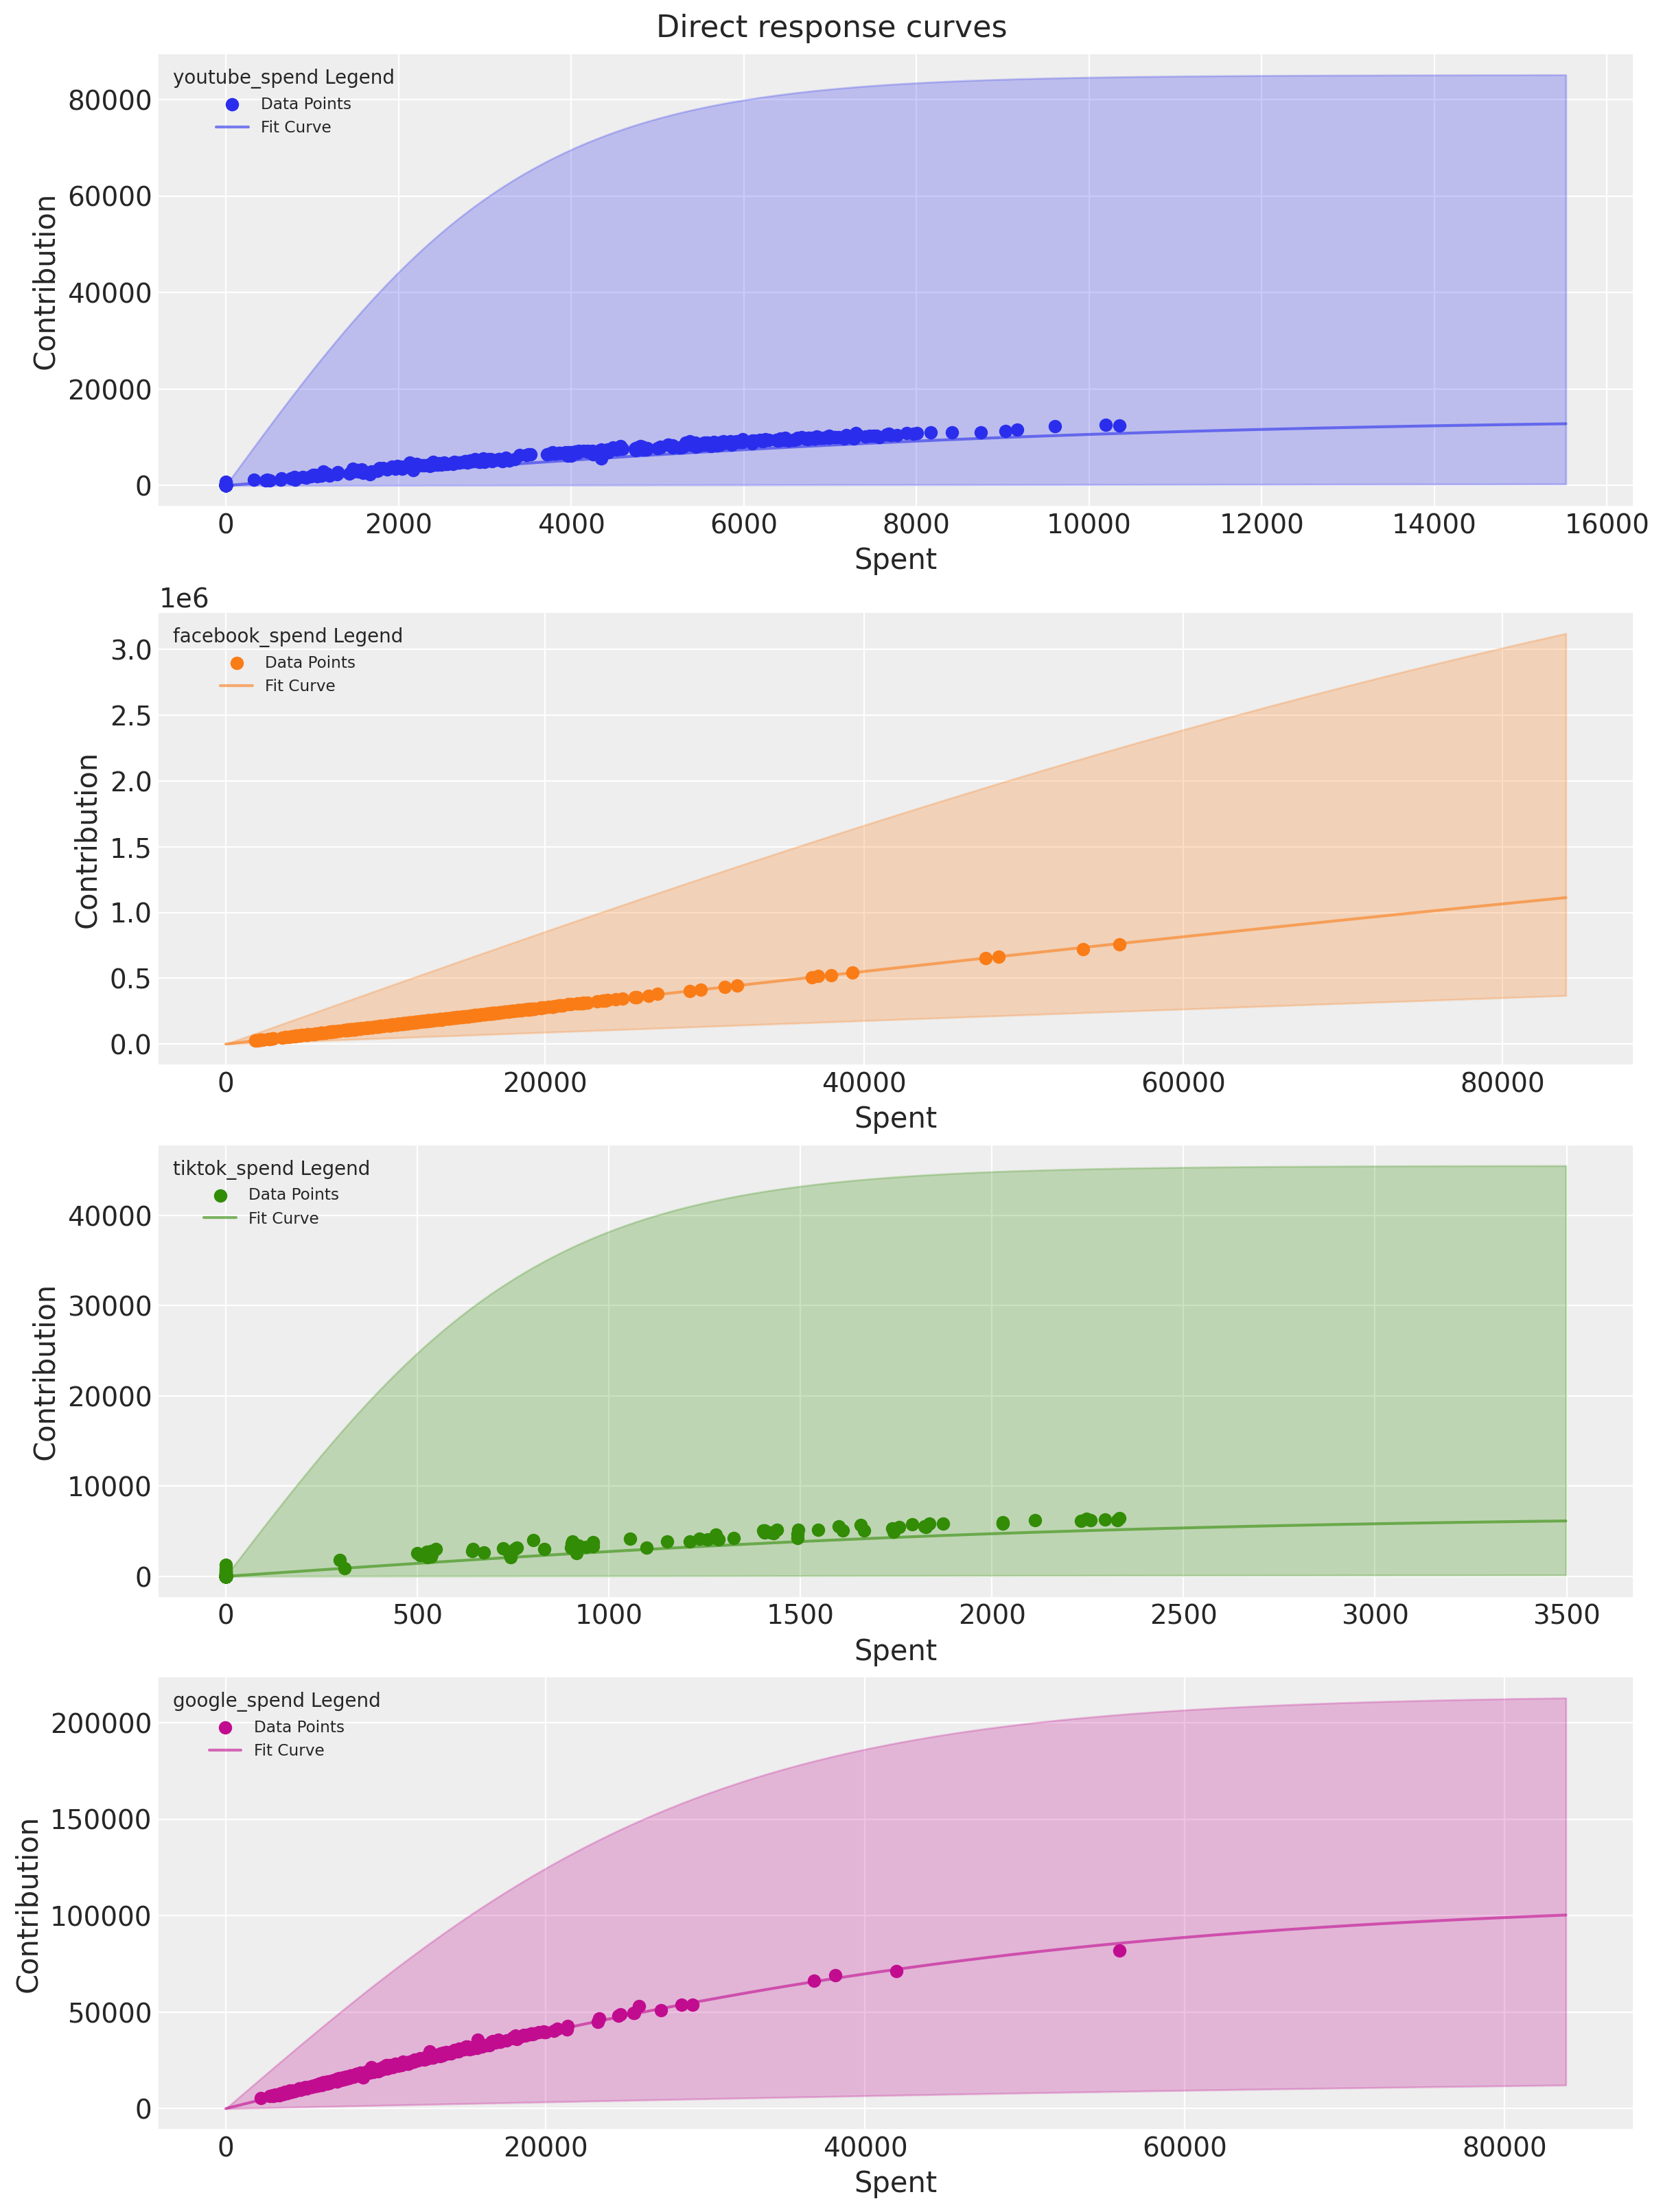

In [590]:
mmm.plot_direct_contribution_curves(show_fit=True, xlim_max=1.5);

In [592]:
print(f"Model was train using the {mmm.saturation.__class__.__name__} function")
print(f"and the {mmm.adstock.__class__.__name__} function")

Model was train using the LogisticSaturation function
and the GeometricAdstock function


In [594]:
az.summary(
    data=mmm.fit_result,
    var_names=[
        "saturation_beta",
        "saturation_lam",
        "adstock_alpha",
    ],
)

mean     sd  hdi_3%  hdi_97%  mcse_mean  \
saturation_beta[youtube_spend]   0.015  0.042   0.000    0.041      0.001   
saturation_beta[facebook_spend]  1.684  0.610   0.737    2.763      0.013   
saturation_beta[tiktok_spend]    0.007  0.013   0.000    0.022      0.000   
saturation_beta[google_spend]    0.061  0.032   0.001    0.114      0.001   
saturation_lam[youtube_spend]    2.451  1.813   0.067    5.682      0.025   
saturation_lam[facebook_spend]   0.569  0.198   0.240    0.947      0.004   
saturation_lam[tiktok_spend]     2.399  1.736   0.066    5.483      0.022   
saturation_lam[google_spend]     2.224  0.864   0.740    3.790      0.012   
adstock_alpha[youtube_spend]     0.250  0.194   0.000    0.605      0.003   
adstock_alpha[facebook_spend]    0.024  0.023   0.000    0.066      0.000   
adstock_alpha[tiktok_spend]      0.274  0.207   0.000    0.657      0.003   
adstock_alpha[google_spend]      0.139  0.129   0.000    0.377      0.002   

                                 mcse_sd  ess_bulk  ess_tail  r_hat  
saturation_beta[youtube_spend]     0.001    2344.0    2023.0    1.0  
saturation_beta[facebook_spend]    0.009    2534.0    2586.0    1.0  
saturation_beta[tiktok_spend]      0.000    3426.0    2259.0    1.0  
saturation_beta[google_spend]      0.000    2510.0    1448.0    1.0  
saturation_lam[youtube_spend]      0.020    4468.0    2434.0    1.0  
saturation_lam[facebook_spend]     0.003    2566.0    2706.0    1.0  
saturation_lam[tiktok_spend]       0.018    4607.0    2255.0    1.0  
saturation_lam[google_spend]       0.010    4853.0    1904.0    1.0  
adstock_alpha[youtube_spend]       0.002    4372.0    2378.0    1.0  
adstock_alpha[facebook_spend]      0.000    3816.0    2073.0    1.0  
adstock_alpha[tiktok_spend]        0.002    4535.0    2272.0    1.0  
adstock_alpha[google_spend]        0.002    3728.0    2199.0    1.0

In [682]:
total_budget = 13  # Imagine is 5K or 5M
# Define your channels
channels = ["facebook_spend", "google_spend", "tiktok_spend","youtube_spend"]
# The initial split per channel
budget_per_channel = total_budget / len(channels)
# Initial budget per channel as dictionary.
initial_budget_dict = {channel: budget_per_channel for channel in channels}
# bounds for each channel
min_budget, max_budget = 1, 5
budget_bounds = {channel: [min_budget, max_budget] for channel in channels}

In [684]:
response = mmm.allocate_budget_to_maximize_response(
    budget=total_budget,
    num_periods=120,
    time_granularity="daily",
    budget_bounds=budget_bounds,
)

In [686]:
print(mmm.optimal_allocation_dict)

{'youtube_spend': 1.000000000000008, 'facebook_spend': 4.9999999999999964, 'tiktok_spend': 4.999999999999985, 'google_spend': 2.000000000000011}


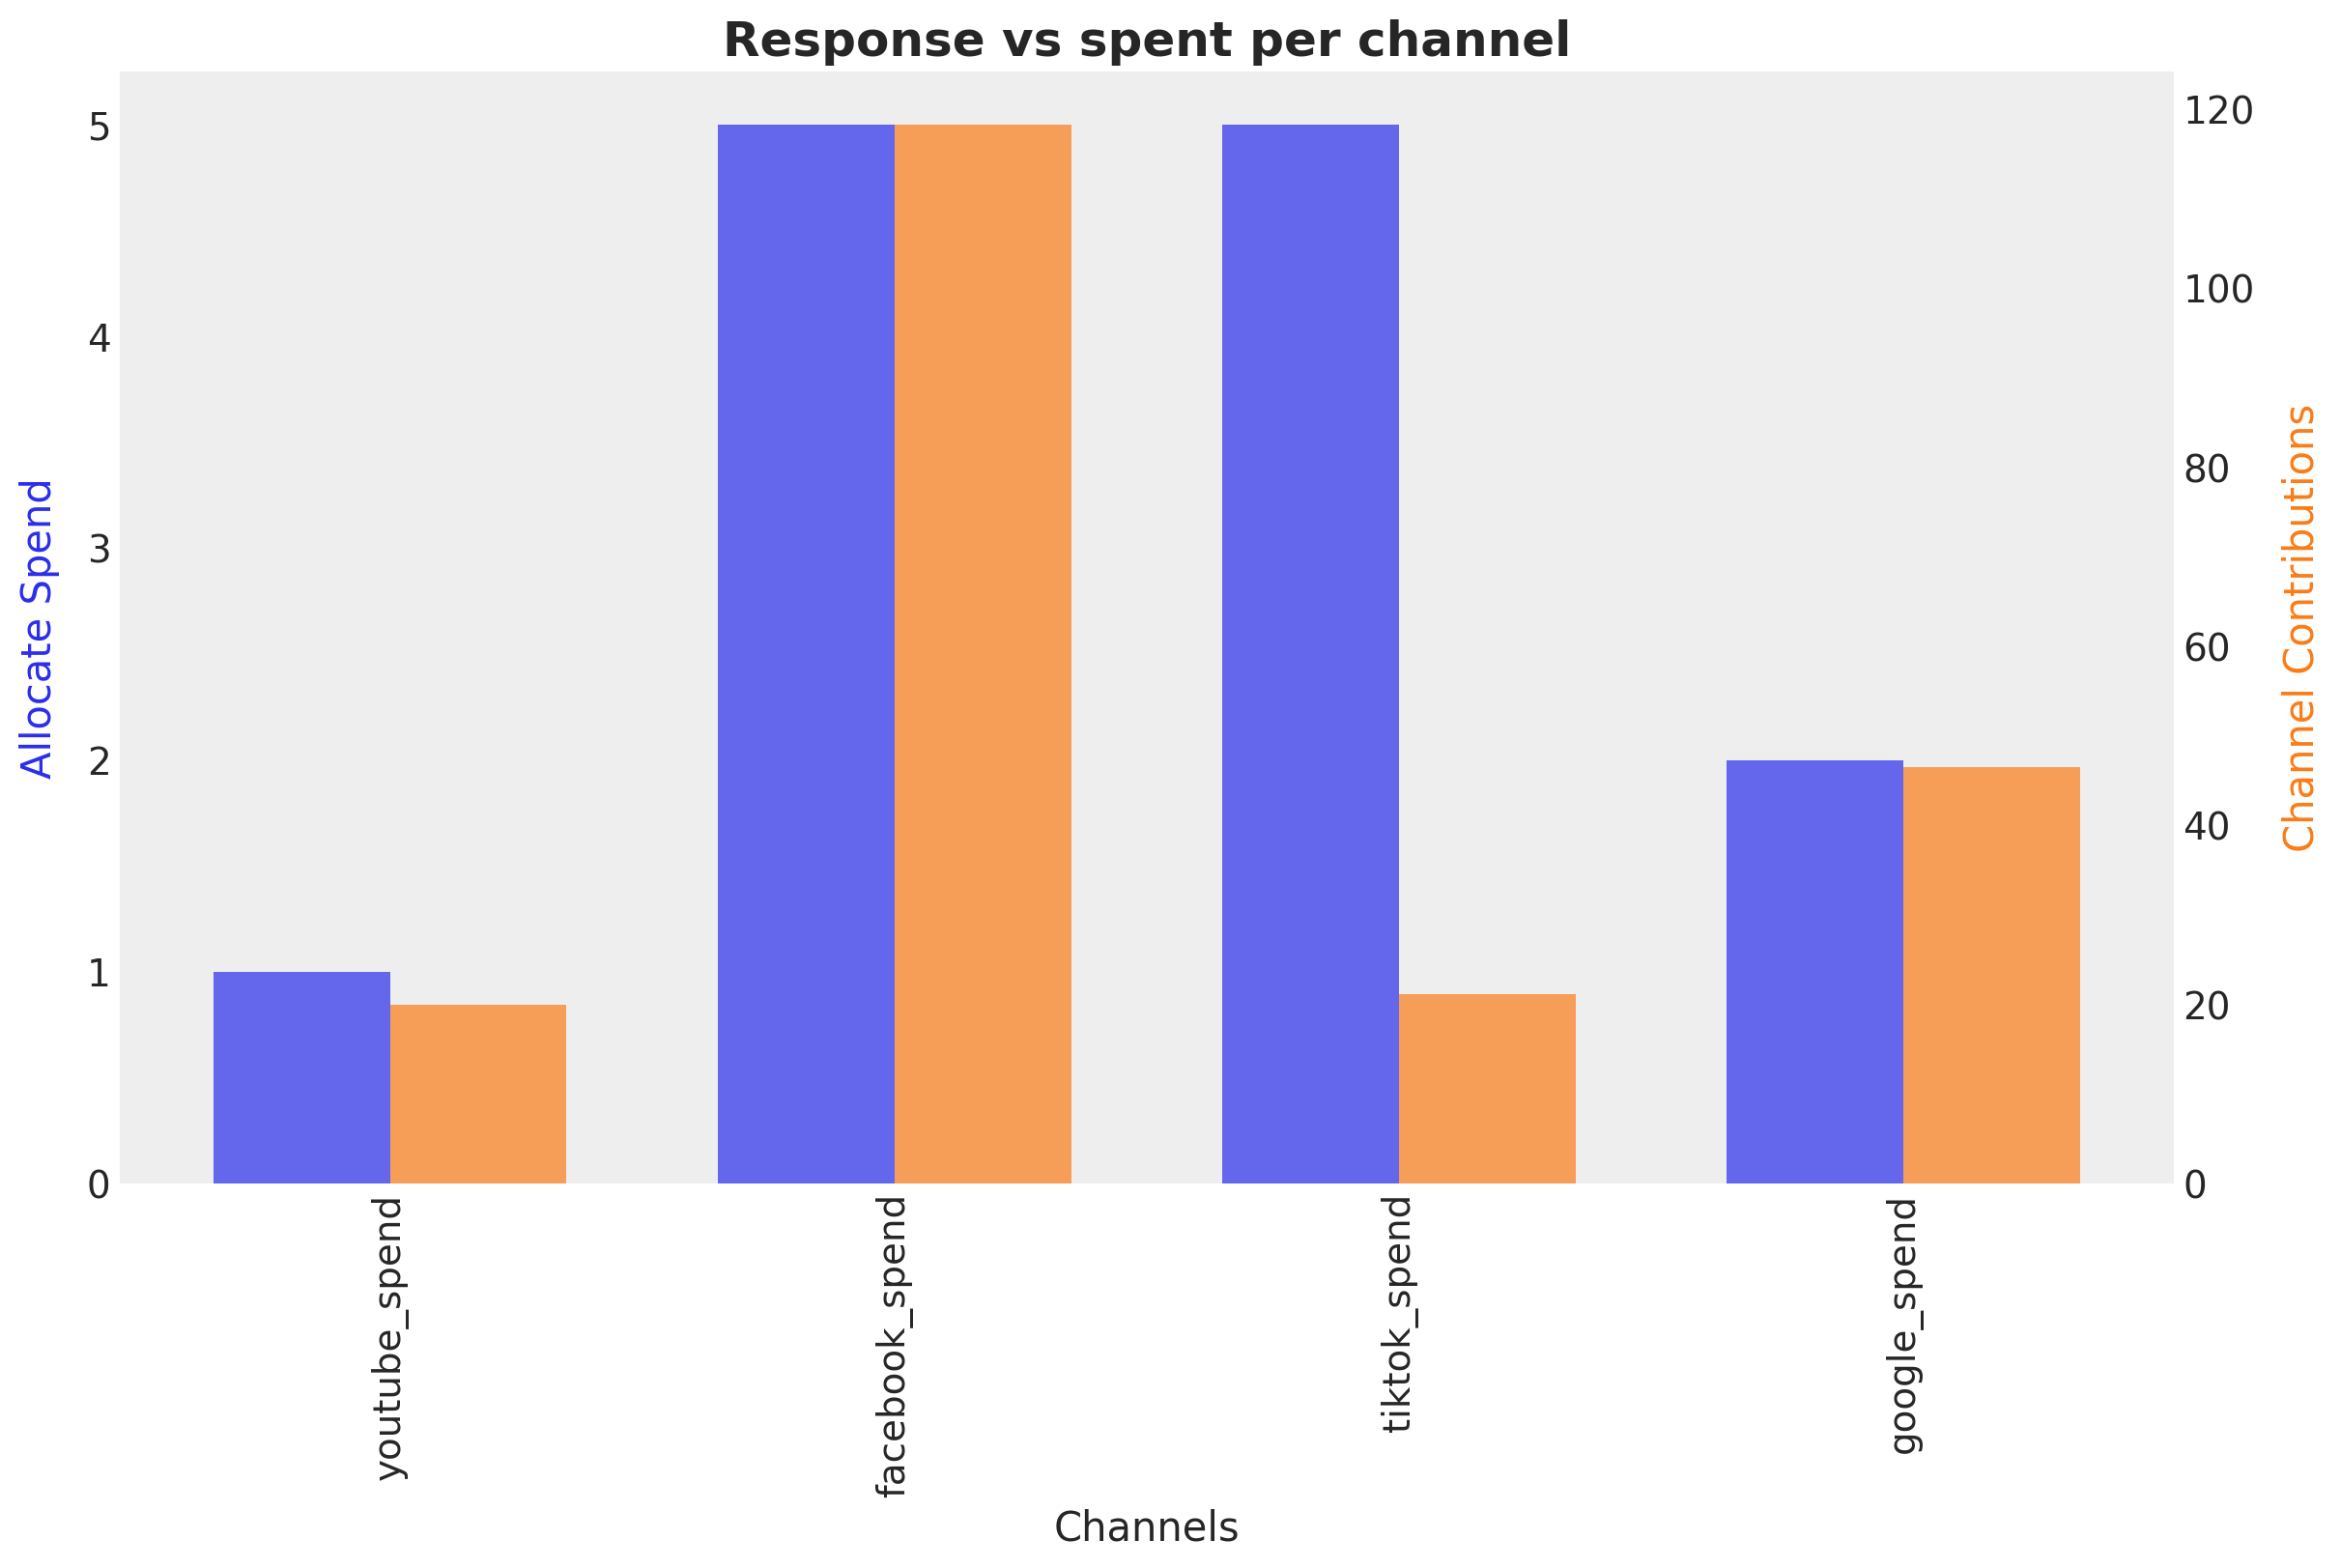

In [688]:
fig, ax = mmm.plot_budget_allocation(samples=response, figsize=(12, 8))
ax.set_title("Response vs spent per channel", fontsize=18, fontweight="bold");

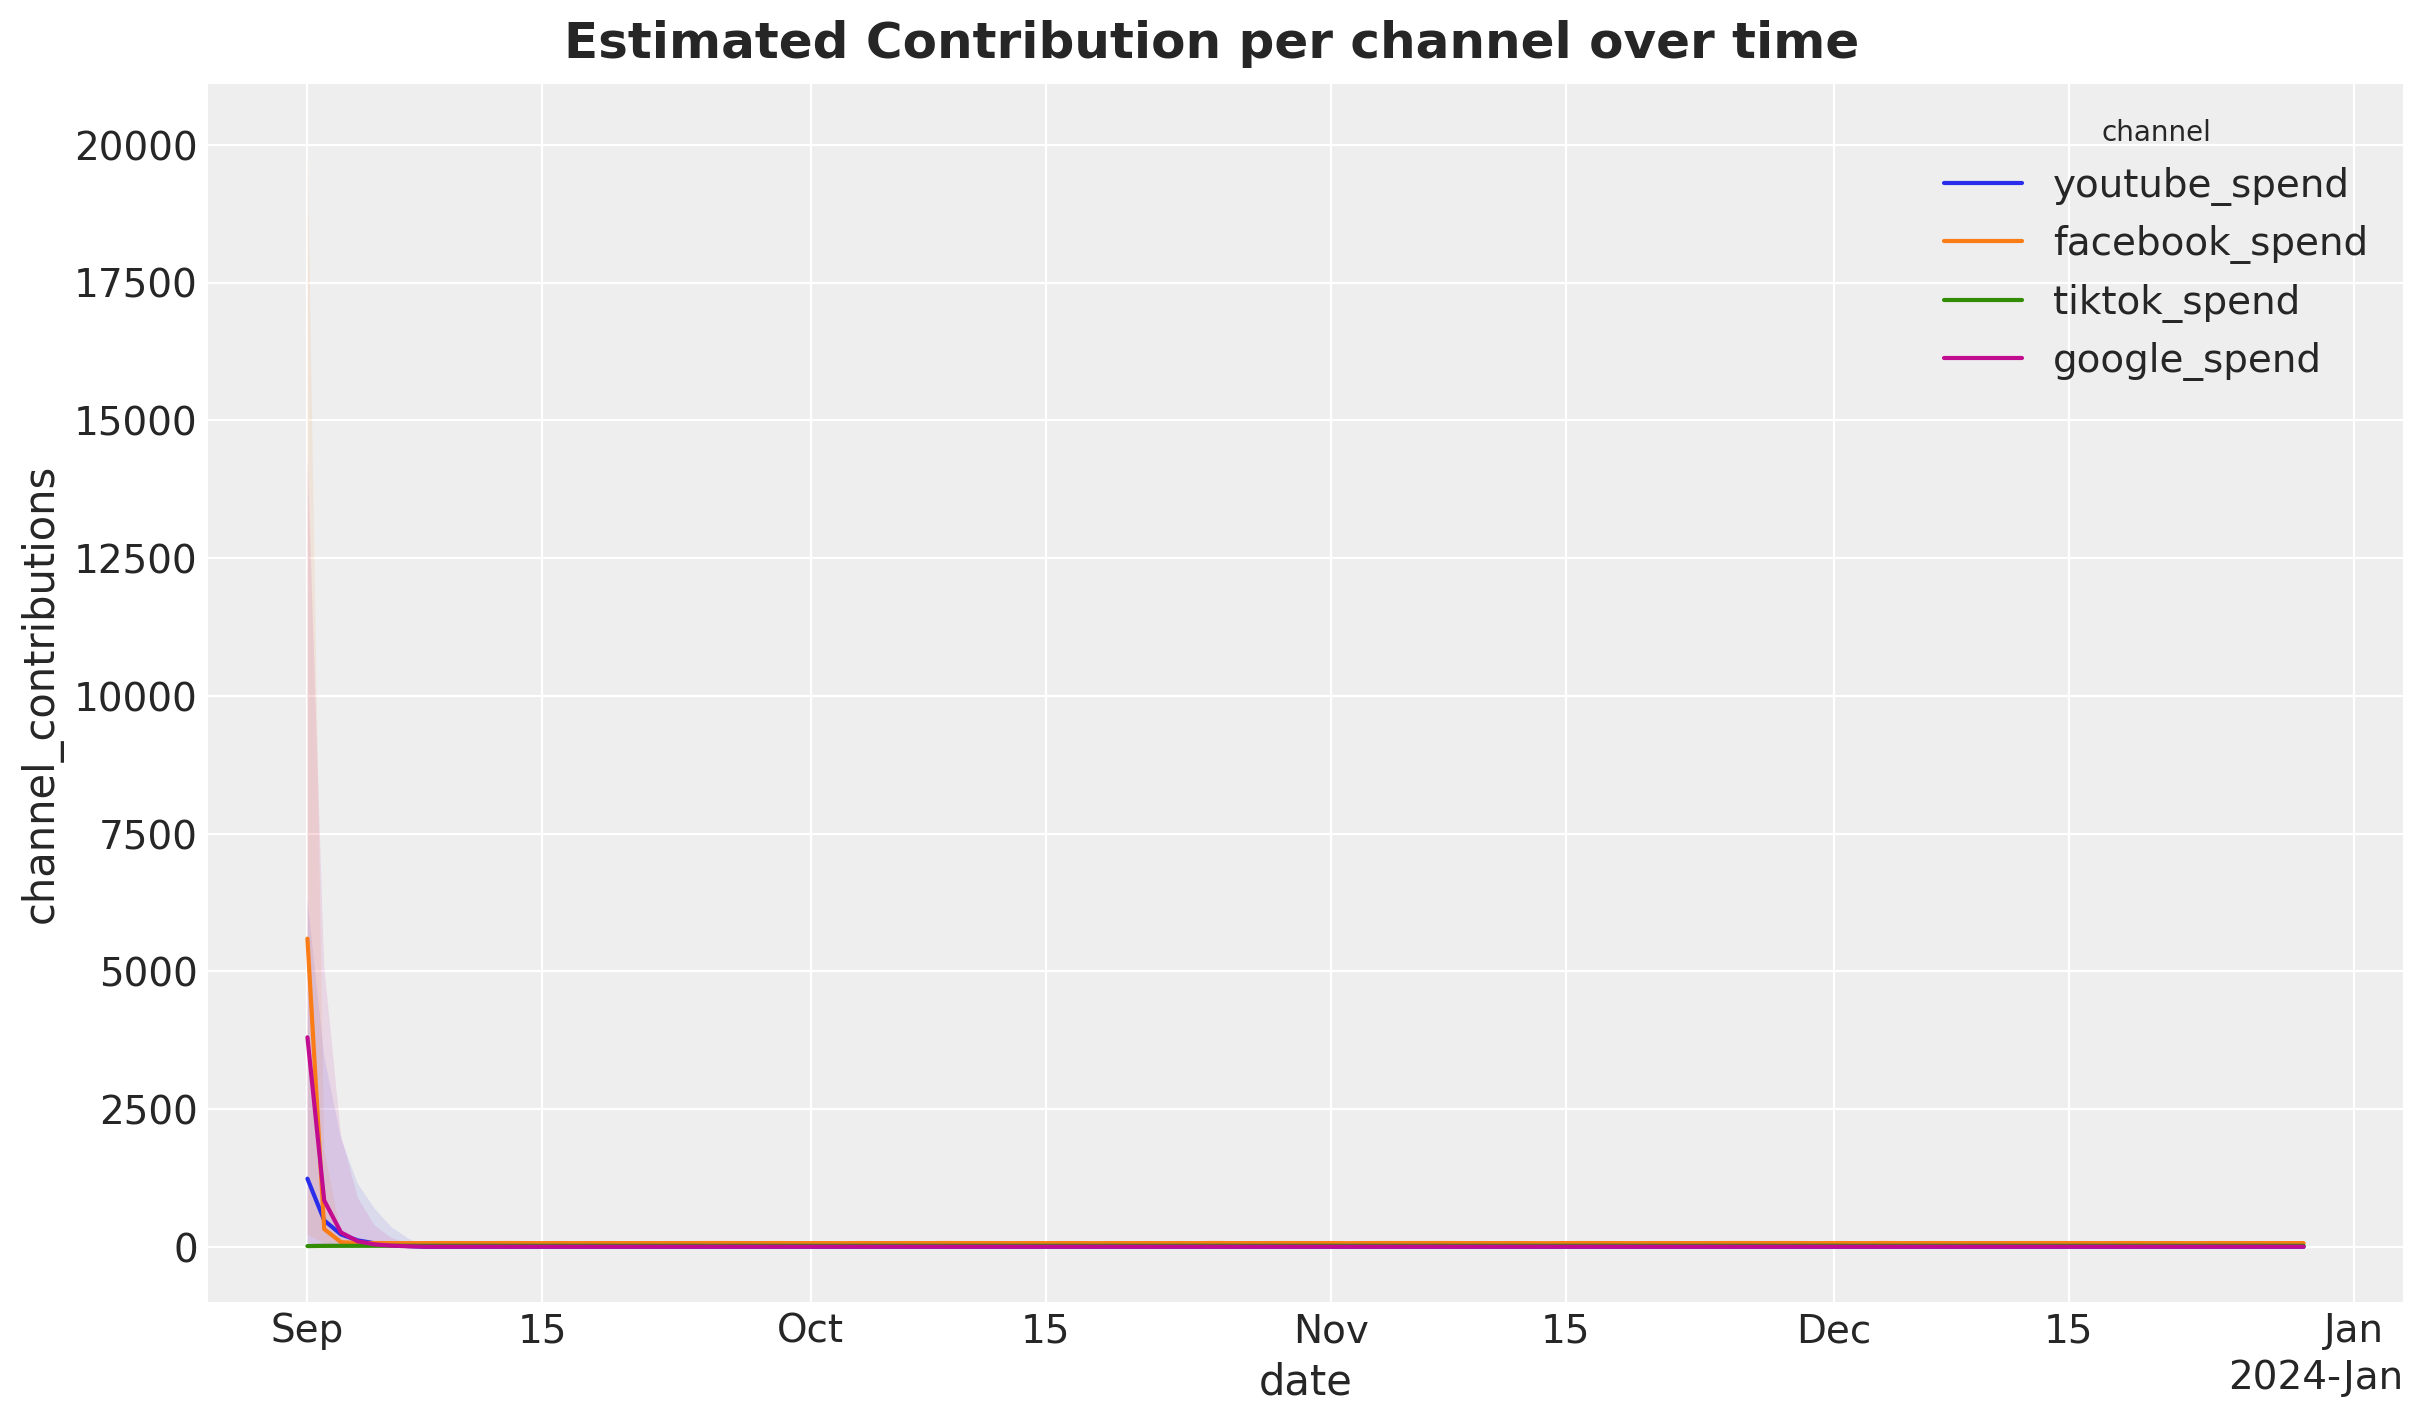

In [690]:
fig = mmm.plot_allocated_contribution_by_channel(samples=response)
fig.suptitle(
    "Estimated Contribution per channel over time", fontsize=18, fontweight="bold"
);

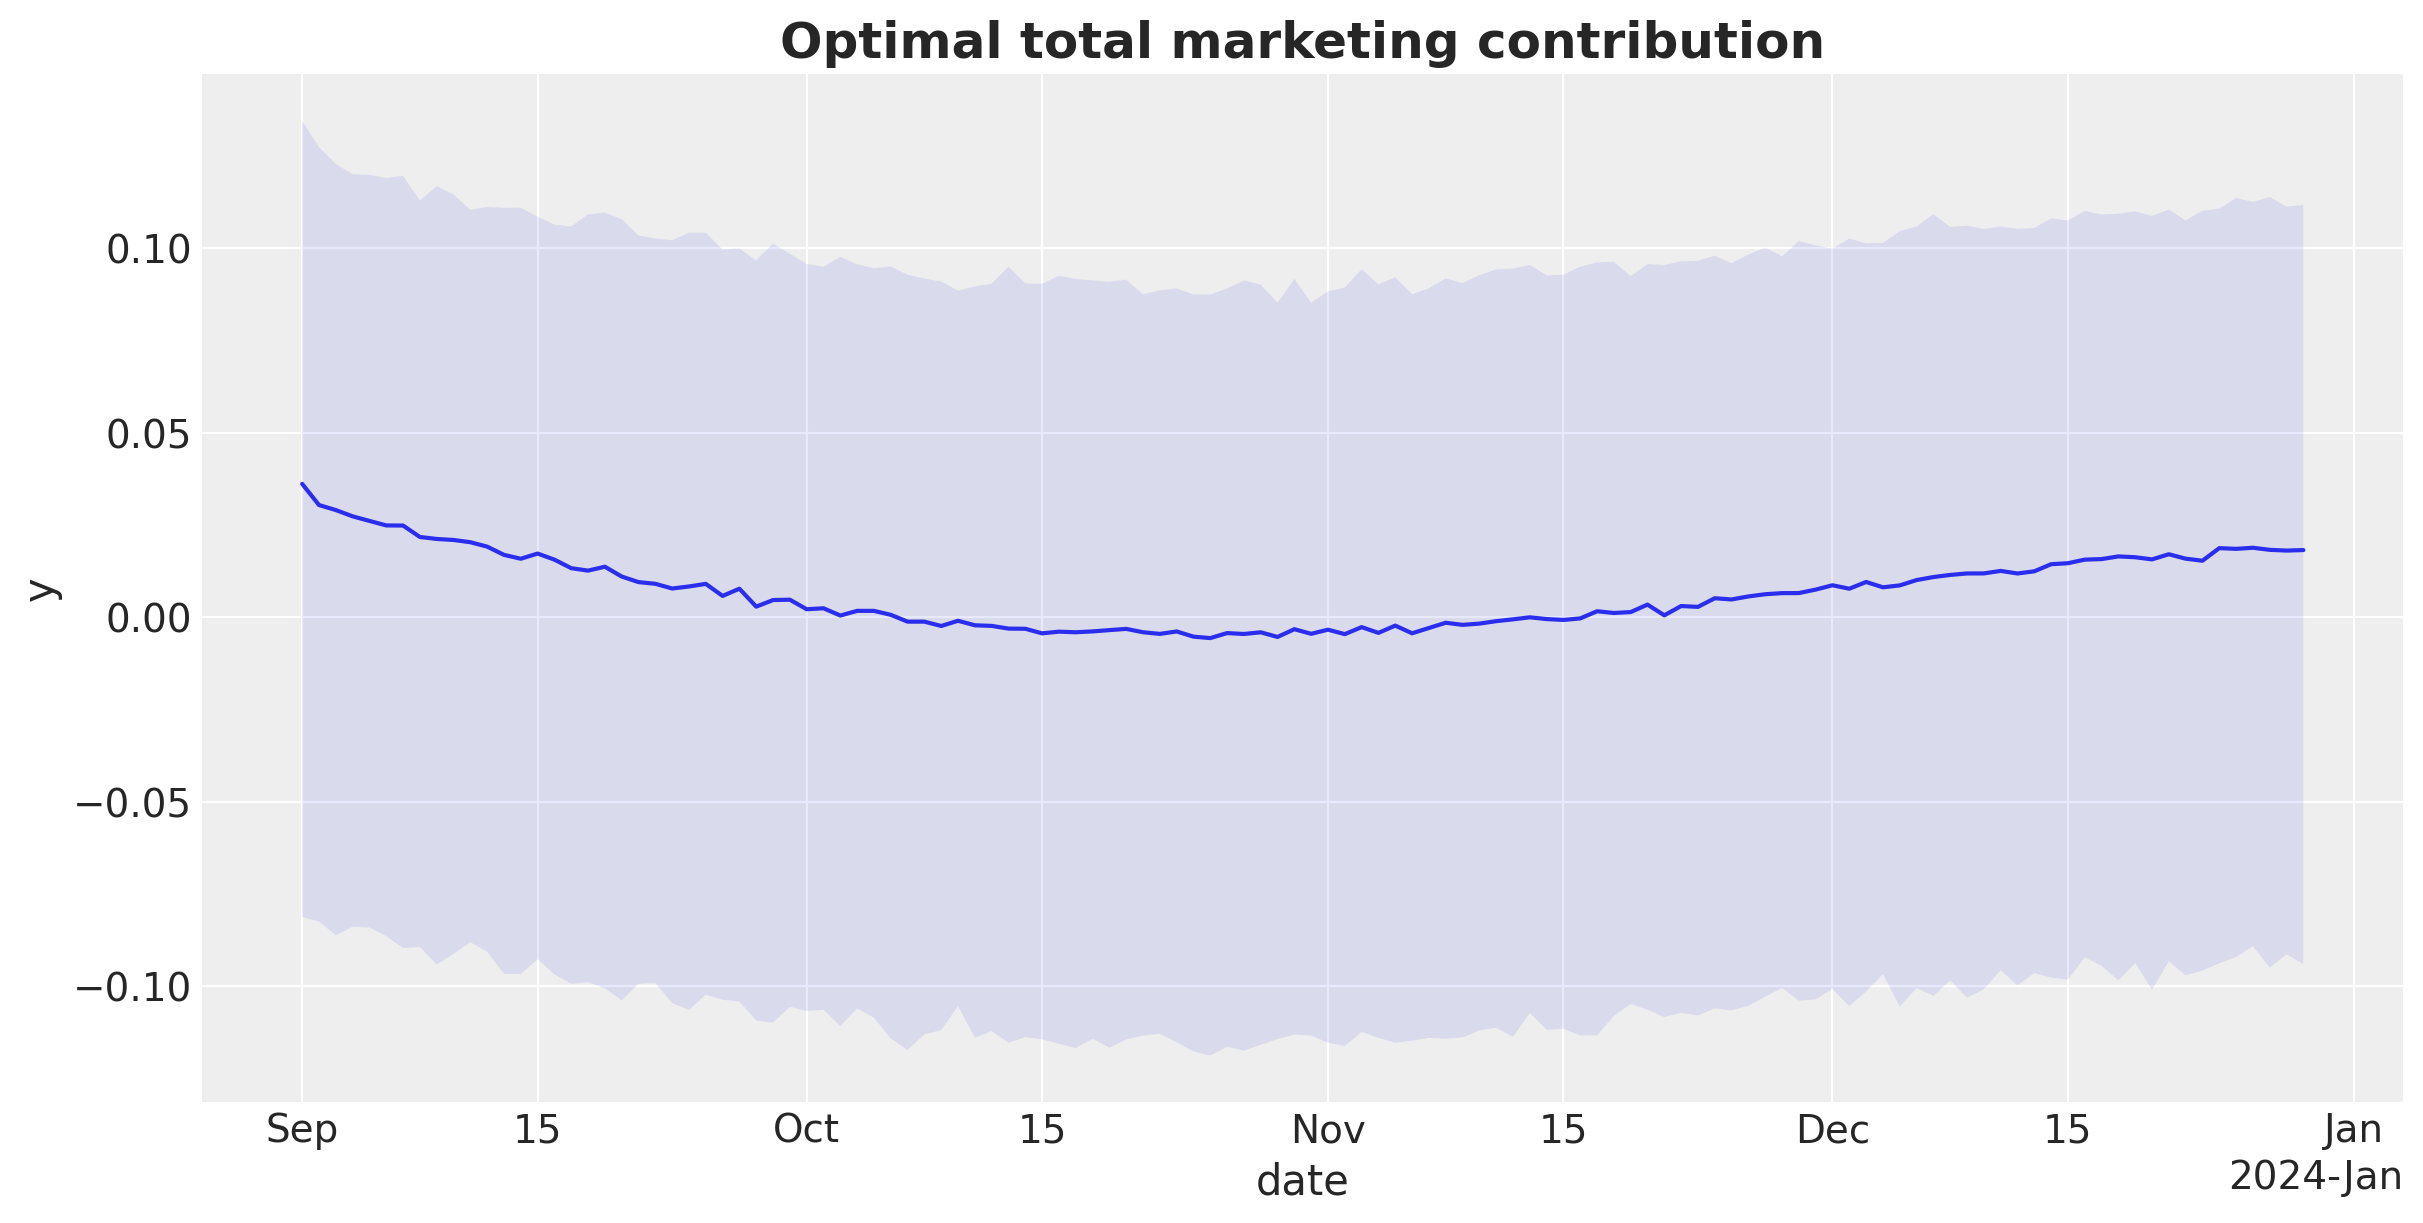

In [692]:
fig, ax = plt.subplots(figsize=(12, 6))

response["y"].mean(dim="sample").plot(ax=ax)
ax.fill_between(
    x=response.y.date.values,
    y1=response.y.quantile(0.025, dim="sample"),
    y2=response.y.quantile(0.95, dim="sample"),
    alpha=0.1,
)
ax.set_title("Optimal total marketing contribution", fontsize=18, fontweight="bold");

In [694]:
last_date = mmm.X["date"].max()

# New dates starting from last in dataset
n_new = 8
new_dates = pd.date_range(start=last_date, periods=1 + n_new, freq="D")[1:]

initial_budget_scenario = pd.DataFrame(
    {
        "date_week": new_dates,
    }
)

# Same channel spends as last day
initial_budget_scenario["x1"] = initial_budget_dict["x1"]
initial_budget_scenario["x2"] = initial_budget_dict["x2"]

# Other features
initial_budget_scenario["event_1"] = 0
initial_budget_scenario["event_2"] = 0

initial_budget_scenario["t"] = 0

response_initial_budget = mmm.sample_posterior_predictive(
    X_pred=initial_budget_scenario, extend_idata=False
)

response_initial_budget

KeyError: 'x1'

NameError: name 'response_initial_budget' is not defined

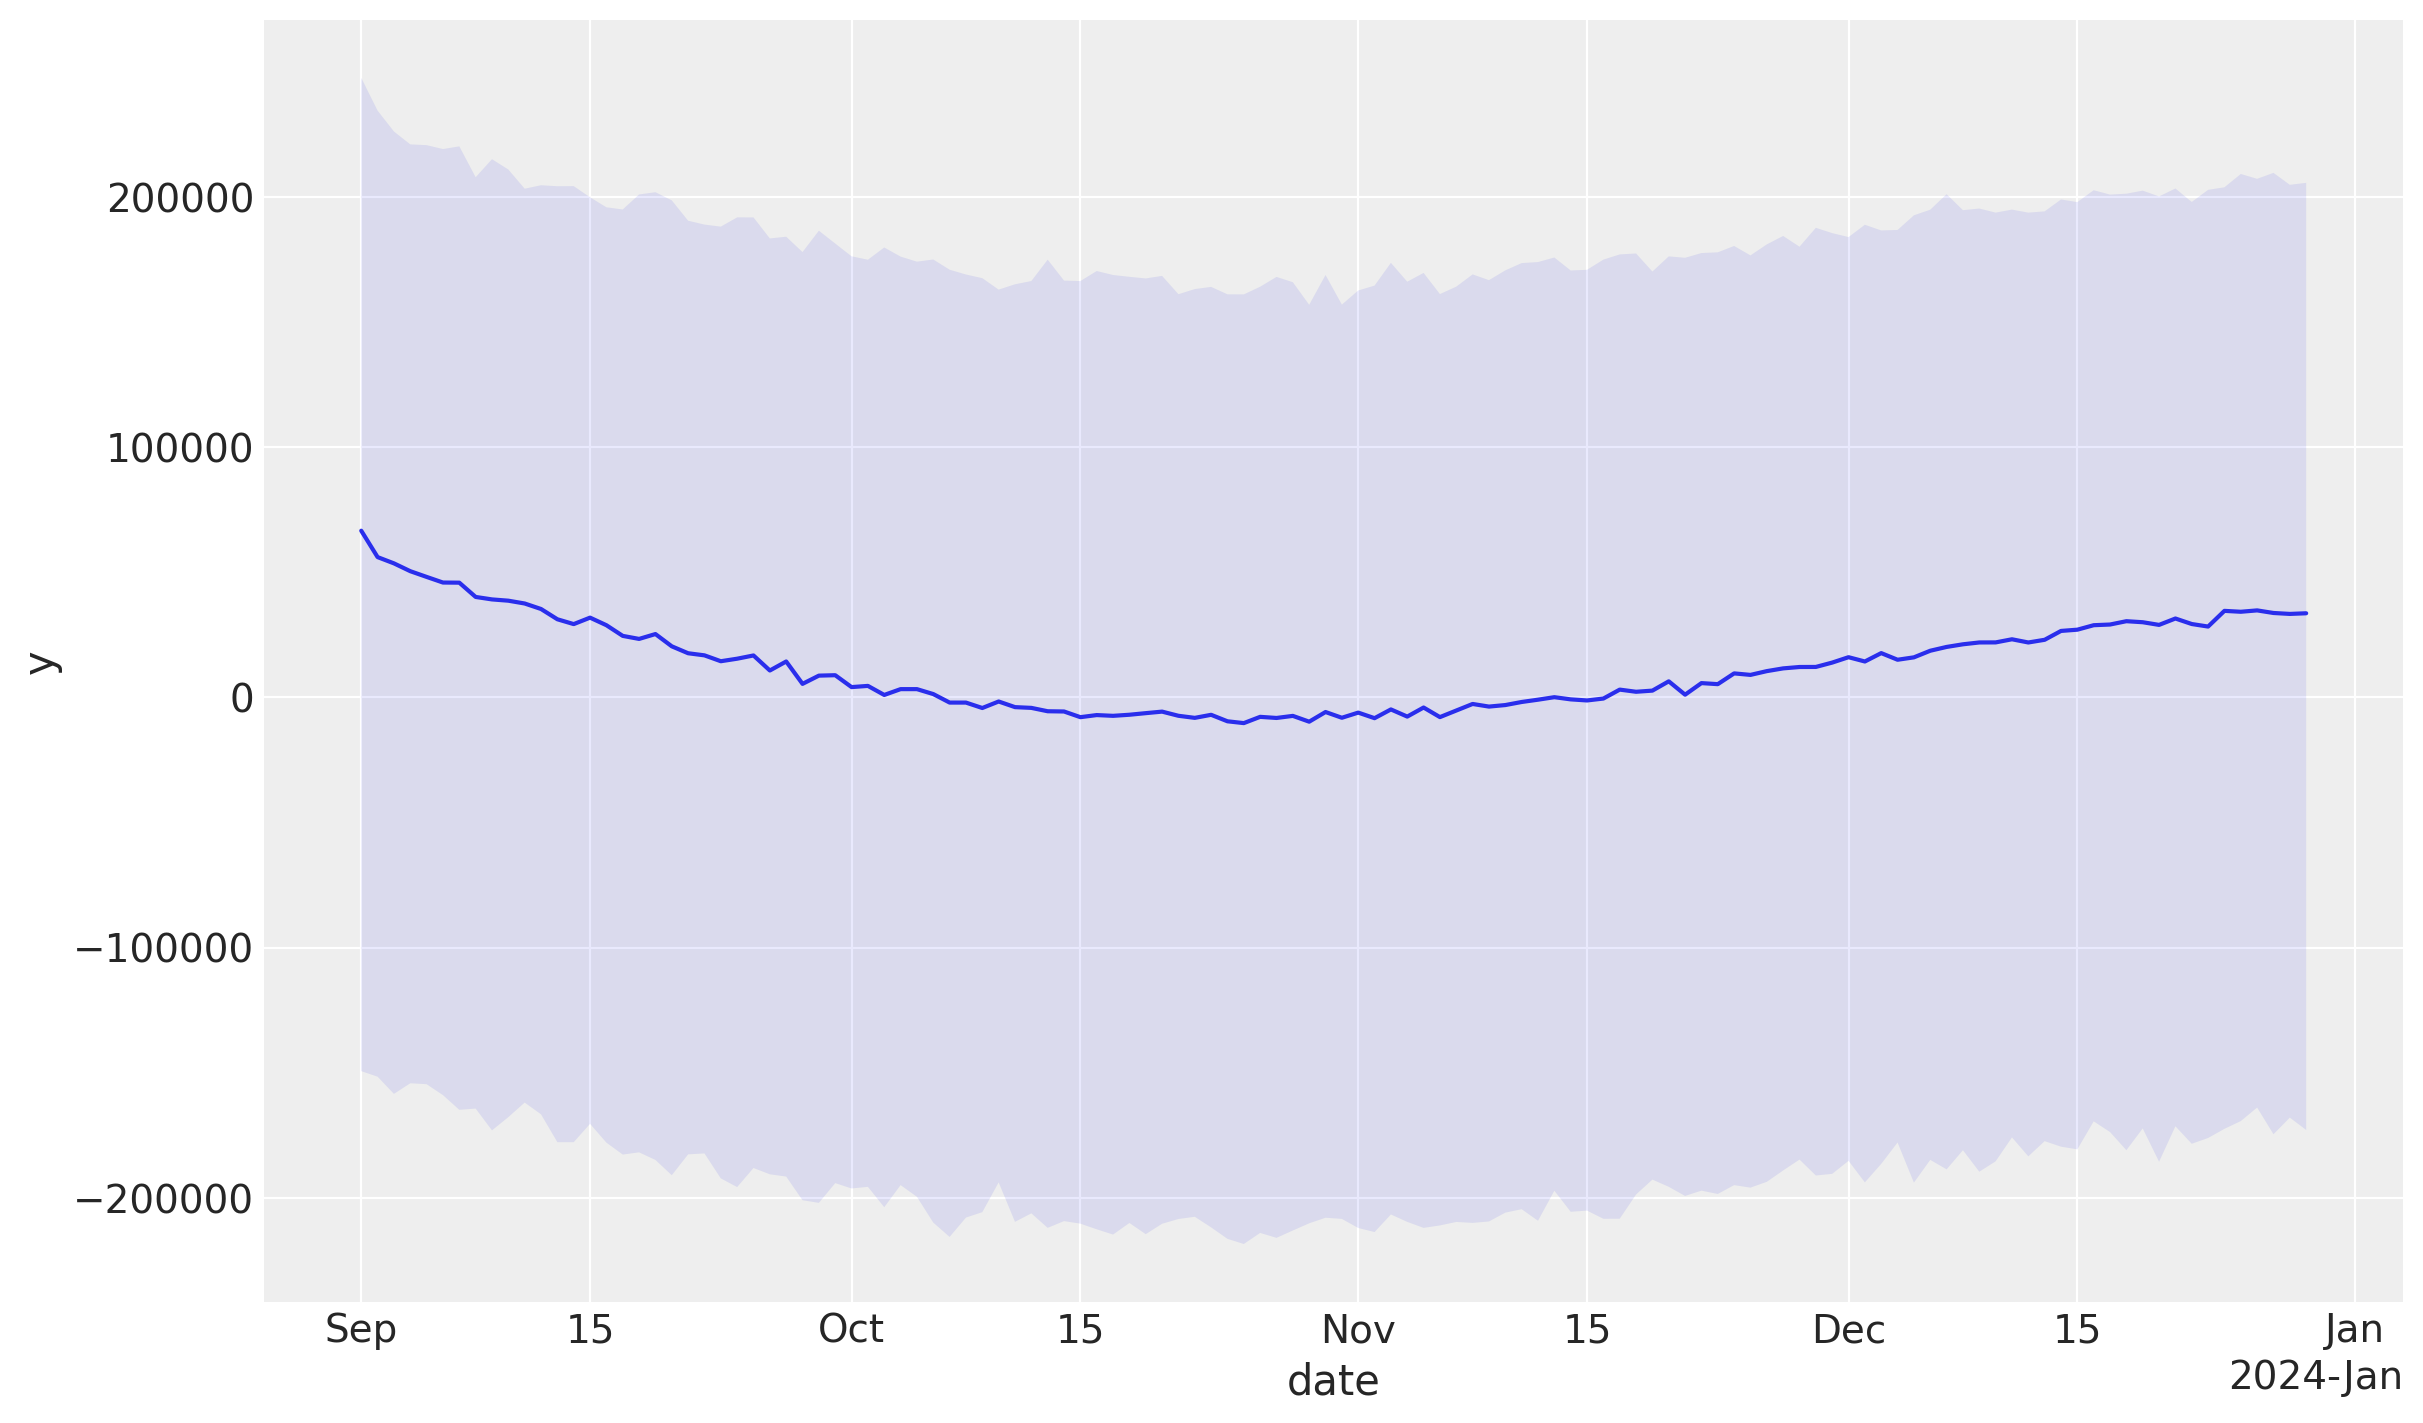

In [696]:
y_response_original_scale_optimize = (
    response["y"] * mmm.get_target_transformer()["scaler"].scale_
)

# Plotting optimized response
y_response_original_scale_optimize.mean(dim="sample").plot(
    label=f"Optimized Response | Daily spent {sum(mmm.optimal_allocation_dict.values()):.0f}M"
)
plt.fill_between(
    x=y_response_original_scale_optimize.date.values,
    y1=y_response_original_scale_optimize.quantile(0.025, dim="sample"),
    y2=y_response_original_scale_optimize.quantile(0.95, dim="sample"),
    alpha=0.1,
)

# Plotting initial budget response
response_initial_budget["y"].mean(dim="sample").plot(
    label="Initial Budget Response | Daily spent 5.00M"
)
plt.fill_between(
    x=response_initial_budget.y.date.values,
    y1=response_initial_budget.y.quantile(0.025, dim="sample"),
    y2=response_initial_budget.y.quantile(0.95, dim="sample"),
    alpha=0.1,
)

# Adding labels, legend, and title
plt.xlabel("Date")
plt.ylabel("Response")
plt.legend()
plt.title(
    "Comparison of Optimized and Initial Budget Responses",
    fontsize=18,
    fontweight="bold",
);

In [75]:
# Apply geometric adstock transformation for each platform
# Apply geometric adstock transformation for Facebook only if data is available

# Specify alphas for each platform
alpha_tiktok = 0.4
alpha_facebook = 0.3
alpha_google = 0.5
alpha_youtube = 0.6

# Filter Facebook data
facebook_data = df[df['breakdown_platform_northbeam'] == 'Facebook Ads']['spend'].to_numpy()

if len(facebook_data) > 0:  # Check if there is any data
    # Apply adstock transformation to the filtered Facebook data
    facebook_adstock = geometric_adstock(
        x=facebook_data,
        alpha=alpha_facebook,  # Use alpha_facebook instead of alpha_tiktok
        l_max=8,
        normalize=True
    )

    # Create a new DataFrame to hold the adstocked values
    facebook_filtered_df = df[df['breakdown_platform_northbeam'] == 'Facebook Ads'].copy()
    facebook_filtered_df['facebook_adstock'] = facebook_adstock

    # Reassign the adstocked values back to the original DataFrame using the index
    df.loc[df['breakdown_platform_northbeam'] == 'Facebook Ads', 'facebook_adstock'] = facebook_adstock
    print("Facebook adstock transformation applied.")
else:
    print("No data available for Facebook Ads.")


Facebook adstock transformation applied.


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply geometric adstock transformation for Facebook Ads
alpha_facebook = 0.3

# Filter Facebook data
facebook_data = df[df['breakdown_platform_northbeam'] == 'Facebook Ads']['spend'].to_numpy()

if len(facebook_data) > 0:  # Check if there is any data
    # Apply adstock transformation to the filtered Facebook data
    facebook_adstock = geometric_adstock(
        x=facebook_data,
        alpha=alpha_facebook,
        l_max=8,
        normalize=True
    )

    # Create a new DataFrame to hold the original and adstocked values for Facebook Ads
    facebook_filtered_df = df[df['breakdown_platform_northbeam'] == 'Facebook Ads'].copy()
    facebook_filtered_df['facebook_adstock'] = facebook_adstock

    # Plot the original spend vs adstock-transformed spend
    plt.figure(figsize=(12, 6))
    
    # Plot the original spend
    sns.lineplot(data=facebook_filtered_df, x='date', y='spend', label='Original Spend', color='blue')
    
    # Plot the adstock-transformed spend
    sns.lineplot(data=facebook_filtered_df, x='date', y='facebook_adstock', label='Adstocked Spend', color='red')
    
    plt.title('Original vs Adstock-Transformed Media Spend for Facebook Ads')
    plt.xlabel('Date')
    plt.ylabel('Spend')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    
    # Save the plot to a file
    plt.savefig('facebook_adstock_comparison.png')
    print("Plot saved as 'facebook_adstock_comparison.png'")
    
    plt.close()
else:
    print("No data available for Facebook Ads.")

Plot saved as 'facebook_adstock_comparison.png'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply geometric adstock transformation for Facebook Ads
alpha_facebook = 0.3

# Filter Facebook data
facebook_data = df[df['breakdown_platform_northbeam'] == 'Facebook Ads']['spend'].to_numpy()

if len(facebook_data) > 0:  # Check if there is any data
    # Apply adstock transformation to the filtered Facebook data
    facebook_adstock = geometric_adstock(
        x=facebook_data,
        alpha=alpha_facebook,
        l_max=8,
        normalize=True
    )

    # Create a new DataFrame to hold the original and adstocked values for Facebook Ads
    facebook_filtered_df = df[df['breakdown_platform_northbeam'] == 'Facebook Ads'].copy()
    facebook_filtered_df['facebook_adstock'] = facebook_adstock

    # Plot the original spend vs adstock-transformed spend
    plt.figure(figsize=(12, 6))
    
    # Plot the original spend
    sns.lineplot(data=facebook_filtered_df, x='date', y='spend', label='Original Spend', color='blue')
    
    # Plot the adstock-transformed spend
    sns.lineplot(data=facebook_filtered_df, x='date', y='facebook_adstock', label='Adstocked Spend', color='red')
    
    plt.title('Original vs Adstock-Transformed Media Spend for Facebook Ads')
    plt.xlabel('Date')
    plt.ylabel('Spend')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    
    # Show the plot
    plt.show()
else:
    print("No data available for Facebook Ads.")

In [59]:
import numpy as np
import matplotlib
matplotlib.use('Agg')  # Non-interactive backend for saving plots
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming geometric_adstock is already defined and available
# Below is a simple placeholder version of the function (you can replace this with your actual function)
def geometric_adstock(x, alpha, l_max, normalize=True):
    adstocked = []
    for i in range(len(x)):
        decay = 0
        for l in range(min(i + 1, l_max)):
            decay += (alpha ** l) * x[i - l]
        adstocked.append(decay)
    adstocked = np.array(adstocked)
    if normalize:
        adstocked = adstocked / adstocked.max()  # Normalization
    return adstocked

# Clean up the column names by stripping any extra spaces in df2
df.columns = df.columns.str.strip()

# Specify alphas for each platform
alpha_tiktok = 0.4
alpha_facebook = 0.3
alpha_google = 0.5
alpha_youtube = 0.6

# Apply geometric adstock transformation for each platform
df2["tiktok_adstock"] = geometric_adstock(
    x=df2[df2['breakdown_platform_northbeam'] == 'TikTok Ads']['spend'].to_numpy(),
    alpha=alpha_tiktok,
    l_max=8,
    normalize=True
)

df2["facebook_adstock"] = geometric_adstock(
    x=df2[df2['breakdown_platform_northbeam'] == 'Facebook Ads']['spend'].to_numpy(),
    alpha=alpha_facebook,
    l_max=8,
    normalize=True
)

df2["google_adstock"] = geometric_adstock(
    x=df2[df2['breakdown_platform_northbeam'] == 'Google Ads']['spend'].to_numpy(),
    alpha=alpha_google,
    l_max=8,
    normalize=True
)

df2["youtube_adstock"] = geometric_adstock(
    x=df2[df2['breakdown_platform_northbeam'] == 'YouTube Ads']['spend'].to_numpy(),
    alpha=alpha_youtube,
    l_max=8,
    normalize=True
)

# Now you can plot and save each transformed dataset separately
platforms = ['TikTok Ads', 'Facebook Ads', 'Google Ads', 'YouTube Ads']
adstock_columns = ['tiktok_adstock', 'facebook_adstock', 'google_adstock', 'youtube_adstock']

for platform, adstock_col in zip(platforms, adstock_columns):
    filtered_df = df2[df2['breakdown_platform_northbeam'] == platform]
    
    # Create a new plot for each platform's adstock-transformed spend
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered_df, x='date', y=adstock_col)
    
    plt.title(f'Adstock-Transformed Media Costs for {platform}')
    plt.xlabel('Date')
    plt.ylabel('Adstocked Spend')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save each plot with the platform name in the file name
    file_name = f'adstock_media_costs_{platform.replace(" ", "_").lower()}.png'
    plt.savefig(file_name)
    print(f"Plot saved as '{file_name}'")

    # Close the plot to avoid overlap in the loop
    plt.close()

KeyError: 'breakdown_platform_northbeam'

In [ ]:
# apply geometric adstock transformation
alpha1: float = 0.4
alpha2: float = 0.2

df["tiktok_adstock"] = (
    geometric_adstock(x=df["breakdown_platform_northbeam"].to_numpy(), alpha=alpha1, l_max=8, normalize=True)
    .eval()
    .flatten()
)

In [57]:
import matplotlib
matplotlib.use('Agg')  # Non-interactive backend for saving plots
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming geometric_adstock is already defined and available
# For demonstration, I'll use a simple version of the function (you can replace this with your actual function)
def geometric_adstock(x, alpha, l_max, normalize=True):
    adstocked = []
    for i in range(len(x)):
        decay = 0
        for l in range(min(i + 1, l_max)):
            decay += (alpha ** l) * x[i - l]
        adstocked.append(decay)
    adstocked = np.array(adstocked)
    if normalize:
        adstocked = adstocked / adstocked.max()  # Normalization
    return adstocked

# Clean up the column names by stripping any extra spaces in df2
df.columns = df.columns.str.strip()

# List of platforms to filter and plot separately
platforms = ['TikTok Ads', 'Facebook Ads', 'Google Ads', 'YouTube Ads']
alphas = [0.4, 0.3, 0.5, 0.6]  # Different alpha values for each platform, you can modify these

# Loop through each platform and apply geometric adstock transformation
for platform, alpha in zip(platforms, alphas):
    filtered_df = df[df['breakdown_platform_northbeam'] == platform]
    
    # Apply geometric adstock transformation to the 'spend' column
    filtered_df[f'{platform}_adstock'] = geometric_adstock(
        x=filtered_df['spend'].to_numpy(), alpha=alpha, l_max=8, normalize=True
    )
    
    # Create a new plot for the transformed data
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered_df, x='date', y=f'{platform}_adstock')
    
    plt.title(f'Adstock-Transformed Media Costs for {platform}')
    plt.xlabel('Date')
    plt.ylabel('Adstocked Spend')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save each plot with the platform name in the file name
    file_name = f'adstock_media_costs_{platform.replace(" ", "_").lower()}.png'
    plt.savefig(file_name)
    print(f"Plot saved as '{file_name}'")

    # Close the plot to avoid overlap in the loop
    plt.close()

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
# apply geometric adstock transformation
alpha1: float = 0.4
alpha2: float = 0.2

df["x1_adstock"] = (
    geometric_adstock(x=df["x1"].to_numpy(), alpha=alpha1, l_max=8, normalize=True)
    .eval()
    .flatten()
)

df["x2_adstock"] = (
    geometric_adstock(x=df["x2"].to_numpy(), alpha=alpha2, l_max=8, normalize=True)
    .eval()
    .flatten()
)

In [ ]:
# apply saturation transformation
lam1: float = 4.0
lam2: float = 3.0

df["x1_adstock_saturated"] = logistic_saturation(
    x=df["x1_adstock"].to_numpy(), lam=lam1
).eval()

df["x2_adstock_saturated"] = logistic_saturation(
    x=df["x2_adstock"].to_numpy(), lam=lam2
).eval()

In [ ]:
#media costs data
# media data

import matplotlib
matplotlib.use('Agg')  # Non-interactive backend for saving plots
import matplotlib.pyplot as plt
import seaborn as sns

# Clean up the column names by stripping any extra spaces in df2
df.columns = df.columns.str.strip()

# Now re-run the filtering and plotting code
platforms = ['TikTok Ads', 'Facebook Ads', 'Google Ads', 'YouTube Ads']
filtered_df = df[df['breakdown_platform_northbeam'].isin(platforms)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='spend', hue='breakdown_platform_northbeam')

plt.title('Media Costs for TikTok, Facebook, Google, and YouTube Ads')
plt.xlabel('Date')
plt.ylabel('Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# # Save the plot to a file instead of showing it
# plt.savefig('media_costs_plot.png')

# # If you want to check the file in the environment, you can also print the path
# print("Plot saved as 'media_costs_plot.png'")

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it is already loaded as df_new)
# Convert 'date' column to datetime if not already in that format
df['date'] = pd.to_datetime(df_new['date'])

# Group by date to get total revenue by day
df_revenue = df_new.groupby('date')['rev'].sum().reset_index()

# Plot the total revenue using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_revenue, x='date', y='rev', color='black')

plt.title('Total Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (Total)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'df_new' is not defined

In [35]:
# Example: Splitting based on a specific date (e.g., '2022-08-01')
split_date = '2023-07-01'

# Train-test split manually using the date
train_df = gdf[gdf['date'] < split_date]
test_df = gdf[gdf['date'] >= split_date]

# Check the shapes
print(train_df.shape, test_df.shape)

(151, 10) (214, 10)


In [757]:
# Filter youtube data
youtube_data = df[df['breakdown_platform_northbeam'] == 'YouTube Ads']['spend'].to_numpy()

if len(youtube_data) > 0:  # Check if there is any data
    # Apply adstock transformation to the filtered Facebook data
    youtube_adstock = geometric_adstock(
        x=youtube_data,
        alpha=alpha_youtube,  # Use alpha_facebook instead of alpha_tiktok
        l_max=8,
        normalize=True
    )

    # Create a new DataFrame to hold the adstocked values
    youtube_filtered_df = df[df['breakdown_platform_northbeam'] == 'YouTube Ads'].copy()
    youtube_filtered_df['youtube_adstock'] = youtube_adstock

    # Reassign the adstocked values back to the original DataFrame using the index
    df.loc[df['breakdown_platform_northbeam'] == 'YouTube Ads', 'youtube_adstock'] = youtube_adstock
    print("Youtube adstock transformation applied.")
else:
    print("No data available for Youtube Ads.")


TypeError: object of type 'TensorVariable' has no len()

In [753]:
# Apply geometric adstock transformation for each platform
# Apply geometric adstock transformation for Facebook only if data is available

# Specify alphas for each platform
alpha_tiktok = 0.5
alpha_facebook = 0.7
alpha_google = 0.6
alpha_youtube = 0.7

# Filter Facebook data
facebook_data = df[df['breakdown_platform_northbeam'] == 'Facebook Ads']['spend'].to_numpy()

if len(facebook_data) > 0:  # Check if there is any data
    # Apply adstock transformation to the filtered Facebook data
    facebook_adstock = geometric_adstock(
        x=facebook_data,
        alpha=alpha_facebook,  # Use alpha_facebook instead of alpha_tiktok
        l_max=8,
        normalize=True
    )

    # Create a new DataFrame to hold the adstocked values
    facebook_filtered_df = df[df['breakdown_platform_northbeam'] == 'Facebook Ads'].copy()
    facebook_filtered_df['facebook_adstock'] = facebook_adstock

    # Reassign the adstocked values back to the original DataFrame using the index
    df.loc[df['breakdown_platform_northbeam'] == 'Facebook Ads', 'facebook_adstock'] = facebook_adstock
    print("Facebook adstock transformation applied.")
else:
    print("No data available for Facebook Ads.")


TypeError: object of type 'TensorVariable' has no len()

In [46]:
weekly_df = pd.read_csv('weekly_data.csv')
#weekly_df
weekly_df['t'] = range(n)
weekly_df.head()

NameError: name 'n' is not defined

In [ ]:
total_budget = 5  # The total budget (in 5k or 5M units)
channels = ['facebook_spend', 'tiktok_spend', 'google_spend', 'youtube_spend']

# The initial split per channel
budget_per_channel = total_budget / len(channels)

# Initial budget per channel as a dictionary
initial_budget_dict = {channel: budget_per_channel for channel in channels}

# Adjust the budget bounds to a wider range or more relative to the total budget
min_budget = 0.1 * total_budget  # Minimum 10% of the total budget per channel
max_budget = 1.5 * total_budget  # Maximum 150% of the total budget per channel
budget_bounds = {channel: [min_budget, max_budget] for channel in channels}

# Now run the budget allocation optimization
response = mmm.allocate_budget_to_maximize_response(
    budget=total_budget,
    num_periods=120,  # Adjust this based on your analysis needs
    time_granularity="daily",
    budget_bounds=budget_bounds,
    custom_constraints=None,  # Optional: define any custom constraints if needed
    quantile=0.5  # Median optimization target
)